In [ ]:
# ---------------------------
# Install Necessary Packages (Run once if needed)
# ---------------------------
!pip install tensorflow scikeras --upgrade  # Install TensorFlow and SciKeras (only once)

In [ ]:
# ---------------------------
# Import Libraries
# ---------------------------

# General Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Deep Learning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Miscellaneous
import joblib  # For saving and loading models
import random  # For reproducibility
random.seed(42)


import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/My Drive/CAMEL_ML/Full_dataset.csv')
df = pd.read_csv('/content/drive/My Drive/Rezaie/Rezaie Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = {
    "Lat": [21.5, 22, 21.8, 21.8, 22, 22, 21.9, 22.5, 11.5, 16, 21.5, 20.5, 24, 12.6, 21.4, 18, 16, 21.2, 21.5, 16, 22, 21.5, 22, 21.6, 22, 20, 6.5, 21.2, 21.8, 22.5, 22.6],
    "Lon": [92.5, 89.5, 88.9, 91.5, 91, 89, 91.4, 89, 80, 96.5, 88.5, 92, 90, 85.5, 87.9, 95, 94, 92.2, 89.8, 94.3, 89.5, 89.5, 88, 88.2, 88.5, 93.5, 82.5, 92.1, 89, 91.3, 91.1],
    "Wind Speed": [30, 30, 25, 90, 55, 65, 60, 35, 102, 30, 55, 90, 25, 30, 90, 100, 25, 45, 115, 90, 25, 45, 65, 40, 25, 105, 25, 30, 35, 30, 45],
    "P Drop": [400, 600, 400, 4200, 1600, 2400, 1800, 800, 5200, 600, 1500, 9000, 400, 500, 800, 5200, 400, 1000, 6600, 4000, 400, 1400, 1800, 1000, 400, 5200, 300, 500, 1200, 500, 100],
    "Map Number": [2462, 2353, 1153, 7487, 5465, 6346, 6446, 3353, 8148, 2253, 5265, 7489, 1352, 2313, 7363, 8248, 1232, 4474, 9499, 7257, 1332, 4345, 6156, 3134, 1332, 9248, 1111, 2433, 3334, 2453, 4351]
}

df = pd.DataFrame(data)

df

Lat   Lon  Wind Speed  P Drop  Map Number
0   21.5  92.5          30     400        2462
1   22.0  89.5          30     600        2353
2   21.8  88.9          25     400        1153
3   21.8  91.5          90    4200        7487
4   22.0  91.0          55    1600        5465
5   22.0  89.0          65    2400        6346
6   21.9  91.4          60    1800        6446
7   22.5  89.0          35     800        3353
8   11.5  80.0         102    5200        8148
9   16.0  96.5          30     600        2253
10  21.5  88.5          55    1500        5265
11  20.5  92.0          90    9000        7489
12  24.0  90.0          25     400        1352
13  12.6  85.5          30     500        2313
14  21.4  87.9          90     800        7363
15  18.0  95.0         100    5200        8248
16  16.0  94.0          25     400        1232
17  21.2  92.2          45    1000        4474
18  21.5  89.8         115    6600        9499
19  16.0  94.3          90    4000        7257
20  22.0  89.5          25     400        1332
21  21.5  89.5          45    1400        4345
22  22.0  88.0          65    1800        6156
23  21.6  88.2          40    1000        3134
24  22.0  88.5          25     400        1332
25  20.0  93.5         105    5200        9248
26   6.5  82.5          25     300        1111
27  21.2  92.1          30     500        2433
28  21.8  89.0          35    1200        3334
29  22.5  91.3          30     500        2453
30  22.6  91.1          45     100        4351

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lat         31 non-null     float64
 1   Lon         31 non-null     float64
 2   Wind Speed  31 non-null     int64  
 3   P Drop      31 non-null     int64  
 4   Map Number  31 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 KB


#EDA

In [ ]:
df['Inundation Map Number'].unique()

array([2462, 2353, 1153, 7487, 5465, 6346, 6446, 3353, 8148, 2253, 5265,
       7489, 1352, 2313, 7363, 8248, 1232, 4474, 9499, 7257, 1332, 4345,
       6156, 3134, 9248, 1111, 2433, 3334, 2453, 4351])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Storm  Year/ Name                    31 non-null     object 
 1   Landfall Location                    31 non-null     object 
 2   Location to Central/ Meghna Estuary  31 non-null     object 
 3   Maximum Wind (kph)                   31 non-null     int64  
 4   Pressure Drop (Hpa)                  31 non-null     int64  
 5   Maximum Inundation Depth (m)         31 non-null     float64
 6   Inundation Map Number                31 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.8+ KB


In [ ]:
df['Maximum Inundation Depth (m)'].unique()

KeyError: 'Maximum Inundation Depth (m)'

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Convert object-type columns to numerical using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode the target variable (Inundation Map Number)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(df['Inundation Map Number'])

# Check for rare classes
unique, counts = np.unique(y_encoded, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")

# Use random splitting to avoid errors
X = df.drop('Inundation Map Number', axis=1)
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=26, random_state=42, shuffle=True
)

# ---------------------------
# Step 2: Model Training and Evaluation
# ---------------------------

### Function to print model scores
def evaluate_model(model, model_name, set_classes=False):
    if set_classes and hasattr(model, 'classes_'):
        model.classes_ = np.unique(y_train)  # Explicitly set classes to avoid XGBoost issue

    # Train on all data
    model_all = model
    model_all.fit(X, y)
    train_score_all = model_all.score(X, y)

    # Train on training data and test on test data
    model_partial = model
    model_partial.fit(X_train, y_train)
    train_score_partial = model_partial.score(X_train, y_train)
    test_score_partial = model_partial.score(X_test, y_test)

    print(f"\n{model_name} Results:")
    print(f"Training Score (all data): {train_score_all:.4f}")
    print(f"Training Score (25 data points): {train_score_partial:.4f}")
    print(f"Test Score (remaining data points): {test_score_partial:.4f}")

### 1. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, "Decision Tree Classifier")

### 2. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, "Random Forest Classifier")

# ### 3. XGBoost Classifier
# xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
# evaluate_model(xgb, "XGBoost Classifier", set_classes=True)

### 4. MLP Classifier
mlp = MLPClassifier(random_state=42, max_iter=1000)
evaluate_model(mlp, "MLP Classifier")

Class Distribution: {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1}

Decision Tree Classifier Results:
Training Score (all data): 1.0000
Training Score (25 data points): 1.0000
Test Score (remaining data points): 0.0000

Random Forest Classifier Results:
Training Score (all data): 1.0000
Training Score (25 data points): 1.0000
Test Score (remaining data points): 0.0000

MLP Classifier Results:
Training Score (all data): 1.0000
Training Score (25 data points): 1.0000
Test Score (remaining data points): 0.0000


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Encode target variable
le = LabelEncoder()
df['Inundation Map Number'] = le.fit_transform(df['Inundation Map Number'])

# Extract X (features) and y (target)
X = df.drop('Inundation Map Number', axis=1)
y = df['Inundation Map Number']

# Define all possible classes
all_classes = np.unique(y)

# Train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=26, random_state=42, shuffle=True)

# Ensure all classes are in the training data by appending dummy rows
missing_classes = set(all_classes) - set(np.unique(y_train))
for cls in missing_classes:
    dummy_row = X_train.iloc[0].copy()  # Copy the first row of X_train
    X_train = pd.concat([X_train, pd.DataFrame([dummy_row], columns=X_train.columns)], ignore_index=True)
    y_train = np.append(y_train, cls)

# ---------------------------
# Step 2: XGBoost Classifier
# ---------------------------
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)  # Train on modified X_train and y_train

# Predictions
train_score_xgb = accuracy_score(y_train, xgb.predict(X_train))
test_score_xgb = accuracy_score(y_test, xgb.predict(X_test))

# Results
print("XGBoost Classifier Results:")
print(f"Training Score (26 data points + dummy rows): {train_score_xgb:.4f}")
print(f"Test Score (remaining data points): {test_score_xgb:.4f}")

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Storm  Year/ Name: object, Landfall Location: object, Location to Central/ Meghna Estuary: object

#Classification

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# import joblib
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from sklearn.base import BaseEstimator, ClassifierMixin

# # ---------------------------
# # Step 1: Data Preparation
# # ---------------------------
# # Select relevant features for X and encode the target variable y
# X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
# y = df['Inundation Map Number']

# # Encode the target variable on the entire dataset
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
# print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# # Manually split the dataset with 5 random test samples
# np.random.seed(42)  # Ensure reproducibility
# test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices for test
# X_test = X.loc[test_indices]
# y_test = y_encoded[test_indices]
# X_train = X.drop(test_indices)
# y_train = np.delete(y_encoded, test_indices)  # Remove test indices from y_encoded

# # ---------------------------
# # Decision Tree Classifier
# # ---------------------------
# dt_param_dist = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, *range(3, 51)],
#     'min_samples_split': range(2, 50),
#     'min_samples_leaf': range(1, 20),
#     'max_features': ['sqrt', 'log2', None],
# }

# dt = DecisionTreeClassifier(random_state=42)
# random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, n_iter=50, verbose=2, n_jobs=-1, random_state=42, cv=2)
# random_search_dt.fit(X_train, y_train)
# best_dt = random_search_dt.best_estimator_
# print("Best Parameters for Decision Tree Classifier:", random_search_dt.best_params_)
# joblib.dump(best_dt, 'best_decision_tree_classifier.pkl')

# # ---------------------------
# # Random Forest Classifier
# # ---------------------------
# rf_param_dist = {
#     'n_estimators': range(50, 1001, 50),
#     'max_depth': [None, *range(5, 51)],
#     'min_samples_split': range(2, 30),
#     'min_samples_leaf': range(1, 20),
#     'bootstrap': [True, False],
#     'max_features': ['sqrt', 'log2', None],
# }

# rf = RandomForestClassifier(random_state=42)
# random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=50, verbose=2, n_jobs=-1, random_state=42, cv=2)
# random_search_rf.fit(X_train, y_train)
# best_rf = random_search_rf.best_estimator_
# print("Best Parameters for Random Forest Classifier:", random_search_rf.best_params_)
# joblib.dump(best_rf, 'best_random_forest_classifier.pkl')

# # ---------------------------
# # KNN Classifier
# # ---------------------------
# knn_param_dist = {
#     'n_neighbors': range(1, 51),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': range(10, 101, 10),
#     'p': [1, 2],
# }

# knn = KNeighborsClassifier()
# random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=50, verbose=2, n_jobs=-1, random_state=42, cv=2)
# random_search_knn.fit(X_train, y_train)
# best_knn = random_search_knn.best_estimator_
# print("Best Parameters for KNN Classifier:", random_search_knn.best_params_)
# joblib.dump(best_knn, 'best_knn_classifier.pkl')

Class Mapping: {1111: 0, 1153: 1, 1232: 2, 1332: 3, 1352: 4, 2253: 5, 2313: 6, 2353: 7, 2433: 8, 2453: 9, 2462: 10, 3134: 11, 3334: 12, 3353: 13, 4345: 14, 4351: 15, 4474: 16, 5265: 17, 5465: 18, 6156: 19, 6346: 20, 6446: 21, 7257: 22, 7363: 23, 7487: 24, 7489: 25, 8148: 26, 8248: 27, 9248: 28, 9499: 29}
Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best Parameters for Decision Tree Classifier: {'splitter': 'best', 'min_samples_split': 21, 'min_samples_leaf': 17, 'max_features': 'sqrt', 'max_depth': 24, 'criterion': 'gini'}
Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters for Random Forest Classifier: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 27, 'bootstrap': False}
Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best Parameters for KNN Classifier: {'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'leaf_size': 90, 'algorithm': 'brute'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [       nan 0.07692308        nan        nan 0.03846154        nan
        nan        nan        nan        nan        nan        nan
 0.03846154        nan 0.07692308 0.03846154        nan        nan
 0.07692308        nan        nan        nan        nan        nan
 0.07692308        nan        nan 0.07692308        nan 0.07692308
 0.03846154        nan        nan        nan        nan        nan
 0.07692308        nan        nan        nan        nan        nan
 0.07692308 0.07692308 0.07692308        nan        nan 0.03846154
        nan        nan]
  warnings.warn(


['best_knn_classifier.pkl']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Encode object-type columns and target variable
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare features and target
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=26, random_state=42, shuffle=True)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# Decision Tree Classifier
# ---------------------------
dt_param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, *range(3, 31)],
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 10),
    'max_features': ['sqrt', 'log2', None],
}

dt = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, n_iter=100, verbose=2, n_jobs=-1, random_state=42, cv=2)
random_search_dt.fit(X_train, y_train)
best_dt = random_search_dt.best_estimator_
print("Best Parameters for Decision Tree Classifier:", random_search_dt.best_params_)

# ---------------------------
# KNN Classifier
# ---------------------------
knn_param_dist = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 51, 5),
    'p': [1, 2],
}

knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=100, verbose=2, n_jobs=-1, random_state=42, cv=2)
random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_
print("Best Parameters for KNN Classifier:", random_search_knn.best_params_)

# ---------------------------
# Random Forest Classifier
# ---------------------------
rf_param_dist = {
    'n_estimators': range(50, 501, 50),
    'max_depth': [None, *range(5, 31)],
    'min_samples_split': range(2, 15),
    'min_samples_leaf': range(1, 10),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=100, verbose=2, n_jobs=-1, random_state=42, cv=2)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest Classifier:", random_search_rf.best_params_)

# ---------------------------
# Neural Network Model
# ---------------------------
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layers=3, hidden_units=128, activation='relu', learning_rate=0.01, dropout_rate=0.2, epochs=50, batch_size=16):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train_scaled.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(len(np.unique(y_train)), activation='softmax'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0, callbacks=[early_stopping])
        return self

    def predict(self, X):
        predictions = self.model_.predict(X)
        return np.argmax(predictions, axis=1)

param_distributions = {
    'hidden_layers': [2, 3, 4],
    'hidden_units': [32, 64, 128, 256],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

random_search_nn = RandomizedSearchCV(
    estimator=CustomKerasClassifier(),
    param_distributions=param_distributions,
    n_iter=50,
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_nn.fit(X_train_scaled, y_train)
best_nn = random_search_nn.best_estimator_
print("Best Parameters for Neural Network:", random_search_nn.best_params_)

# ---------------------------
# Predictions and Results
# ---------------------------
models = {
    'Decision Tree': best_dt,
    'KNN': best_knn,
    'Random Forest': best_rf,
    'Neural Network': best_nn
}

for model_name, model in models.items():
    if model_name == 'Neural Network':
        predictions = model.predict(X_test_scaled)
    else:
        predictions = model.predict(X_test)
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': predictions
    })
    print(f"Results for {model_name}:")
    print(results_df.head())

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters for Decision Tree Classifier: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 13, 'criterion': 'gini'}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.07692308        nan 0.07692308 0.07692308
        nan 0.03846154 0.03846154        nan        nan        nan
        nan 0.07692308 0.07692308        nan 0.03846154 0.03846154
        nan        nan        nan        nan        nan        nan
 0.03846154 0.07692308        nan        nan 0.07692308        nan
        nan 0.07692308 0.07692308        nan 0.03846154        nan
        nan        nan        nan        nan        nan        nan
 0.07692308 0.07692308 0.03846154        nan 0.07692308        nan
 0.07692308 0.07692308        nan        nan        nan        nan
        nan        nan 0.07692308        nan        nan        na

Best Parameters for KNN Classifier: {'weights': 'distance', 'p': 2, 'n_neighbors': 4, 'leaf_size': 15, 'algorithm': 'kd_tree'}
Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best Parameters for Random Forest Classifier: {'n_estimators': 400, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': False}
Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 9248 1111 6446 4351 1332 9499 5265 3334 3353 4345 7257 7363 7487
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1780]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2313 7489 2453 5465 1332 1352 6156 2353 2253 1153 2462 1232 6346
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1780]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 7363 1111 7487 3353 9248 6446 9499 1332 5265 4351 4345 7257 3334
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1780]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2453 6346 2353 2462 5465 2253 1332 1352 1232 6156 1153 7489 2313
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1780]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 9248 7363 3353 6446 7257 3334 4345 1332 9499 7487 1111 4351 5265
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3950]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2462 2253 5465 2353 1332 1352 7489 6346 2313 6156 1232 1153 2453
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3950]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3334 1111 9248 6446 7487 7363 3353 1332 9499 5265 7257 4345 4351
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_5730]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2253 2313 2353 7489 1232 1352 6346 5465 1332 2453 6156 1153 2462
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_5730]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3353 7363 1332 6446 7257 5265 1111 4345 9499 4351 3334 9248 7487
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_7112]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2353 2313 7489 1232 2462 6156 6346 1352 2253 1332 5465 2453 1153
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_7112]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 5265 1332 9248 3334 1111 7363 7487 3353 7257 4351 9499 4345 6446
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8884]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6346 7489 2462 2313 2253 2453 1352 1232 1153 2353 1332 6156 5465
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8884]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3334 7487 7363 3353 9248 6446 4351 7257 1111 4345 1332 9499 5265
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_10179]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 5465 6156 2353 1332 6346 1153 1232 2313 2253 1352 7489 2462 2453
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_10179]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 9499 4351 7257 1111 4345 7363 1332 9248 3353 3334 7487 5265 6446
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_11959]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 5465 1153 2313 2453 2353 1352 6156 1232 2462 7489 2253 6346 1332
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_11959]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 5265 4351 7257 4345 7363 6446 7487 1111 3353 1332 9248 9499 3334
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_13868]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2453 2353 1332 6346 1232 6156 1153 2462 7489 5465 1352 2253 2313
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_13868]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 9248 4351 7487 5265 1332 6446 4345 3334 9499 1111 7363 7257 3353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_15250]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1352 7489 2453 5465 1153 6156 1332 2313 2253 2353 6346 1232 2462
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_15250]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 4351 6446 1111 3353 7257 4345 1332 9248 3334 7363 9499 7487 5265
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_17030]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1232 2453 6346 7489 1332 2253 5465 6156 2353 1153 2462 2313 1352
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_17030]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 9248 1111 9499 7257 4351 3334 3353 4345 1332 6446 5265 7487 7363
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_18636]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1332 7489 2462 6346 2313 6156 1153 5465 2453 1352 2253 2353 1232
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_18636]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 6446 9499 9248 4345 3353 7487 5265 7257 7363 4351 3334 1332 1111
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_20018]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2462 1232 5465 1332 6156 2353 1352 7489 6346 2253 2313 2453 1153
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_20018]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 5265 7363 9499 6446 7487 4345 3353 9248 4351 7257 1332 1111 3334
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_21935]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1153 5465 1332 2353 2313 1232 2253 1352 6346 2453 6156 2462 7489
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_21935]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1332 6446 7487 3353 7363 9248 5265 1111 4351 9499 3334 4345 7257
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_24113]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 5465 1232 1153 2453 2253 6346 2313 1332 7489 2462 1352 2353 6156
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_24113]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 9499 4345 7257 4351 5265 1332 3334 3353 7363 9248 6446 7487
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_25408]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1332 1153 2453 7489 2462 1232 6156 2253 1352 5465 2313 6346 2353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_25408]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 3334 7257 7487 9248 6446 5265 4351 9499 7363 4345 3353 1332
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_27325]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2313 1332 2353 6156 1352 2453 6346 2253 1153 5465 2462 7489 1232
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_27325]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 9499 4345 3353 7363 6446 5265 9248 4351 3334 7257 7487 1332
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1382]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 5465 6346 2313 2462 1232 2453 1352 2253 2353 1332 6156 7489 1153
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1382]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1332 4351 9248 7363 5265 6446 7487 4345 1111 3353 7257 3334 9499
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3291]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2253 1153 5465 2313 1352 6156 7489 6346 1332 2462 2353 1232 2453
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3291]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 7363 1111 4351 3353 6446 4345 7487 9248 3334 9499 1332 7257 5265
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_4673]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 5465 2253 2313 1332 1352 7489 2453 2353 1232 6346 6156 1153 2462
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_6055]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 7363 7257 9499 4345 1332 7487 5265 6446 9248 1111 4351 3334 3353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_5469]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 5465 6346 1332 7489 6156 2313 1232 2453 1352 1153 2253 2353 2462
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8233]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 6446 9499 9248 4351 5265 1332 7363 4345 3353 1111 7257 3334 7487
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_6851]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6156 1352 1332 1232 2253 2453 7489 2313 5465 2353 2462 1153 6346
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_9615]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3353 4351 5265 7487 9499 4345 7257 1332 7363 1111 9248 6446 3334
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8233]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6346 1352 1332 2313 2453 2462 1232 2253 7489 1153 5465 2353 6156
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_10997]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3353 7257 1332 3334 4345 6446 9499 4351 7487 1111 5265 7363 9248
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_10411]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6156 1332 5465 7489 1352 1153 6346 2353 2462 2253 2313 2453 1232
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_13175]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 9248 3353 4345 1332 3334 4351 7487 6446 5265 9499 7363 7257
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_11706]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1153 6346 1332 1352 2462 7489 6156 2313 2353 2253 1232 5465 2453
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_14470]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 6446 1332 1111 4351 7257 4345 7487 3334 7363 3353 9499 9248 5265
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_13304]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1332 5465 7489 2453 6156 2313 2462 6346 1153 1352 2253 2353 1232
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_16068]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1332 7363 4345 6446 7487 9248 4351 3353 1111 3334 7257 5265 9499
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_15084]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2313 7489 2453 1332 1232 5465 2462 1153 1352 6346 6156 2253 2353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_17848]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 6446 4345 3353 5265 9248 7363 9499 7487 7257 3334 1332 4351
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_16371]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2253 7489 6156 2462 1332 2353 6346 2313 2453 5465 1232 1352 1153
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_19135]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 9248 7363 7487 1332 6446 7257 4345 5265 4351 9499 3334 3353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_18151]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1332 6156 2453 7489 2462 1232 2353 5465 6346 2253 2313 1352 1153
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_20915]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3334 7363 9499 1332 7257 9248 3353 6446 4345 1111 4351 7487 5265
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_19931]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2253 2462 2313 2353 6346 6156 1332 7489 2453 1232 5465 1153 1352
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_22695]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 9499 5265 3353 1332 7363 3334 1111 7487 4345 4351 7257 6446 9248
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_22109]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6156 7489 5465 2253 2313 1352 2462 2453 1332 1232 2353 6346 1153
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_24873]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3334 5265 4351 7487 1332 9248 7363 9499 4345 7257 3353 1111 6446
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_23889]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2353 6156 2462 2313 7489 1352 1153 2253 2453 5465 1332 1232 6346
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_26653]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 4351 7257 7363 4345 9499 1111 9248 3353 3334 5265 7487 1332 6446
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_2170]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1153 1332 2313 6156 6346 7489 2253 2462 1352 2353 2453 1232 5465
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_2170]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 4345 3334 9499 3353 7363 7487 1111 7257 4351 5265 1332 6446 9248
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3950]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2353 1332 2313 2462 2253 6156 6346 1153 1352 1232 7489 2453 5465
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3950]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 5265 7363 4345 1332 3334 7257 7487 3353 6446 1111 9248 4351 9499
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_6128]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2313 1232 1153 2453 1332 2353 5465 6156 2462 7489 1352 6346 2253
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_6128]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3334 9248 6446 4345 1111 5265 3353 4351 1332 9499 7257 7487 7363
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8045]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6346 2462 2313 6156 2453 2353 1352 1232 5465 1153 1332 7489 2253
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8045]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 9499 4345 9248 6446 3334 1332 7363 3353 5265 7487 4351 7257
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_9427]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 7489 2253 2313 2353 1232 6346 1352 5465 2462 6156 2453 1153 1332
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_10809]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 7487 1332 3334 9248 4351 7257 6446 7363 9499 4345 3353 5265 1111
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_10223]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2453 2353 6346 7489 5465 1153 6156 1332 1352 1232 2313 2253 2462
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_12987]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 3353 5265 1332 3334 7257 4351 7487 7363 6446 4345 9248 9499
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_11829]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2453 1153 6156 1352 1332 5465 2313 7489 2462 6346 2353 1232 2253
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_14593]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 9499 3353 1332 7257 3334 7363 7487 6446 4351 4345 9248 5265 1111
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_13211]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6346 2353 2462 2313 1153 7489 2453 1332 6156 2253 1232 5465 1352
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_15975]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 7363 3353 6446 1332 7487 3334 9248 5265 7257 9499 4351 1111 4345
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_14593]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 7489 5465 2313 2462 6346 2453 1232 1332 2353 6156 2253 1153 1352
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_17357]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 4345 4351 7363 7487 5265 3334 1111 9248 6446 9499 7257 3353 1332
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_15888]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2313 2453 1332 1153 6156 7489 2253 6346 1352 2462 5465 1232 2353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_18652]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 4351 5265 9499 7363 6446 4345 3334 1111 7487 3353 1332 7257 9248
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_17668]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2253 1332 2313 1352 1153 5465 2462 6156 6346 2353 7489 1232 2453
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_20432]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 7257 4345 7487 3334 3353 9248 5265 1332 7363 9499 4351 6446 1111
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_19577]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 6346 2453 2313 1332 2353 1352 5465 1153 2462 1232 2253 7489 6156
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_22341]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 7257 3334 4351 9499 1111 5265 3353 6446 7363 9248 1332 7487 4345
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_20959]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2453 7489 2253 1153 2462 1352 1232 1332 5465 2353 2313 6156 6346
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_23723]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1111 7257 9499 7487 4351 7363 1332 6446 4345 3334 3353 5265 9248
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_22876]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 7489 2462 1153 1332 6346 2353 1352 2253 1232 6156 2313 2453 5465
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_24793]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 3334 4351 1332 9248 5265 7363 6446 7257 9499 3353 4345 7487 1111
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1382]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 1332 2462 6346 2253 6156 7489 5465 1153 1232 2453 2353 1352 2313
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1382]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1332 6446 5265 7487 4345 7363 9248 4351 9499 7257 3334 1111 3353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3162]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2253 1332 1232 6156 2453 1352 5465 2462 7489 2353 6346 1153 2313
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_4942]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 5265 4351 7257 1111 9499 3334 7487 7363 4345 1332 3353 9248 6446
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3162]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2313 1332 2462 2253 2453 1352 1232 7489 6346 1153 6156 5465 2353
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_6722]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9499 which is outside the valid range of [0, 25).  Label values: 1332 4351 4345 5265 1111 9248 7257 6446 3334 9499 7363 3353 7487
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_4760]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-4-f56514886394>", line 120, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap

  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker

  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in __call__

  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 598, in <listcomp>

  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 139, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score

  File "<ipython-input-4-f56514886394>", line 120, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 7489 which is outside the valid range of [0, 25).  Label values: 2253 1332 1153 1232 2313 2462 6156 2453 7489 1352 2353 6346 5465
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8320]


Class Mapping: {1111: 0, 1153: 1, 1232: 2, 1332: 3, 1352: 4, 2253: 5, 2313: 6, 2353: 7, 2433: 8, 2453: 9, 2462: 10, 3134: 11, 3334: 12, 3353: 13, 4345: 14, 4351: 15, 4474: 16, 5265: 17, 5465: 18, 6156: 19, 6346: 20, 6446: 21, 7257: 22, 7363: 23, 7487: 24, 7489: 25, 8148: 26, 8248: 27, 9248: 28, 9499: 29}
Unique labels in y_train: [ 0  1  2  3  4  5  6  7  9 10 12 13 14 15 17 18 19 20 21 22 23 24 25 28
 29]
Unique labels in y_test: [ 8 11 16 26 27]
Range of valid labels: 0 29
Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters for Neural Network: {'learning_rate': 0.01, 'hidden_units': 64, 'hidden_layers': 4, 'epochs': 200, 'dropout_rate': 0.2, 'batch_size': 128, 'activation': 'tanh'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Classification Report for Neural Network:
              precision    recall  f1-score   support

           8       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0

   micro avg       0.00      0.00      0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (5).

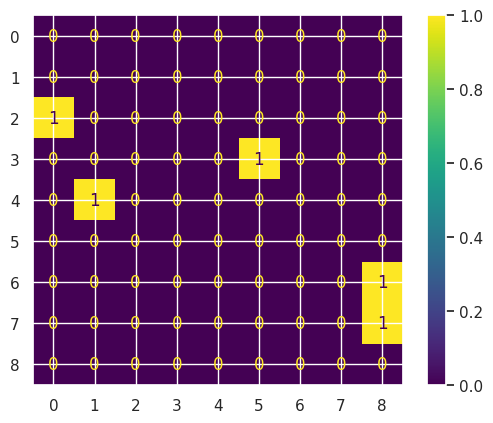

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Sample features and target
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))  # Verify encoding

# Manually split dataset into train and test sets
np.random.seed(42)  # Ensure reproducibility
test_indices = np.random.choice(df.index, size=5, replace=False)  # Random test indices
X_test = X.loc[test_indices]
y_test = y_encoded[test_indices]
X_train = X.drop(test_indices)
y_train = np.delete(y_encoded, test_indices)  # Remove test indices from y_encoded

# Verify unique labels
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))
print("Range of valid labels:", 0, len(np.unique(y_encoded)) - 1)

# ---------------------------
# Custom Neural Network Classifier
# ---------------------------
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layers=2, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model_.predict(X), axis=1)

# Hyperparameter tuning for neural network
param_distributions = {
    'hidden_layers': [2, 3, 4, 5],
    'hidden_units': [32, 64, 128, 256],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.4, 0.5],
    'batch_size': [8, 16, 32, 64, 128],
    'epochs': [50, 100, 200]
}

nn_classifier = CustomKerasClassifier()
random_search_nn = RandomizedSearchCV(
    estimator=nn_classifier,
    param_distributions=param_distributions,
    n_iter=20,
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_nn.fit(X_train, y_train)
best_nn = random_search_nn.best_estimator_
print("Best Parameters for Neural Network:", random_search_nn.best_params_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Results Table (Train):
    Actual  Predicted
0       10         10
1        7          5
2        1          1
3       24         29
4       18         18
5       20         20
6       21         21
7       13         13
8        5          5
9       17         17
10      25         25
11       4          1
12       6          6
13      23         15
14       2          3
15      29         29
16      22         29
17       3          4
18      14         21
19      19         18
20       3          3
21      28         29
22       0          0
23      12         12
24       9          1
25      15         15

Results Table (Test):
   Actual  Predicted
0       8          3
1      27         29
2      11         17
3      16          5
4      26         29


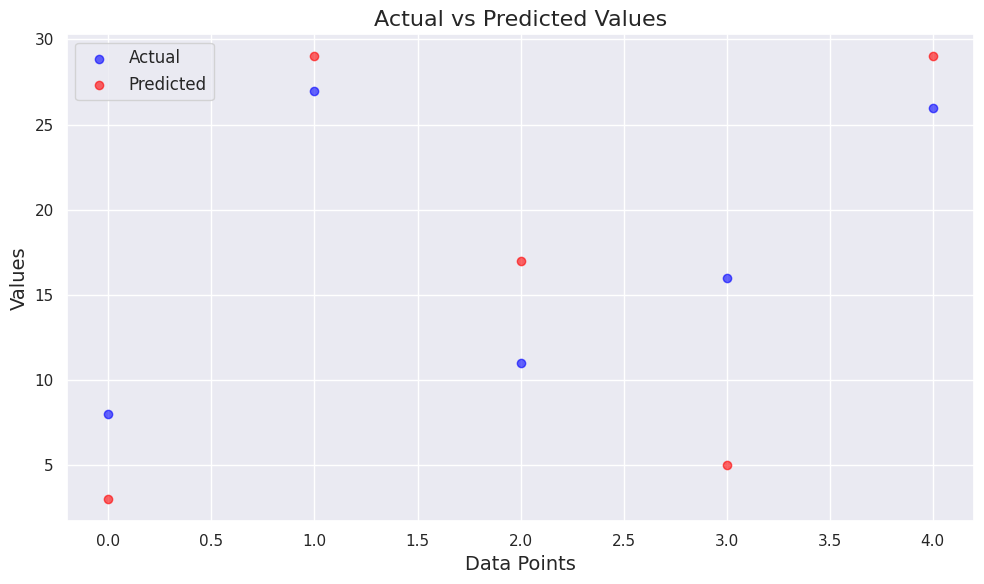

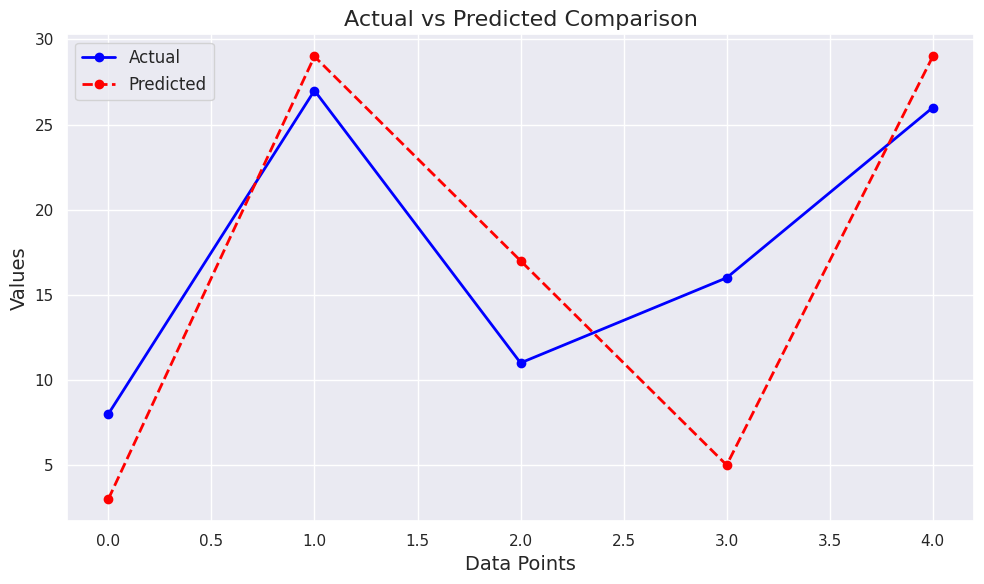

In [ ]:
# ---------------------------
# Evaluate and Visualize Results
# ---------------------------
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
    plt.scatter(range(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.6)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Actual vs Predicted Values', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_comparison(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, marker='o', label='Actual', color='blue', linewidth=2)
    plt.plot(range(len(y_test)), y_pred, marker='o', label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Actual vs Predicted Comparison', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Generate Results Table
# ---------------------------
def generate_results_table(y_actual, y_pred, dataset_type):
    results_table = pd.DataFrame({
        'Actual': y_actual,
        'Predicted': y_pred
    })
    print(f"\nResults Table ({dataset_type}):")
    print(results_table)
    # Optional: Save as CSV
    results_table.to_csv(f'{dataset_type}_results_table.csv', index=False)
    return results_table

# Predict for train and test sets
y_train_pred_nn = best_nn.predict(X_train)
y_test_pred_nn = best_nn.predict(X_test)

# Generate tables for train and test sets
train_results_table = generate_results_table(y_train, y_train_pred_nn, 'Train')
test_results_table = generate_results_table(y_test, y_test_pred_nn, 'Test')

# Plot predictions for test set
plot_predictions(y_test, y_test_pred_nn)
plot_comparison(y_test, y_test_pred_nn)

In [ ]:
random.seed(42)

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Convert object-type columns to numerical using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode the target variable (Inundation Map Number)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(df['Inundation Map Number'])

# Check for rare classes
unique, counts = np.unique(y_encoded, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")

# Use random splitting to avoid errors
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=26, random_state=42, shuffle=True
)

# ---------------------------
# Apply Best Parameters and Fit Models
# ---------------------------

# 1. Decision Tree Classifier
best_dt = DecisionTreeClassifier(
    splitter='best',
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=27,
    criterion='gini',
    random_state=42
)
best_dt.fit(X_train, y_train)
dt_predictions_test = best_dt.predict(X_test)

# 2. Random Forest Classifier
best_rf = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=7,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=16,
    bootstrap=False,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_predictions_test = best_rf.predict(X_test)

# 3. MLP Classifier
best_mlp = MLPClassifier(
    solver='lbfgs',
    learning_rate='adaptive',
    hidden_layer_sizes=(163,),
    alpha=3.727593720314938e-05,
    activation='tanh',
    max_iter=5000,
    random_state=42
)
best_mlp.fit(X_train, y_train)
mlp_predictions_test = best_mlp.predict(X_test)

# 4. KNN Classifier
best_knn = KNeighborsClassifier(
    weights='distance',
    p=2,
    n_neighbors=4,
    leaf_size=15,
    algorithm='kd_tree'
)
best_knn.fit(X_train, y_train)
knn_predictions_test = best_knn.predict(X_test)

# Combine Predictions into DataFrame
results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Decision Tree': dt_predictions_test,
    'Random Forest': rf_predictions_test,
    'MLP': mlp_predictions_test,
    'KNN': knn_predictions_test
})
print("Combined Results Table (Test Data):")
print(results_table)

# ---------------------------
# Generate predictions for the train data
# ---------------------------
dt_predictions_train = best_dt.predict(X_train)
rf_predictions_train = best_rf.predict(X_train)
mlp_predictions_train = best_mlp.predict(X_train)
knn_predictions_train = best_knn.predict(X_train)

# Combine all predictions into a single DataFrame for the train data
results_table_train = pd.DataFrame({
    'Actual': y_train.values,  # Ensure compatibility with numpy arrays
    'Decision Tree': dt_predictions_train,
    'Random Forest': rf_predictions_train,
    'MLP': mlp_predictions_train,
    'KNN': knn_predictions_train  # Added KNN predictions
})

# Reset index to align data properly
results_table_train.reset_index(drop=True, inplace=True)

# Print the combined table for train data
print("Combined Results Table (Train Data):")
print(results_table_train)

# Optional: Save the table to a CSV file
results_table_train.to_csv('combined_results_train_table.csv', index=False)

# Display the table in a nicely formatted way (optional for Jupyter Notebook)
from IPython.display import display
display(results_table_train)

# ---------------------------
# Plot 1: Grouped Bar Plot
# ---------------------------
def plot_grouped_bar(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
    models = ['Actual', 'Decision Tree', 'Random Forest', 'MLP', 'KNN']
    predictions = [y_test, dt_preds, rf_preds, mlp_preds, knn_preds]

    indices = np.arange(len(y_test))
    width = 0.15  # Adjusted width for multiple bars

    plt.figure(figsize=(14, 8))
    for i, (model, pred) in enumerate(zip(models, predictions)):
        plt.bar(indices + i * width, pred, width, label=model, edgecolor='black', linewidth=0.8)

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Grouped Bar)', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 2), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(y_test.values, dt_predictions_test, rf_predictions_test, mlp_predictions_test, knn_predictions_test)

# ---------------------------
# Plot 2: Differences Between Observed and Predictions
# ---------------------------
def plot_difference_bar(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
    models = ['Decision Tree', 'Random Forest', 'MLP', 'KNN']
    differences = [
        np.array(dt_preds) - np.array(y_test),
        np.array(rf_preds) - np.array(y_test),
        np.array(mlp_preds) - np.array(y_test),
        np.array(knn_preds) - np.array(y_test),
    ]

    indices = np.arange(len(y_test))
    width = 0.2  # Adjusted width for difference plot

    plt.figure(figsize=(14, 8))
    for i, (model, diff) in enumerate(zip(models, differences)):
        plt.bar(indices + i * width, diff, width, label=model, edgecolor='black', linewidth=0.8)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Difference (Predicted - Actual)', fontsize=16, fontweight='bold')
    plt.title('Differences Between Observed and Predicted', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 1.5), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_difference_bar(y_test.values, dt_predictions_test, rf_predictions_test, mlp_predictions_test, knn_predictions_test)

# ---------------------------
# Plot 3: Line Plot for Predictions
# ---------------------------
def plot_line_predictions(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
    plt.figure(figsize=(14, 8))
    plt.plot(y_test, label='Actual', marker='o', linewidth=2)
    plt.plot(dt_preds, label='Decision Tree', marker='o', linestyle='--')
    plt.plot(rf_preds, label='Random Forest', marker='o', linestyle='--')
    plt.plot(mlp_preds, label='MLP', marker='o', linestyle='--')
    plt.plot(knn_preds, label='KNN', marker='o', linestyle='--')

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Line Plot)', fontsize=18, fontweight='bold')
    plt.xticks(range(len(y_test)), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_line_predictions(y_test.values, dt_predictions_test, rf_predictions_test, mlp_predictions_test, knn_predictions_test)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters for Neural Network: {'learning_rate': 0.01, 'hidden_units': 64, 'hidden_layers': 4, 'epochs': 200, 'dropout_rate': 0.2, 'batch_size': 128, 'activation': 'tanh'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

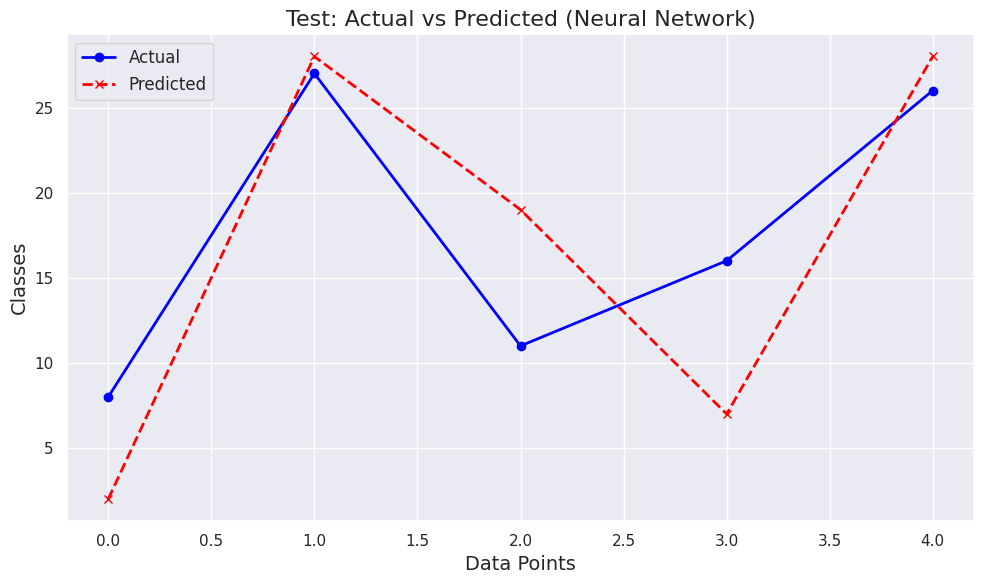


Results Table (Train):
    Actual  Predicted
0       10         10
1        7          5
2        1          1
3       24         22
4       18         21
5       20         20
6       21         19
7       13         13
8        5          5
9       17         21
10      25         25
11       4          1
12       6          6
13      23         23
14       2          3
15      29         22
16      22         22
17       3          3
18      14         14
19      19         19
20       3          3
21      28         28
22       0          0
23      12         12
24       9          4
25      15         15

Results Table (Test):
   Actual  Predicted
0       8          2
1      27         28
2      11         19
3      16          7
4      26         28


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Data Preparation
# ---------------------------
# Use the target variable directly as integers
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Map large integers to contiguous range
unique_classes = sorted(y.unique())
class_mapping = {value: idx for idx, value in enumerate(unique_classes)}
y_mapped = y.map(class_mapping)

# Split data into train and test
np.random.seed(42)
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 test samples
X_test = X.loc[test_indices]
y_test = y_mapped.loc[test_indices]
X_train = X.drop(test_indices)
y_train = y_mapped.drop(test_indices)

# ---------------------------
# Custom Keras Classifier
# ---------------------------
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layers=2, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(len(unique_classes), activation='softmax'))  # Output layer
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model_.predict(X), axis=1)

# Hyperparameter tuning
param_distributions = {
    'hidden_layers': [2, 3, 4, 5],
    'hidden_units': [32, 64, 128, 256],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.4, 0.5],
    'batch_size': [8, 16, 32, 64, 128],
    'epochs': [50, 100, 200]
}

nn_classifier = CustomKerasClassifier()
random_search_nn = RandomizedSearchCV(
    estimator=nn_classifier,
    param_distributions=param_distributions,
    n_iter=20,
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_nn.fit(X_train, y_train)
best_nn = random_search_nn.best_estimator_
print("Best Parameters for Neural Network:", random_search_nn.best_params_)

# ---------------------------
# Predictions and Evaluation
# ---------------------------
def plot_comparison(y_actual, y_pred, dataset_type, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_actual)), y_actual, marker='o', label='Actual', color='blue', linewidth=2)
    plt.plot(range(len(y_actual)), y_pred, marker='x', label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Classes', fontsize=14)
    plt.title(f"{dataset_type}: Actual vs Predicted ({model_name})", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Predict for train and test
y_train_pred_nn = best_nn.predict(X_train)
y_test_pred_nn = best_nn.predict(X_test)

# Classification report
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_nn))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_nn))

# Plot results for test set
plot_comparison(y_test.values, y_test_pred_nn, 'Test', 'Neural Network')

# ---------------------------
# Results Table
# ---------------------------
def generate_results_table(y_actual, y_pred, dataset_type):
    results_table = pd.DataFrame({
        'Actual': y_actual,
        'Predicted': y_pred
    })
    print(f"\nResults Table ({dataset_type}):")
    print(results_table)
    return results_table

train_results_table = generate_results_table(y_train.values, y_train_pred_nn, 'Train')
test_results_table = generate_results_table(y_test.values, y_test_pred_nn, 'Test')

#Regression

##Grid Search

In [ ]:
# Convert object-type columns to numerical using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode the target variable (Inundation Map Number)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(df['Inundation Map Number'])

# Check for rare classes
unique, counts = np.unique(y_encoded, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")

Class Distribution: {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1}


In [ ]:
# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Select relevant features for X and encode the target variable y
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# # Encode the target variable (Inundation Map Number)
# le_y = LabelEncoder()
# y = le_y.fit_transform(y)

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# Use KFold cross-validation
kf = KFold(n_splits=3, random_state=42, shuffle=True)

# Function to create results DataFrame for each model
def create_results_df(model_name, y_test, predictions):
    return pd.DataFrame({
        'Actual': y_test,
        f'{model_name} Prediction (Test Data)': predictions
    })

# ---------------------------
# Block 1: Decision Tree Regressor (DTR)
# ---------------------------
dt_param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 3, 5, 7, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_features': ['sqrt', 'log2', None],
}

dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=kf, verbose=2, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print("Best Parameters for Decision Tree Regressor:", grid_search_dt.best_params_)
joblib.dump(best_dt, 'best_decision_tree_regressor.pkl')

# ---------------------------
# Block 2: Random Forest Regressor (RFR)
# ---------------------------
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=kf, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest Regressor:", grid_search_rf.best_params_)
joblib.dump(best_rf, 'best_random_forest_regressor.pkl')

# ---------------------------
# Block 3: MLP Regressor (MLPR)
# ---------------------------
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}

mlp = MLPRegressor(random_state=42, max_iter=5000)
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=kf, verbose=2, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
best_mlp = grid_search_mlp.best_estimator_
print("Best Parameters for MLP Regressor:", grid_search_mlp.best_params_)
joblib.dump(best_mlp, 'best_mlp_regressor.pkl')

# ---------------------------
# Block 4: KNN Regressor
# ---------------------------
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],
}

knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=kf, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best Parameters for KNN Regressor:", grid_search_knn.best_params_)
joblib.dump(best_knn, 'best_knn_regressor.pkl')

# ---------------------------
# Block 5: K-Means Clustering
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k = 0
best_silhouette = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    if silhouette_avg > best_silhouette:
        best_k = k
        best_silhouette = silhouette_avg

print(f"Optimal K for K-Means: {best_k} with Silhouette Score: {best_silhouette}")

# ---------------------------
# Predictions and Results
# ---------------------------
models = {
    'DTR': 'best_decision_tree_regressor.pkl',
    'RFR': 'best_random_forest_regressor.pkl',
    'MLPR': 'best_mlp_regressor.pkl',
    'KNN': 'best_knn_regressor.pkl'
}

for model_name, model_file in models.items():
    model = joblib.load(model_file)
    predictions = np.round(model.predict(X_test), decimals=2)
    results_df = create_results_df(model_name, y_test, predictions)
    print(f"Results for {model_name}:\n", results_df.head())

Fitting 3 folds for each of 6912 candidates, totalling 20736 fits
Best Parameters for Decision Tree Regressor: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Fitting 3 folds for each of 1920 candidates, totalling 5760 fits
Best Parameters for Random Forest Regressor: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1118: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for MLP Regressor: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best Parameters for KNN Regressor: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Optimal K for K-Means: 2 with Silhouette Score: 0.5600867638807591
Results for DTR:
     Actual  DTR Prediction (Test Data)
16    1232                      1111.0
23    3134                      3353.0
2     1153                      2462.0
20    1332                      1332.0
4     5465                      5265.0
Results for RFR:
     Actual  RFR Prediction (Test Data)
16    1232                     1444.50
23    3134                     3500.71
2     1153                     1528.60
20    1332                     1442.43
4     5465                     5591.40
Results for MLPR:
     Actual  MLPR Prediction (Test Data)
16    1232                      218

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Select relevant features for X and encode the target variable y
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Encode the target variable on the entire dataset
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Manually split the dataset with 5 random test samples
np.random.seed(42)  # Ensure reproducibility
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices for test
X_test = X.loc[test_indices]
y_test = y_encoded[test_indices]
X_train = X.drop(test_indices)
y_train = np.delete(y_encoded, test_indices)  # Remove test indices from y_encoded

# ---------------------------
# Custom Neural Network Classifier
# ---------------------------
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layers=2, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer for classification
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model_.predict(X), axis=1)

# Hyperparameter Tuning for Custom Keras Classifier
param_distributions = {
    'hidden_layers': [2, 3, 4, 5],
    'hidden_units': [32, 64, 128, 256],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.4, 0.5],
    'batch_size': [8, 16, 32, 64, 128],
    'epochs': [50, 100, 200]
}

classifier = CustomKerasClassifier()
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_distributions, n_iter=20, cv=2, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
final_model = CustomKerasClassifier(**best_params)
final_model.fit(X_train, y_train)

# ---------------------------
# Evaluate and Visualize Results
# ---------------------------
def plot_classification_results(y_test, y_pred, model_name):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, labels=np.unique(y_test)))  # Restrict to classes in y_test

    # Get only the unique classes in y_test for the confusion matrix
    unique_classes = le.inverse_transform(np.unique(y_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=unique_classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

def plot_predictions_comparison(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', color='blue', linewidth=2)
    plt.plot(range(len(y_test)), y_pred, label="Predicted", marker='x', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Classes', fontsize=14)
    plt.title(f"Actual vs Predicted Comparison ({model_name})", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Predict for Custom Neural Network Classifier
y_test_pred = final_model.predict(X_test)

# Evaluation and Visualization
plot_classification_results(y_test, y_test_pred, "Neural Network")
plot_predictions_comparison(y_test, y_test_pred, "Neural Network")


NameError: name 'df' is not defined

Decision Tree Regressor Results:
    Actual  DTR Prediction (Test Data)
27    2433                        2453
15    8248                        9248
23    3134                        3353
17    4474                        4351
8     8148                        9248


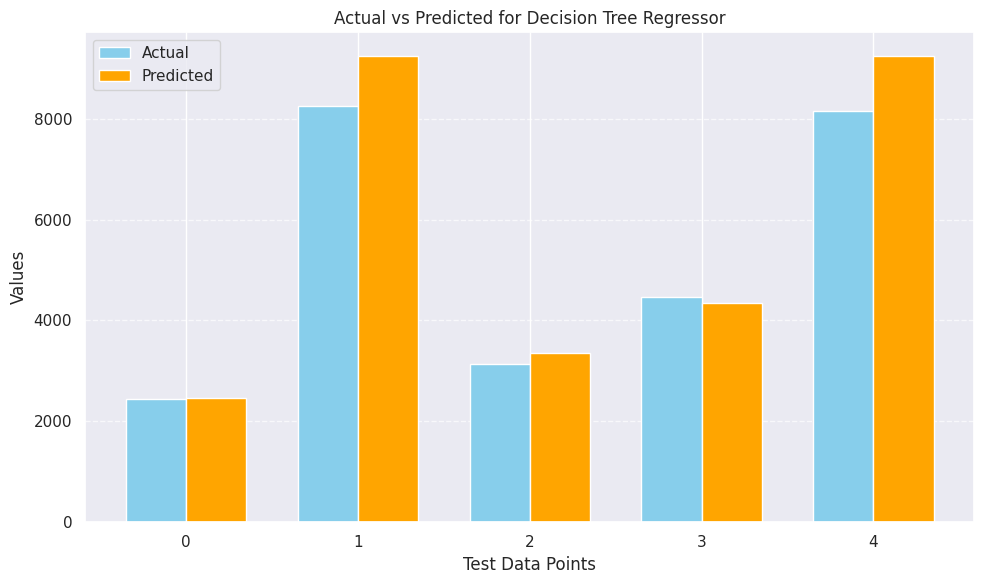

Random Forest Regressor Results:
    Actual  RFR Prediction (Test Data)
27    2433                        2325
15    8248                        8519
23    3134                        3428
17    4474                        4155
8     8148                        8519


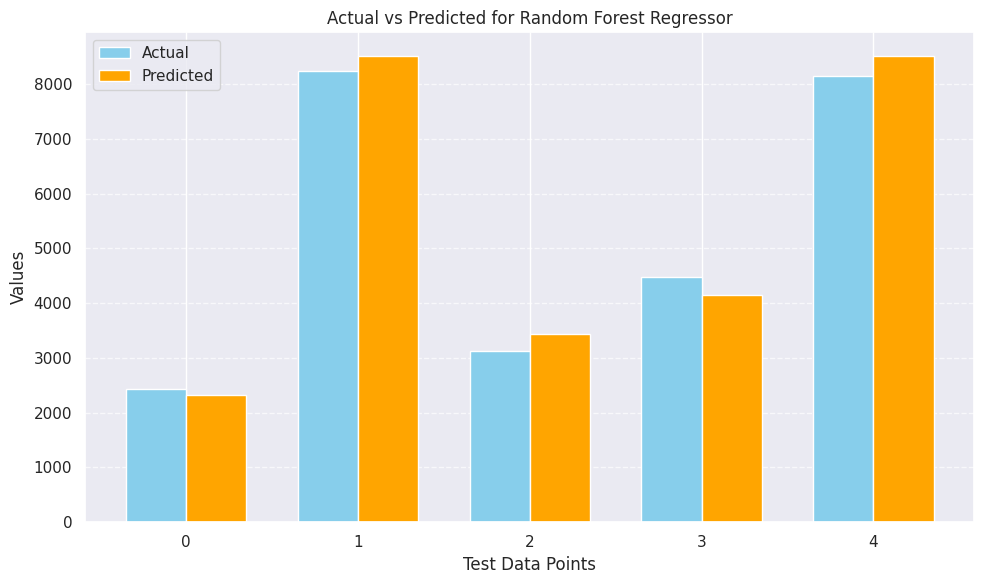

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor Results:
    Actual  MLPR Prediction (Test Data)
27    2433                         2574
15    8248                         8542
23    3134                         3418
17    4474                         3804
8     8148                         8733


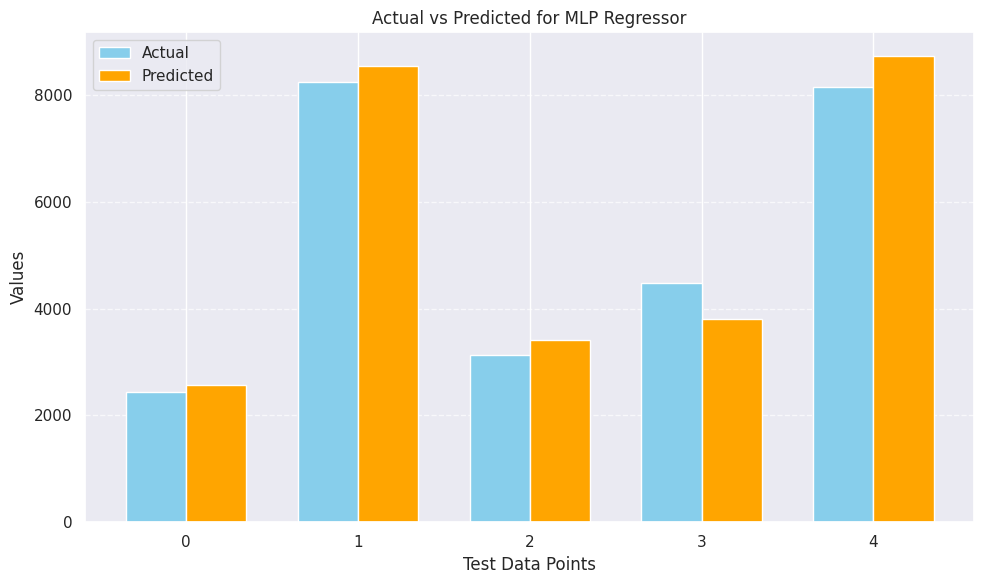

KNN Regressor Results:
    Actual  KNN Prediction (Test Data)
27    2433                        2385
15    8248                        8550
23    3134                        3635
17    4474                        4208
8     8148                        8820


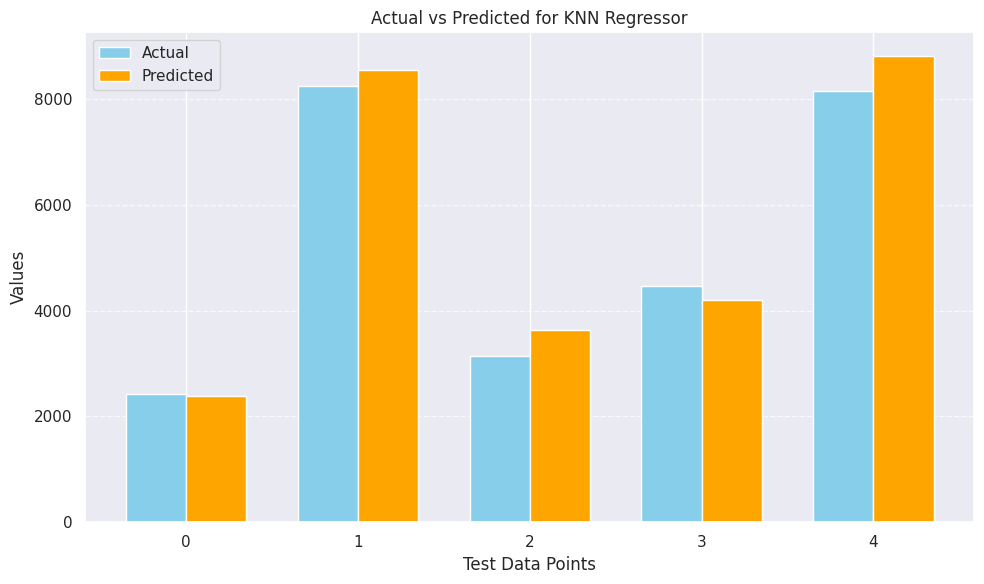

In [ ]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=42, shuffle=True)

# Function to create results DataFrame for each model
def create_results_df(model_name, y_test, predictions):
    return pd.DataFrame({
        'Actual': y_test,
        f'{model_name} Prediction (Test Data)': predictions
    })

# Function to generate vertical bar plots
def plot_actual_vs_predicted(model_name, actual, predicted):
    indices = np.arange(len(actual))  # Test points
    width = 0.35  # Width of bars

    plt.figure(figsize=(10, 6))
    plt.bar(indices - width / 2, actual, width, label='Actual', color='skyblue')
    plt.bar(indices + width / 2, predicted, width, label='Predicted', color='orange')

    plt.xlabel('Test Data Points')
    plt.ylabel('Values')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.xticks(indices)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Block 1: Apply Best Parameters and Predict
# ---------------------------

# 1. Decision Tree Regressor (DTR)
best_dt = DecisionTreeRegressor(
    criterion='absolute_error',
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='random',
    random_state=42
)
best_dt.fit(X_train, y_train)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)
output_results_dt = create_results_df('DTR', y_test, dt_predictions_test)
print("Decision Tree Regressor Results:")
print(output_results_dt.head())
plot_actual_vs_predicted('Decision Tree Regressor', y_test, dt_predictions_test)

# 2. Random Forest Regressor (RFR)
best_rf = RandomForestRegressor(
    bootstrap=True,
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)
output_results_rf = create_results_df('RFR', y_test, rf_predictions_test)
print("Random Forest Regressor Results:")
print(output_results_rf.head())
plot_actual_vs_predicted('Random Forest Regressor', y_test, rf_predictions_test)

# 3. MLP Regressor (MLPR)
best_mlp = MLPRegressor(
    activation='relu',
    alpha=0.1,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    solver='adam',
    max_iter=5000,
    random_state=42
)
best_mlp.fit(X_train, y_train)
mlp_predictions_test = np.round(best_mlp.predict(X_test)).astype(int)
output_results_mlp = create_results_df('MLPR', y_test, mlp_predictions_test)
print("MLP Regressor Results:")
print(output_results_mlp.head())
plot_actual_vs_predicted('MLP Regressor', y_test, mlp_predictions_test)

# 4. KNN Regressor (KNN)
best_knn = KNeighborsRegressor(
    n_neighbors=3,
    weights='distance',
    algorithm='auto',
    leaf_size=20,
    p=1
)
best_knn.fit(X_train, y_train)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)
output_results_knn = create_results_df('KNN', y_test, knn_predictions_test)
print("KNN Regressor Results:")
print(output_results_knn.head())
plot_actual_vs_predicted('KNN Regressor', y_test, knn_predictions_test)


In [ ]:
# Combine all predictions into a single DataFrame
results_table = pd.DataFrame({
    'Actual': y_test.values,  # Ensure alignment
    'Decision Tree': dt_predictions_test,
    'Random Forest': rf_predictions_test,
    'MLP': mlp_predictions_test,
    'KNN': knn_predictions_test  # Added KNN predictions
})

# Reset index to align data properly
results_table.reset_index(drop=True, inplace=True)

# Print the combined table
print("Combined Results Table:")
print(results_table)

# Optional: Save the table to a CSV file
results_table.to_csv('combined_results_table.csv', index=False)

# Display the table in a nicely formatted way (optional for Jupyter Notebook)
from IPython.display import display
display(results_table)

Combined Results Table:
   Actual  Decision Tree  Random Forest   MLP   KNN
0    2433           2453           2325  2574  2385
1    8248           9248           8519  8542  8550
2    3134           3353           3428  3418  3635
3    4474           4351           4155  3804  4208
4    8148           9248           8519  8733  8820


Actual  Decision Tree  Random Forest   MLP   KNN
0    2433           2453           2325  2574  2385
1    8248           9248           8519  8542  8550
2    3134           3353           3428  3418  3635
3    4474           4351           4155  3804  4208
4    8148           9248           8519  8733  8820

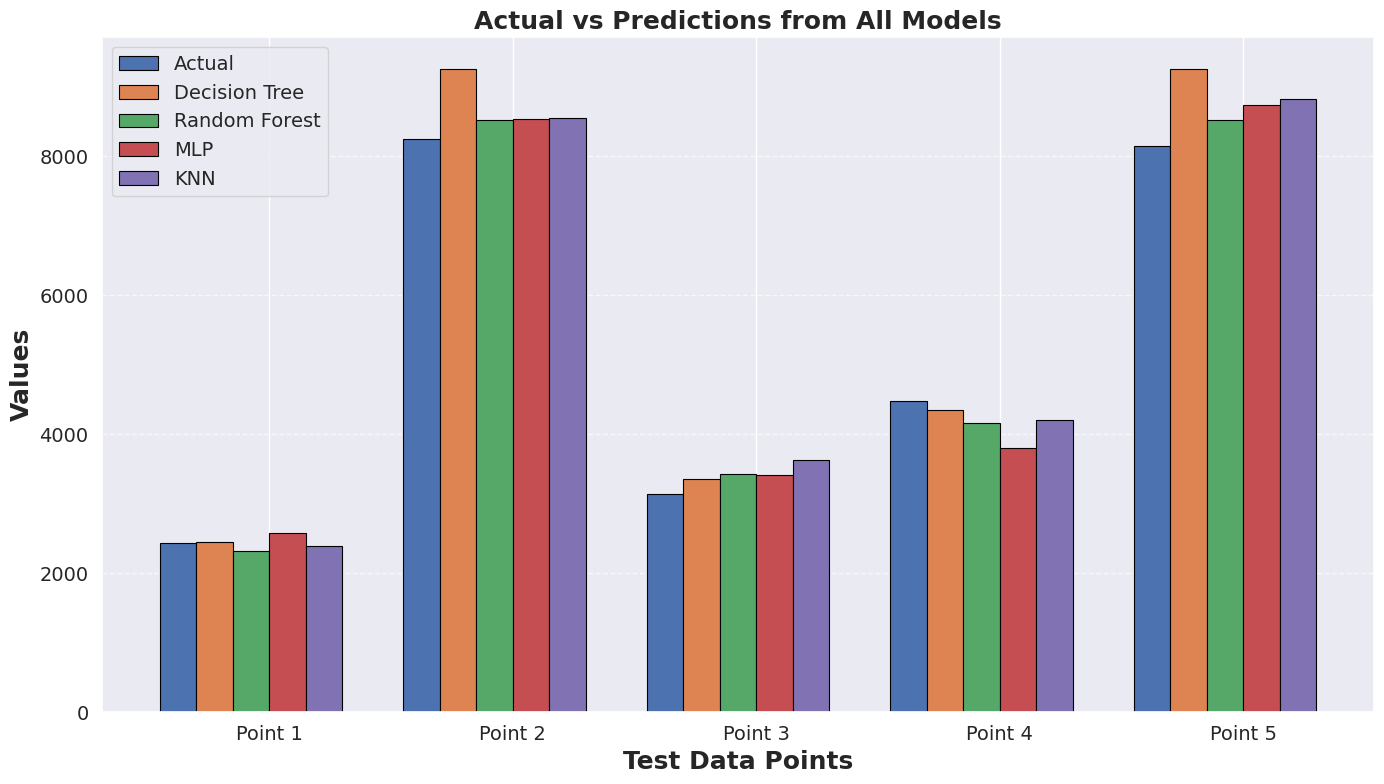

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot grouped bar plot for all models with improved aesthetics
def plot_grouped_bar_publication(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
    models = ['Actual', 'Decision Tree', 'Random Forest', 'MLP', 'KNN']
    predictions = [y_test, dt_preds, rf_preds, mlp_preds, knn_preds]

    indices = np.arange(len(y_test))  # Test data points
    width = 0.15  # Smaller width for multiple bars

    # Create the plot
    plt.figure(figsize=(14, 8))  # Increased figure size

    for i, (model, pred) in enumerate(zip(models, predictions)):
        plt.bar(indices + i * width, pred, width, label=model, edgecolor='black', linewidth=0.8)

    # Fonts and titles
    plt.xlabel('Test Data Points', fontsize=18, fontweight='bold')
    plt.ylabel('Values', fontsize=18, fontweight='bold')
    plt.title('Actual vs Predictions from All Models', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * len(models)) / 2, [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.yticks(fontsize=14)

    # Legend inside the top-left corner
    plt.legend(fontsize=14, loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Refine layout for publication
    plt.tight_layout()
    plt.show()

# Call the function with predictions
plot_grouped_bar_publication(
    y_test.values,  # Ensure compatibility with numpy arrays
    dt_predictions_test,
    rf_predictions_test,
    mlp_predictions_test,
    knn_predictions_test  # Updated to include KNN
)

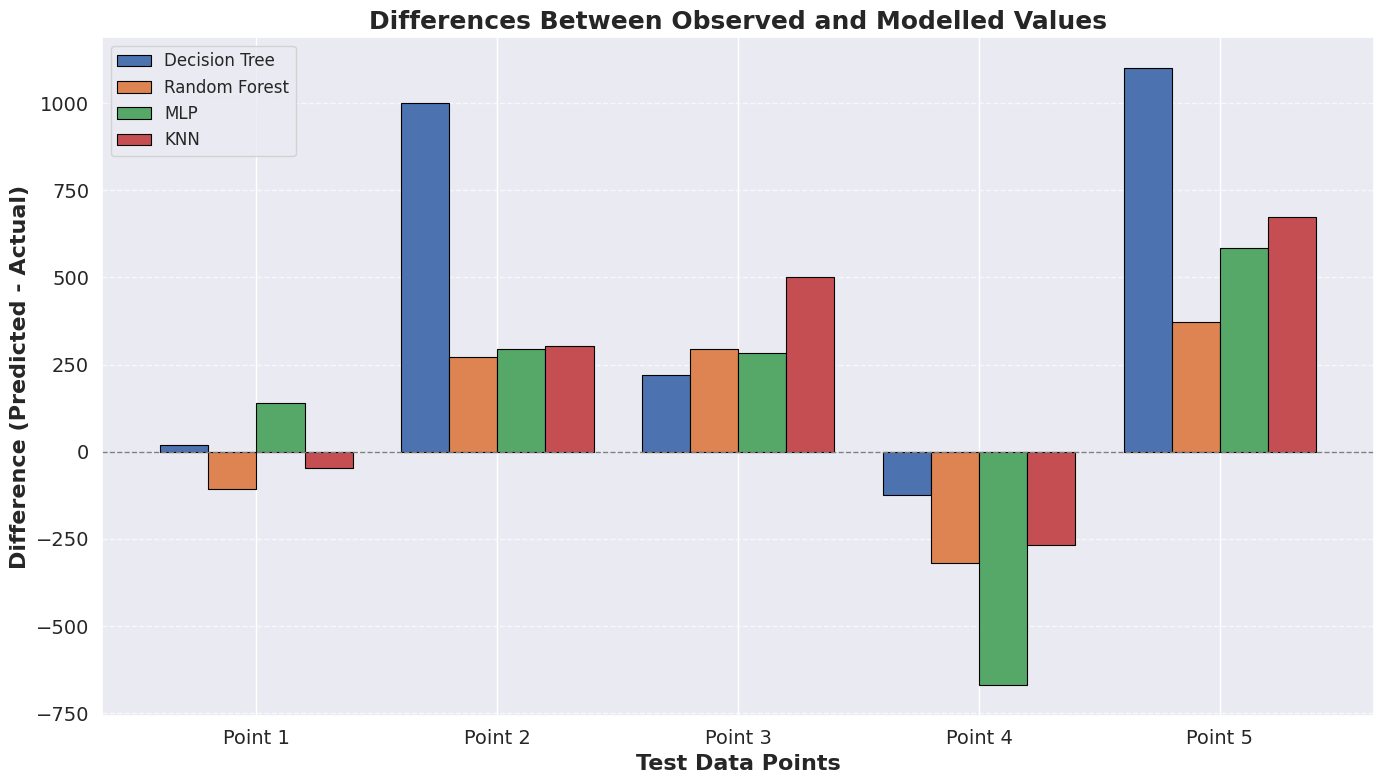

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot differences between Observed and Modelled predictions
def plot_difference_bar(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
    models = ['Decision Tree', 'Random Forest', 'MLP', 'KNN']
    differences = [
        np.array(dt_preds) - np.array(y_test),
        np.array(rf_preds) - np.array(y_test),
        np.array(mlp_preds) - np.array(y_test),
        np.array(knn_preds) - np.array(y_test),
    ]

    indices = np.arange(len(y_test))  # Test data points
    width = 0.2  # Width for each group of bars

    # Create the plot
    plt.figure(figsize=(14, 8))  # Adjust the figure size

    for i, (model, diff) in enumerate(zip(models, differences)):
        plt.bar(indices + i * width, diff, width, label=model, edgecolor='black', linewidth=0.8)

    # Add baseline at y=0
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)

    # Fonts and titles
    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Difference (Predicted - Actual)', fontsize=16, fontweight='bold')
    plt.title('Differences Between Observed and Modelled Values', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * (len(models)-1)) / 2, [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.yticks(fontsize=14)

    # Legend inside top-left
    plt.legend(fontsize=12, loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Refine layout
    plt.tight_layout()
    plt.show()

# Call the function with predictions
plot_difference_bar(
    y_test.values,  # Ensure compatibility with numpy arrays
    dt_predictions_test,
    rf_predictions_test,
    mlp_predictions_test,
    knn_predictions_test  # Updated to include KNN predictions
)


In [ ]:
# Generate predictions for the train data
dt_predictions_train = np.round(best_dt.predict(X_train)).astype(int)
rf_predictions_train = np.round(best_rf.predict(X_train)).astype(int)
mlp_predictions_train = np.round(best_mlp.predict(X_train)).astype(int)
knn_predictions_train = np.round(best_knn.predict(X_train)).astype(int)

# Combine all predictions into a single DataFrame for the train data
results_table_train = pd.DataFrame({
    'Actual': y_train.values,  # Ensure compatibility with numpy arrays
    'Decision Tree': dt_predictions_train,
    'Random Forest': rf_predictions_train,
    'MLP': mlp_predictions_train,
    'KNN': knn_predictions_train  # Replaced XGBoost with KNN
})

# Reset index to align data properly
results_table_train.reset_index(drop=True, inplace=True)

# Print the combined table for train data
print("Combined Results Table (Train Data):")
print(results_table_train)

# Optional: Save the table to a CSV file
results_table_train.to_csv('combined_results_train_table.csv', index=False)

# Display the table in a nicely formatted way (optional for Jupyter Notebook)
from IPython.display import display
display(results_table_train)

Combined Results Table (Train Data):
    Actual  Decision Tree  Random Forest    MLP   KNN
0     2253           2253           2287   2560  2253
1     2453           2453           2372   2556  2453
2     1332           1332           1334   2105  1332
3     1352           1352           1306   2092  1352
4     2462           2462           2260   2550  2462
5     5465           5465           5534   4701  5465
6     1232           1232           1273   2108  1232
7     6346           6346           6291   5544  6346
8     2313           2313           2316   2603  2313
9     7489           7489           7739   7517  7489
10    6156           6156           6169   5558  6156
11    2353           2353           2340   2565  2353
12    1153           1153           1238   2085  1153
13    9248           9248           8519   8969  9248
14    7487           7487           7490   7680  7487
15    4345           4345           4175   3817  4345
16    1111           1111           1172   21

Actual  Decision Tree  Random Forest    MLP   KNN
0     2253           2253           2287   2560  2253
1     2453           2453           2372   2556  2453
2     1332           1332           1334   2105  1332
3     1352           1352           1306   2092  1352
4     2462           2462           2260   2550  2462
5     5465           5465           5534   4701  5465
6     1232           1232           1273   2108  1232
7     6346           6346           6291   5544  6346
8     2313           2313           2316   2603  2313
9     7489           7489           7739   7517  7489
10    6156           6156           6169   5558  6156
11    2353           2353           2340   2565  2353
12    1153           1153           1238   2085  1153
13    9248           9248           8519   8969  9248
14    7487           7487           7490   7680  7487
15    4345           4345           4175   3817  4345
16    1111           1111           1172   2131  1111
17    9499           9499           9014  10201  9499
18    4351           4351           3821   3853  4351
19    1332           1332           1334   2104  1332
20    3353           3353           3237   2986  3353
21    5265           5265           5429   4701  5265
22    7363           7363           6682   7813  7363
23    3334           3334           3290   2985  3334
24    7257           7257           7297   7711  7257
25    6446           6446           6169   5135  6446

##Random search

###Tune

In [ ]:
# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Select relevant features for X and encode the target variable y
# X = df[['Storm  Year/ Name', 'Landfall Location', 'Location to Central/ Meghna Estuary', 'Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters for Decision Tree Regressor: {'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 34, 'criterion': 'poisson'}
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters for Random Forest Regressor: {'n_estimators': 50, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [ 0.95320684         nan -0.08701141  0.93068615         nan         nan
         nan         nan  0.25182414         nan         nan         nan
         nan         nan         nan  0.84202748         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan -0.80657249
  0.94262314  0.86436485         nan  0.89247453  0.84071602  0.60601609
         nan         nan         nan  0.94305099  0.95320684         nan
         nan         nan         nan         nan  0.82566324         nan
         nan  0.81191736         nan  0.95511138         nan         nan
         nan         nan  0.22833994  0.25182414  0.4845711  -0.25016133
         nan  0.84162877  0.84162877         nan         nan  0.60601609
  0.56548752  0.8855231          nan         nan -0.0870

Best Parameters for KNN Regressor: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1, 'leaf_size': 50, 'algorithm': 'brute'}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results for DTR:
    Actual  Predicted
0     2462     1252.5
25    9248     8198.0
13    2313     2443.0
7     3353     3234.0
24    1332     1225.0


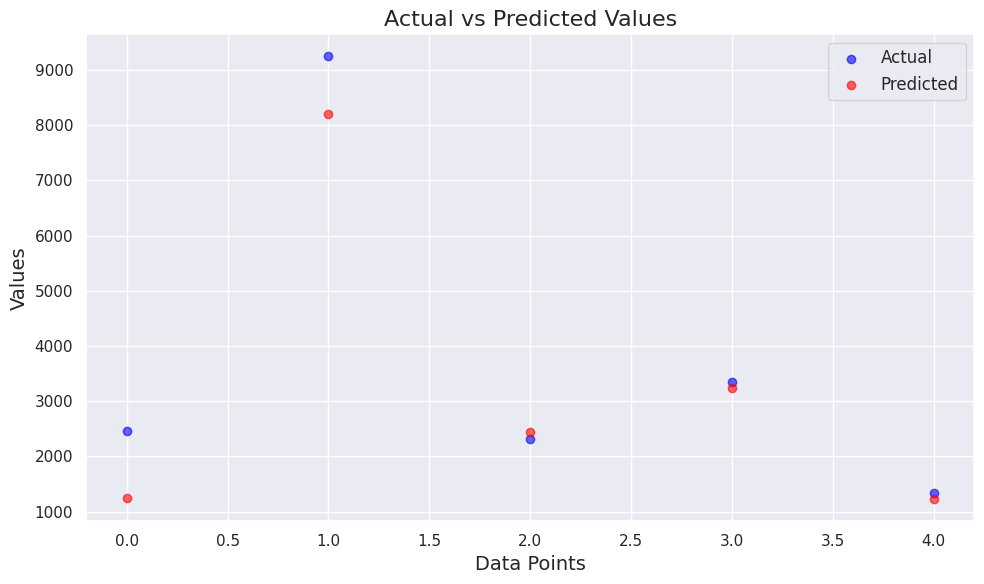

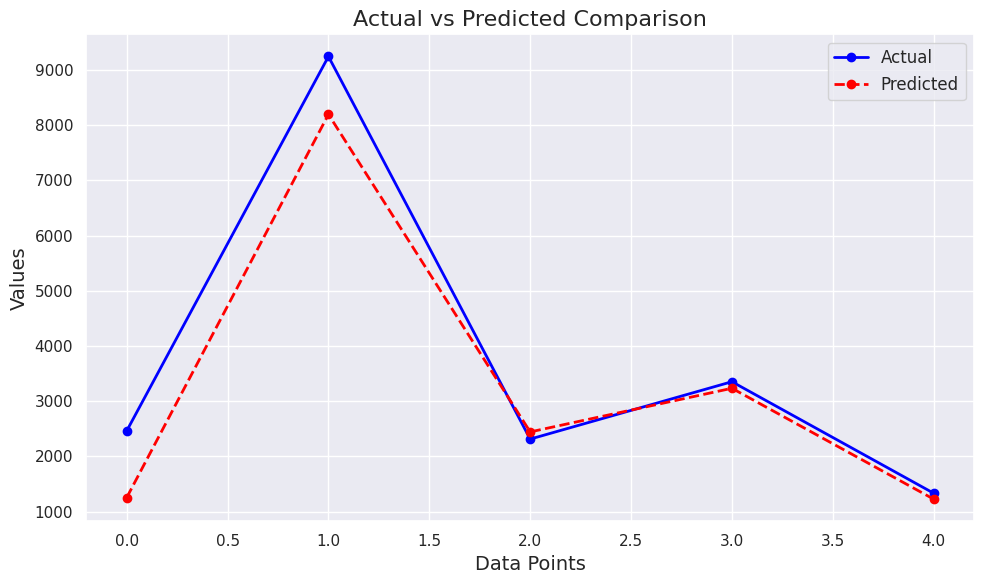

Results for RFR:
    Actual  Predicted
0     2462    2056.11
25    9248    7862.57
13    2313    2304.29
7     3353    3031.93
24    1332    1706.50


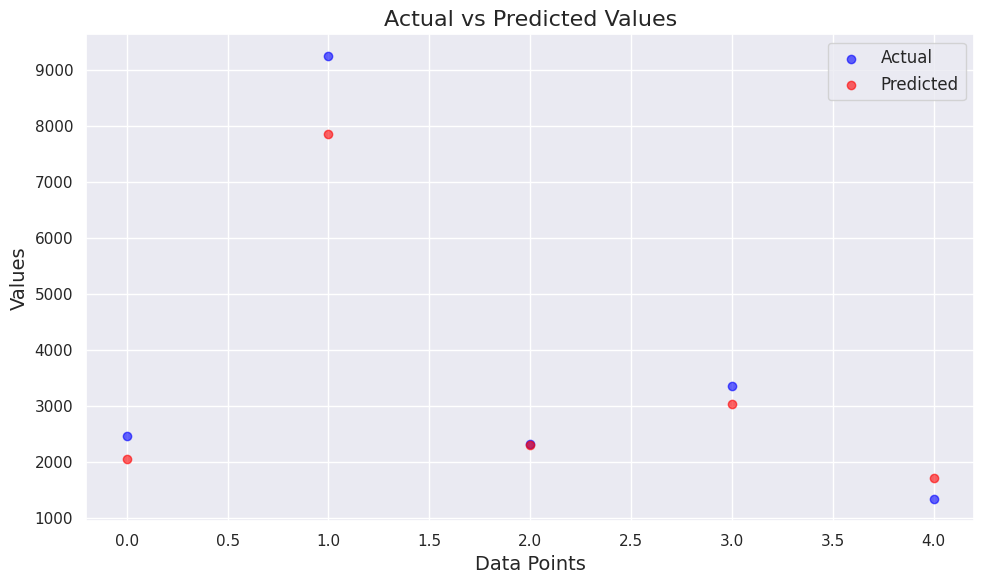

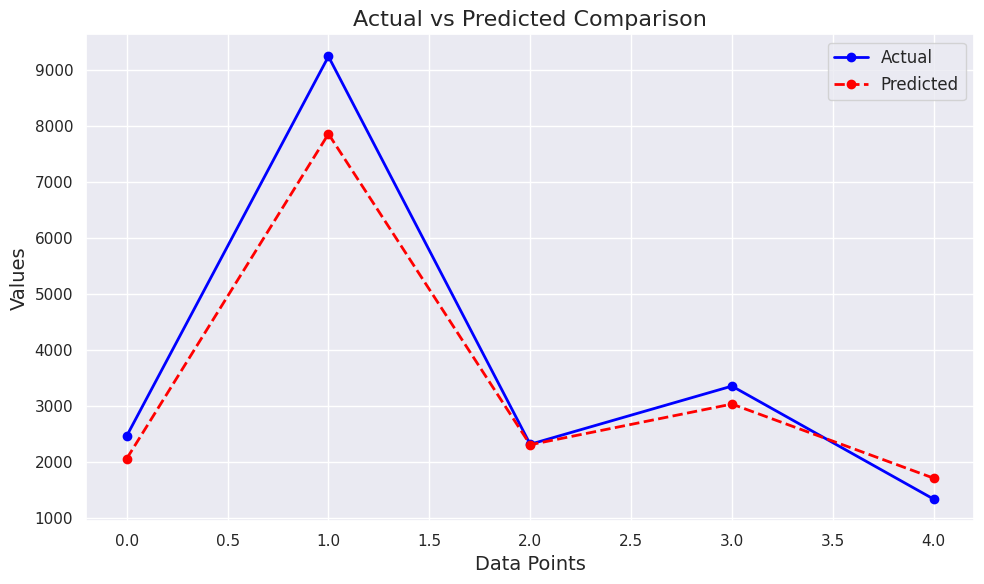

Results for KNN:
    Actual  Predicted
0     2462     2453.0
25    9248     8148.0
13    2313     2433.0
7     3353     3334.0
24    1332     1332.0


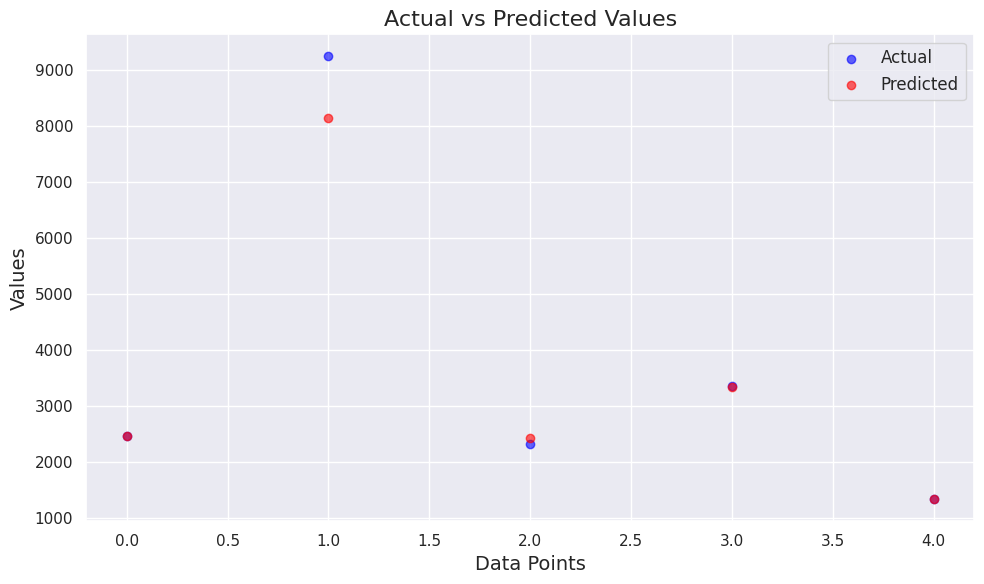

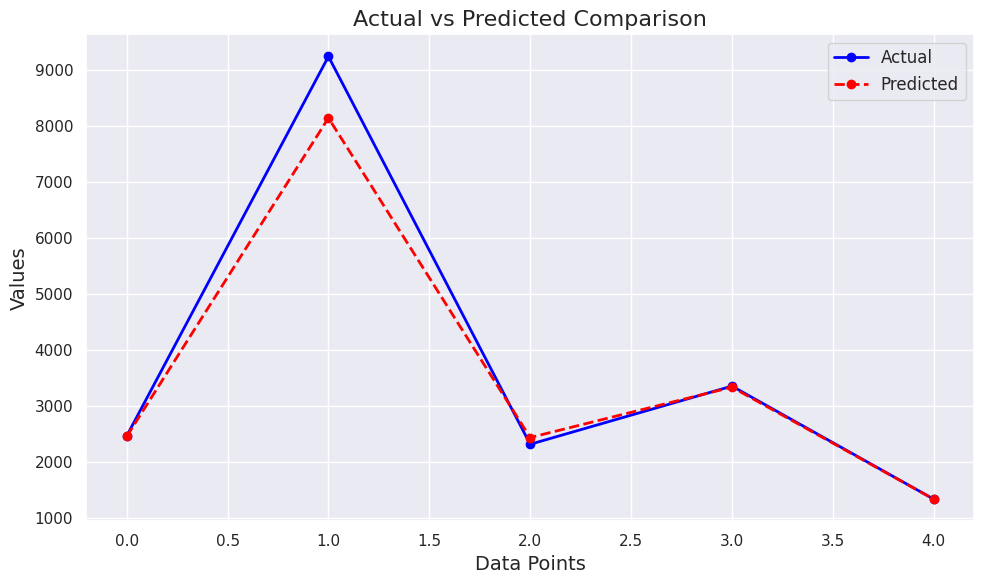

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Test Results for Custom Keras Regressor:
   Actual  Predicted
0    2462       2674
1    9248       8966
2    2313       2667
3    3353       3088
4    1332       2183


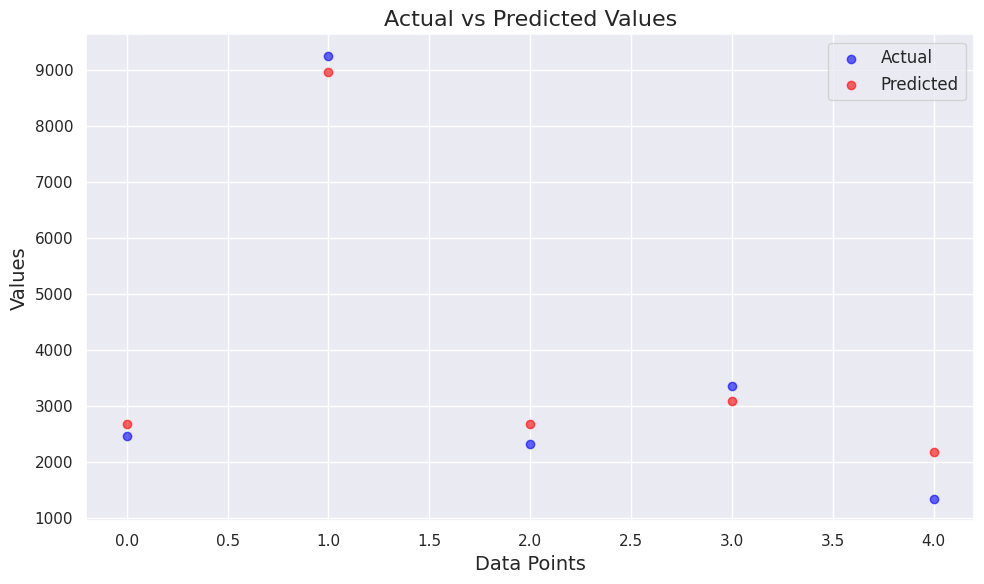

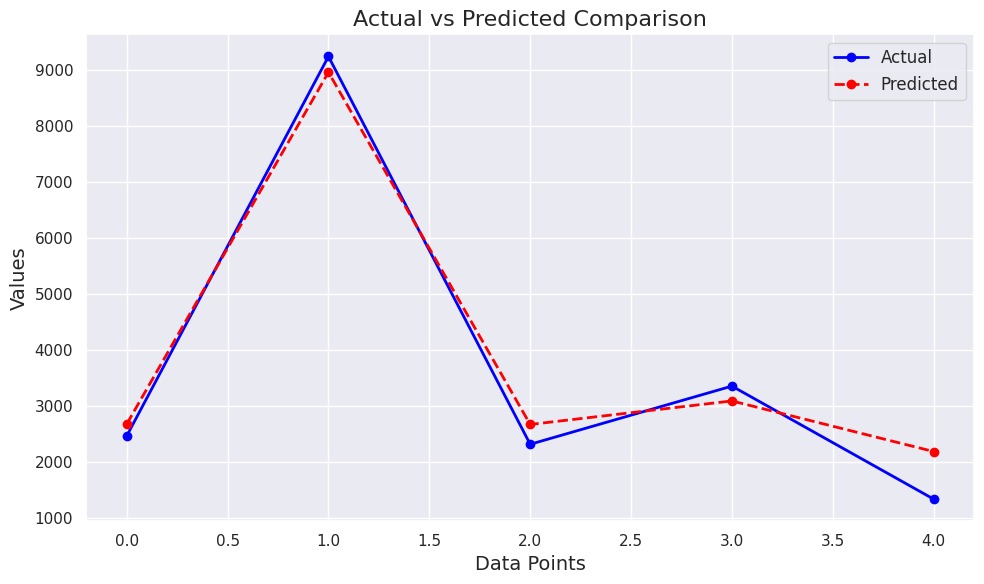

In [ ]:
# ---------------------------
# Decision Tree Regressor (DTR)
# ---------------------------
dt_param_dist = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, *range(3, 51)],
    'min_samples_split': range(2, 50),
    'min_samples_leaf': range(1, 20),
    'max_features': ['sqrt', 'log2', None],
}

dt = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_dt.fit(X_train, y_train)
best_dt = random_search_dt.best_estimator_
print("Best Parameters for Decision Tree Regressor:", random_search_dt.best_params_)
joblib.dump(best_dt, 'best_decision_tree_regressor.pkl')

# ---------------------------
# Random Forest Regressor (RFR)
# ---------------------------
rf_param_dist = {
    'n_estimators': range(50, 1001, 50),
    'max_depth': [None, *range(5, 51)],
    'min_samples_split': range(2, 30),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest Regressor:", random_search_rf.best_params_)
joblib.dump(best_rf, 'best_random_forest_regressor.pkl')

# ---------------------------
# KNN Regressor
# ---------------------------
knn_param_dist = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 101, 10),
    'p': [1, 2],
}

knn = KNeighborsRegressor()
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_
print("Best Parameters for KNN Regressor:", random_search_knn.best_params_)
joblib.dump(best_knn, 'best_knn_regressor.pkl')

# ---------------------------
# Custom Keras Regressor
# ---------------------------
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=2, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

# Hyperparameter Tuning for Custom Keras Regressor
param_distributions = {
    'hidden_layers': [2, 3, 4, 5],
    'hidden_units': [32, 64, 128, 256],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.4, 0.5],
    'batch_size': [8, 16, 32, 64, 128],
    'epochs': [50, 100, 200]
}

regressor = CustomKerasRegressor()
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
final_model = CustomKerasRegressor(**best_params)
final_model.fit(X_train, y_train)

# ---------------------------
# Evaluate and Visualize Results
# ---------------------------
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
    plt.scatter(range(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.6)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Actual vs Predicted Values', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_comparison(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, marker='o', label='Actual', color='blue', linewidth=2)
    plt.plot(range(len(y_test)), y_pred, marker='o', label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Actual vs Predicted Comparison', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Predict and Evaluate
models = {
    'DTR': 'best_decision_tree_regressor.pkl',
    'RFR': 'best_random_forest_regressor.pkl',
    'KNN': 'best_knn_regressor.pkl'
}

for model_name, model_file in models.items():
    model = joblib.load(model_file)
    predictions = np.round(model.predict(X_test), decimals=2)
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': predictions
    })
    print(f"Results for {model_name}:")
    print(results_df.head())
    plot_predictions(y_test, predictions)
    plot_comparison(y_test, predictions)

# Predict for Custom Keras Regressor
y_test_pred = np.round(final_model.predict(X_test)).astype(int)
results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred.flatten()
})
print("Test Results for Custom Keras Regressor:")
print(results_table)
results_table.to_csv('mlp_test_results.csv', index=False)
plot_predictions(y_test.values, y_test_pred.flatten())
plot_comparison(y_test.values, y_test_pred.flatten())

In [ ]:
best_params

{'learning_rate': 0.001,
 'hidden_units': 256,
 'hidden_layers': 5,
 'epochs': 200,
 'dropout_rate': 0.0,
 'batch_size': 8,
 'activation': 'relu'}

In [ ]:
# # ---------------------------
# # Block 1: Decision Tree Regressor (DTR)
# # ---------------------------
# dt_param_dist = {
#     'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, *range(3, 51)],  # Expanded range for max_depth
#     'min_samples_split': range(2, 50),   # Expanded range for min_samples_split
#     'min_samples_leaf': range(1, 20),   # Expanded range for min_samples_leaf
#     'max_features': ['sqrt', 'log2', None],
# }

# dt = DecisionTreeRegressor(random_state=42)
# random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42, cv=None)
# random_search_dt.fit(X_train, y_train)
# best_dt = random_search_dt.best_estimator_
# print("Best Parameters for Decision Tree Regressor:", random_search_dt.best_params_)
# joblib.dump(best_dt, 'best_decision_tree_regressor.pkl')

# # ---------------------------
# # Block 2: Random Forest Regressor (RFR)
# # ---------------------------
# rf_param_dist = {
#     'n_estimators': range(50, 1001, 50),  # Expanded range for n_estimators
#     'max_depth': [None, *range(5, 51)],  # Expanded range for max_depth
#     'min_samples_split': range(2, 30),   # Expanded range for min_samples_split
#     'min_samples_leaf': range(1, 20),    # Expanded range for min_samples_leaf
#     'bootstrap': [True, False],
#     'max_features': ['sqrt', 'log2', None],
# }

# rf = RandomForestRegressor(random_state=42)
# random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42, cv=None)
# random_search_rf.fit(X_train, y_train)
# best_rf = random_search_rf.best_estimator_
# print("Best Parameters for Random Forest Regressor:", random_search_rf.best_params_)
# joblib.dump(best_rf, 'best_random_forest_regressor.pkl')

# # ---------------------------
# # Block 3: KNN Regressor
# # ---------------------------
# knn_param_dist = {
#     'n_neighbors': range(1, 51),          # Expanded range for n_neighbors
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': range(10, 101, 10),     # Expanded range for leaf_size
#     'p': [1, 2],
# }

# knn = KNeighborsRegressor()
# random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42, cv=None)
# random_search_knn.fit(X_train, y_train)
# best_knn = random_search_knn.best_estimator_
# print("Best Parameters for KNN Regressor:", random_search_knn.best_params_)
# joblib.dump(best_knn, 'best_knn_regressor.pkl')

# # ---------------------------
# # Predictions and Results
# # ---------------------------
# models = {
#     'DTR': 'best_decision_tree_regressor.pkl',
#     'RFR': 'best_random_forest_regressor.pkl',
#     'KNN': 'best_knn_regressor.pkl'
# }

# for model_name, model_file in models.items():
#     model = joblib.load(model_file)
#     predictions = np.round(model.predict(X_test), decimals=2)
#     results_df = pd.DataFrame({
#         'Actual': y_test,
#         'Predicted': predictions
#     })
#     print(f"Results for {model_name}:")
#     print(results_df.head())

In [ ]:
# # ---------------------------
# # Step 2: Define Custom Wrapper for Keras Model
# # ---------------------------
# class CustomKerasRegressor(BaseEstimator, RegressorMixin):
#     def __init__(self, hidden_layers=2, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
#         self.hidden_layers = hidden_layers
#         self.hidden_units = hidden_units
#         self.activation = activation
#         self.learning_rate = learning_rate
#         self.dropout_rate = dropout_rate
#         self.epochs = epochs
#         self.batch_size = batch_size
#         self.model_ = None

#     def build_model(self):
#         model = Sequential()
#         model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
#         for _ in range(self.hidden_layers - 1):
#             model.add(Dense(self.hidden_units, activation=self.activation))
#             if self.dropout_rate > 0:
#                 model.add(Dropout(self.dropout_rate))
#         model.add(Dense(1, activation='linear'))  # Output layer for regression
#         optimizer = Adam(learning_rate=self.learning_rate)
#         model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
#         return model

#     def fit(self, X, y):
#         self.model_ = self.build_model()
#         self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
#         return self

#     def predict(self, X):
#         return self.model_.predict(X).flatten()

# # Instantiate the regressor
# regressor = CustomKerasRegressor()

# # ---------------------------
# # Step 3: Hyperparameter Tuning
# # ---------------------------
# param_distributions = {
#     'hidden_layers': [2, 3, 4, 5],
#     'hidden_units': [32, 64, 128, 256],
#     'activation': ['relu', 'tanh', 'sigmoid'],
#     'learning_rate': [0.0001, 0.001, 0.01, 0.1],
#     'dropout_rate': [0.0, 0.2, 0.4, 0.5],
#     'batch_size': [8, 16, 32, 64, 128],
#     'epochs': [50, 100, 200]
# }

# random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
# random_search.fit(X_train, y_train)

# # Best Parameters
# print("Best Parameters:", random_search.best_params_)

# # Train Final Model with Best Parameters
# best_params = random_search.best_params_
# final_model = CustomKerasRegressor(**best_params)
# final_model.fit(X_train, y_train)

# # ---------------------------
# # Step 4: Evaluate and Test the Model
# # ---------------------------
# # Predict on test data
# y_test_pred = np.round(final_model.predict(X_test)).astype(int)

# # Combine actual and predicted values into a DataFrame
# results_table = pd.DataFrame({
#     'Actual': y_test.values,
#     'Predicted': y_test_pred.flatten()
# })
# print("Test Results:")
# print(results_table)

# # Save results to CSV
# results_table.to_csv('mlp_test_results.csv', index=False)

# # ---------------------------
# # Step 5: Plot Training History
# # ---------------------------
# def plot_predictions(y_test, y_pred):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
#     plt.scatter(range(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.6)
#     plt.xlabel('Data Points', fontsize=14)
#     plt.ylabel('Inundation Map Number', fontsize=14)
#     plt.title('Actual vs Predicted Values', fontsize=16)
#     plt.legend(fontsize=12)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# plot_predictions(y_test.values, y_test_pred.flatten())

# # ---------------------------
# # Step 6: Plot Predictions Comparison
# # ---------------------------
# def plot_comparison(y_test, y_pred):
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(len(y_test)), y_test, marker='o', label='Actual', color='blue', linewidth=2)
#     plt.plot(range(len(y_test)), y_pred, marker='o', label='Predicted', color='red', linestyle='--', linewidth=2)
#     plt.xlabel('Data Points', fontsize=14)
#     plt.ylabel('Inundation Map Number', fontsize=14)
#     plt.title('Actual vs Predicted Comparison', fontsize=16)
#     plt.legend(fontsize=12)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# plot_comparison(y_test.values, y_test_pred.flatten())

###Deployment

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Combined Results Table (Test Data):
   Actual  Decision Tree   KNN  Random Forest  Neural Network
0    2433           2383  2453           2353            2479
1    8248           9374  9248           7754            8399
2    3134           3344  3334           3367            3348
3    4474           4348  4345           3891            3688
4    8148           9374  9248           7754            8597


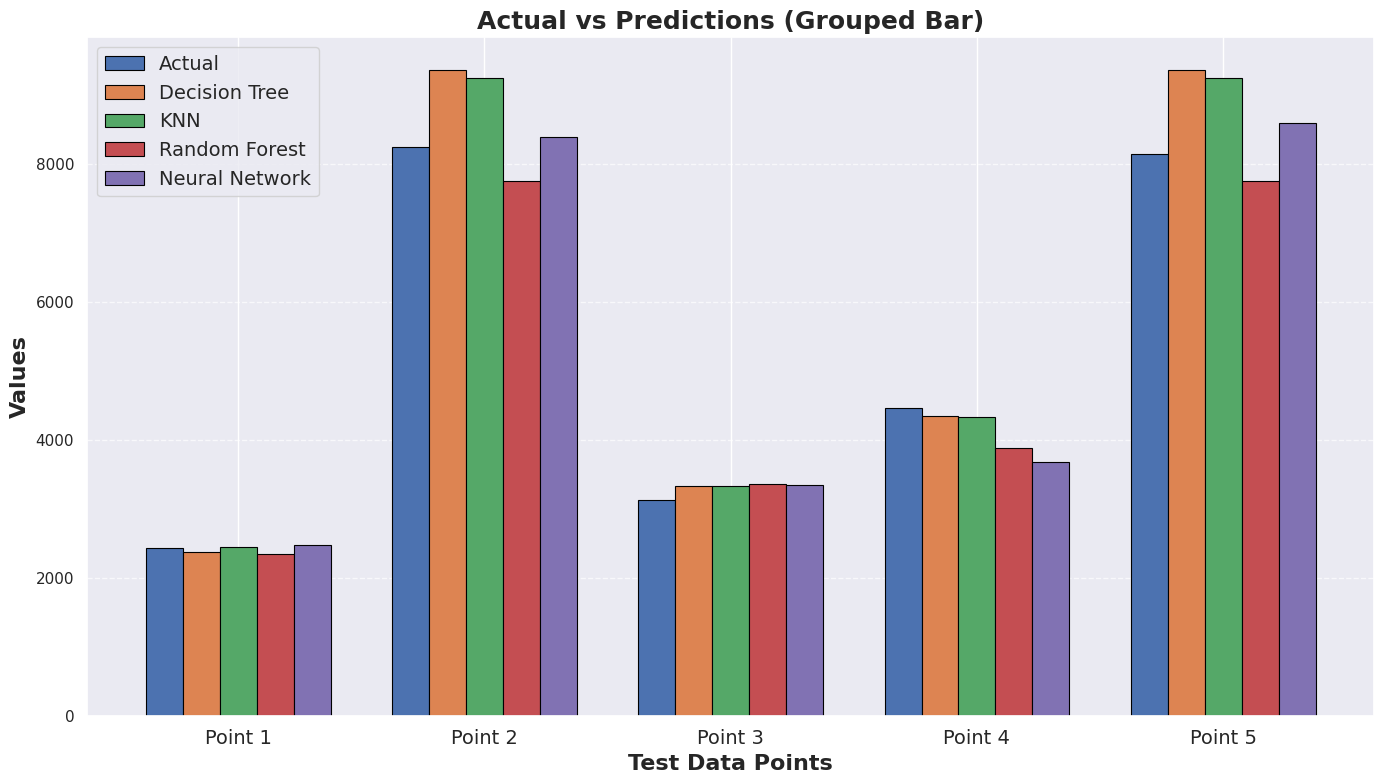

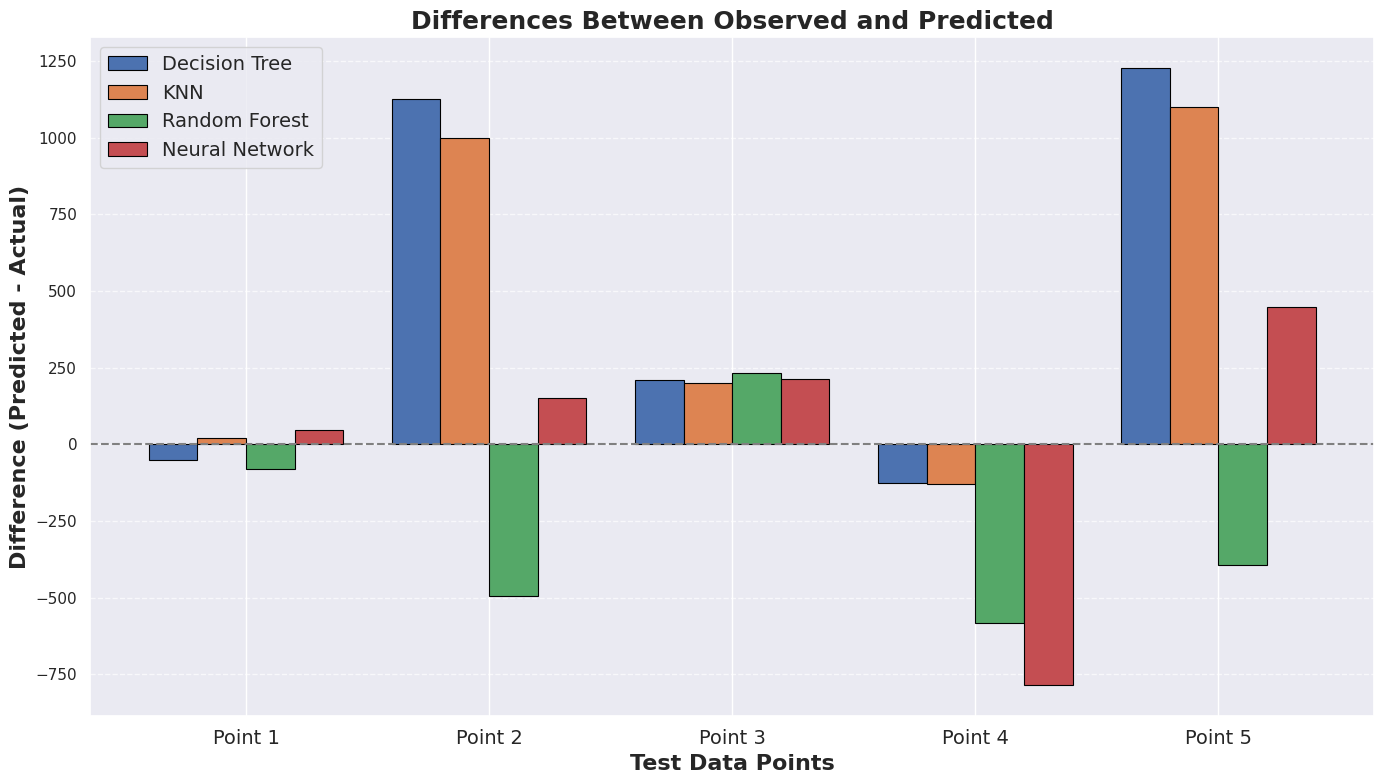

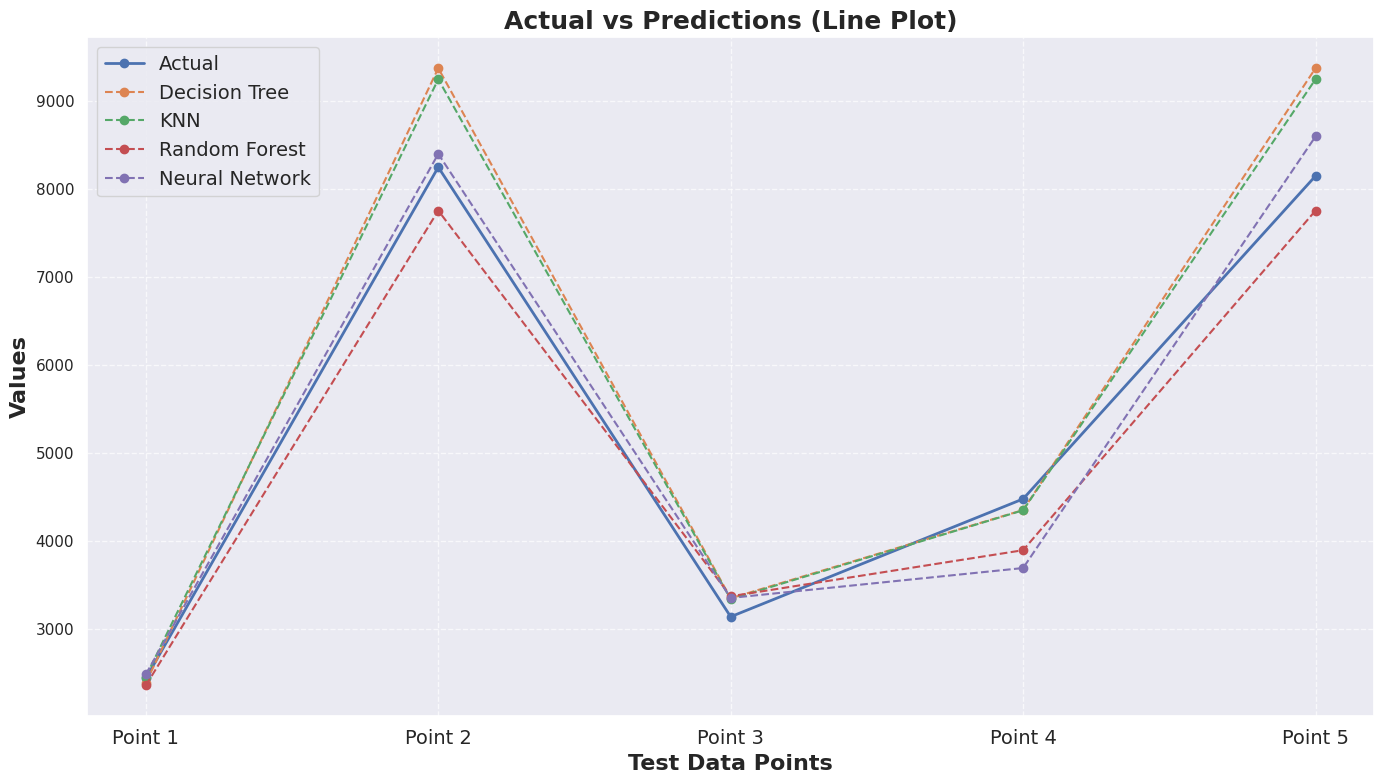

In [ ]:
# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Select relevant features for X and encode the target variable y
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# ---------------------------
# Apply Best Parameters and Fit Models
# ---------------------------

# 1. Decision Tree Regressor
best_dt = DecisionTreeRegressor(
    splitter='random',
    min_samples_split=4,
    min_samples_leaf=2,
    max_features=None,
    max_depth=34,
    criterion='poisson',
    random_state=42
)
best_dt.fit(X_train, y_train)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)

# 2. KNN Regressor
best_knn = KNeighborsRegressor(
    weights='uniform',
    p=1,
    n_neighbors=1,
    leaf_size=50,
    algorithm='brute'
)
best_knn.fit(X_train, y_train)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# 3. Random Forest Regressor
best_rf = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=7,
    min_samples_leaf=3,
    max_features=None,
    max_depth=10,
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)

# 4. Custom Neural Network Regressor
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=5, hidden_units=256, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=200, batch_size=8):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

best_nn = CustomKerasRegressor()
best_nn.fit(X_train, y_train)
nn_predictions_test = np.round(best_nn.predict(X_test)).astype(int)

# Combine Predictions into DataFrame
results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Decision Tree': dt_predictions_test,
    'KNN': knn_predictions_test,
    'Random Forest': rf_predictions_test,
    'Neural Network': nn_predictions_test
})
print("Combined Results Table (Test Data):")
print(results_table)

# ---------------------------
# Plotting Results
# ---------------------------

# 1. Grouped Bar Plot
def plot_grouped_bar(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Actual', 'Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    predictions = [y_test, dt_preds, knn_preds, rf_preds, nn_preds]

    indices = np.arange(len(y_test))
    width = 0.15  # Adjusted width for multiple bars

    plt.figure(figsize=(14, 8))
    for i, (model, pred) in enumerate(zip(models, predictions)):
        plt.bar(indices + i * width, pred, width, label=model, edgecolor='black', linewidth=0.8)

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Grouped Bar)', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 2), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

# 2. Differences Between Observed and Predictions
def plot_difference_bar(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    differences = [
        np.array(dt_preds) - np.array(y_test),
        np.array(knn_preds) - np.array(y_test),
        np.array(rf_preds) - np.array(y_test),
        np.array(nn_preds) - np.array(y_test),
    ]

    indices = np.arange(len(y_test))
    width = 0.2  # Adjusted width for difference plot

    plt.figure(figsize=(14, 8))
    for i, (model, diff) in enumerate(zip(models, differences)):
        plt.bar(indices + i * width, diff, width, label=model, edgecolor='black', linewidth=0.8)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Difference (Predicted - Actual)', fontsize=16, fontweight='bold')
    plt.title('Differences Between Observed and Predicted', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 1.5), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_difference_bar(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

# 3. Line Plot for Predictions
def plot_line_predictions(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    plt.figure(figsize=(14, 8))
    plt.plot(y_test, label='Actual', marker='o', linewidth=2)
    plt.plot(dt_preds, label='Decision Tree', marker='o', linestyle='--')
    plt.plot(knn_preds, label='KNN', marker='o', linestyle='--')
    plt.plot(rf_preds, label='Random Forest', marker='o', linestyle='--')
    plt.plot(nn_preds, label='Neural Network', marker='o', linestyle='--')

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Line Plot)', fontsize=18, fontweight='bold')
    plt.xticks(range(len(y_test)), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_line_predictions(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Combined Results Table (Test Data):
   Actual  Decision Tree   KNN  Random Forest  Neural Network
0    5465           7043  6446           6624            4312
1    9248           7043  8248           7594            8206
2    5265           7043  6446           6490            4312
3    2462           1803  2453           1872            2391
4    8148           7043  8248           7594            8000


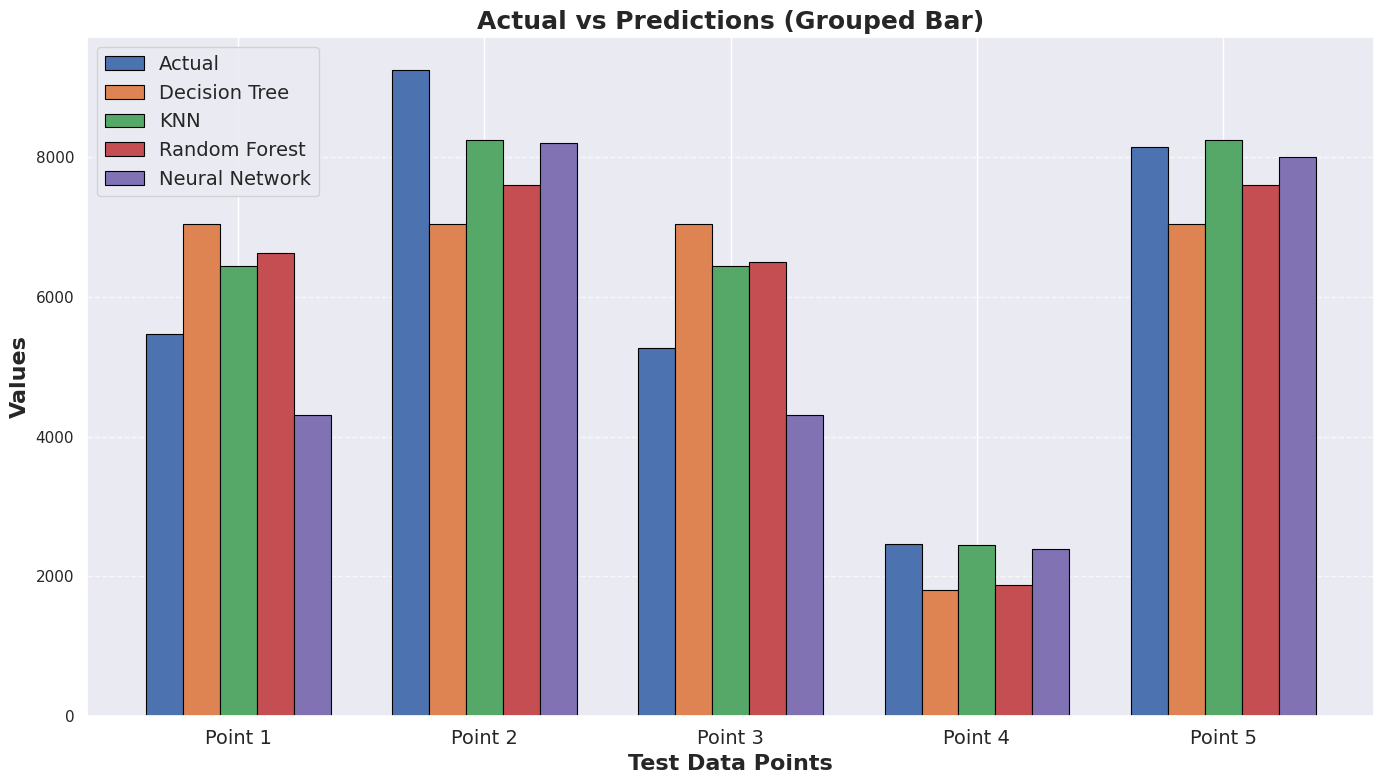

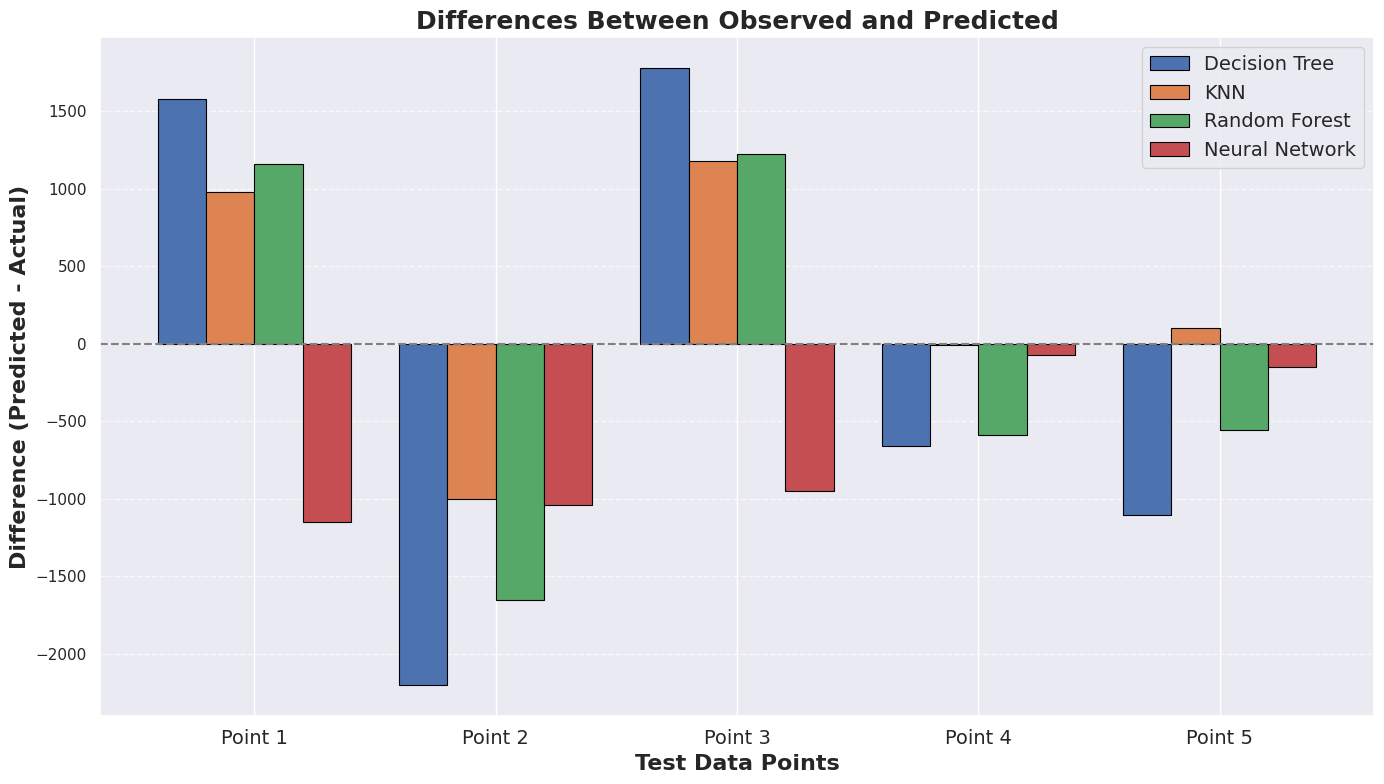

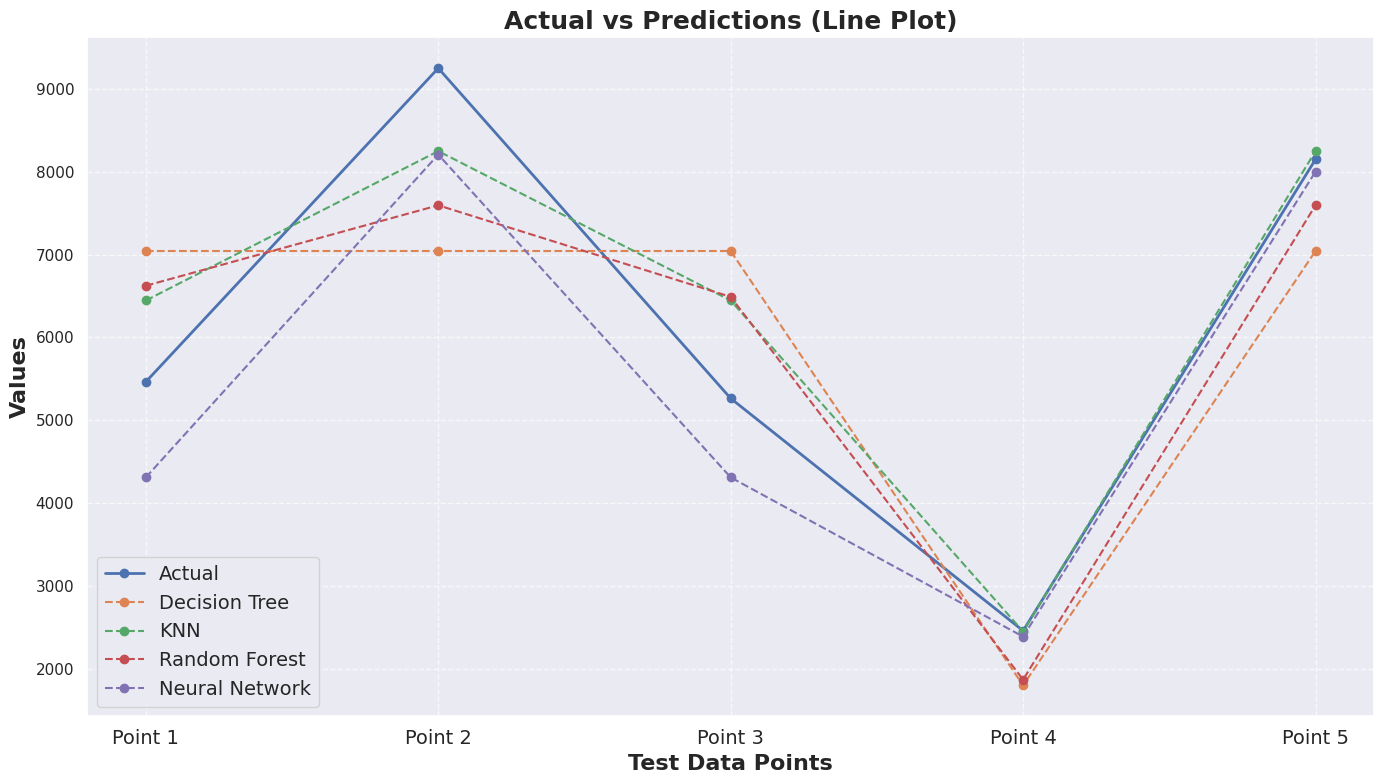

In [ ]:
# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Select relevant features for X and encode the target variable y
# X = df[['Storm  Year/ Name', 'Landfall Location', 'Location to Central/ Meghna Estuary', 'Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# ---------------------------
# Apply Best Parameters and Fit Models
# ---------------------------

# 1. Decision Tree Regressor
best_dt = DecisionTreeRegressor(
    splitter='random',
    min_samples_split=8,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=19,
    criterion='poisson',
    random_state=42
)
best_dt.fit(X_train, y_train)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)

# 2. KNN Regressor
best_knn = KNeighborsRegressor(
    weights='uniform',
    p=1,
    n_neighbors=1,
    leaf_size=50,
    algorithm='brute'
)
best_knn.fit(X_train, y_train)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# 3. Random Forest Regressor
best_rf = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=7,
    min_samples_leaf=2,
    max_features=None,
    max_depth=None,
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)

# 4. Custom Neural Network Regressor
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=5, hidden_units=128, activation='relu', learning_rate=0.001, dropout_rate=0.2, epochs=100, batch_size=128):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

best_nn = CustomKerasRegressor()
best_nn.fit(X_train, y_train)
nn_predictions_test = np.round(best_nn.predict(X_test)).astype(int)

# Combine Predictions into DataFrame
results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Decision Tree': dt_predictions_test,
    'KNN': knn_predictions_test,
    'Random Forest': rf_predictions_test,
    'Neural Network': nn_predictions_test
})
print("Combined Results Table (Test Data):")
print(results_table)

# ---------------------------
# Plotting Results
# ---------------------------

# 1. Grouped Bar Plot
def plot_grouped_bar(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Actual', 'Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    predictions = [y_test, dt_preds, knn_preds, rf_preds, nn_preds]

    indices = np.arange(len(y_test))
    width = 0.15  # Adjusted width for multiple bars

    plt.figure(figsize=(14, 8))
    for i, (model, pred) in enumerate(zip(models, predictions)):
        plt.bar(indices + i * width, pred, width, label=model, edgecolor='black', linewidth=0.8)

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Grouped Bar)', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 2), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

# 2. Differences Between Observed and Predictions
def plot_difference_bar(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    differences = [
        np.array(dt_preds) - np.array(y_test),
        np.array(knn_preds) - np.array(y_test),
        np.array(rf_preds) - np.array(y_test),
        np.array(nn_preds) - np.array(y_test),
    ]

    indices = np.arange(len(y_test))
    width = 0.2  # Adjusted width for difference plot

    plt.figure(figsize=(14, 8))
    for i, (model, diff) in enumerate(zip(models, differences)):
        plt.bar(indices + i * width, diff, width, label=model, edgecolor='black', linewidth=0.8)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Difference (Predicted - Actual)', fontsize=16, fontweight='bold')
    plt.title('Differences Between Observed and Predicted', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 1.5), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_difference_bar(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

# 3. Line Plot for Predictions
def plot_line_predictions(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    plt.figure(figsize=(14, 8))
    plt.plot(y_test, label='Actual', marker='o', linewidth=2)
    plt.plot(dt_preds, label='Decision Tree', marker='o', linestyle='--')
    plt.plot(knn_preds, label='KNN', marker='o', linestyle='--')
    plt.plot(rf_preds, label='Random Forest', marker='o', linestyle='--')
    plt.plot(nn_preds, label='Neural Network', marker='o', linestyle='--')

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Line Plot)', fontsize=18, fontweight='bold')
    plt.xticks(range(len(y_test)), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_line_predictions(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


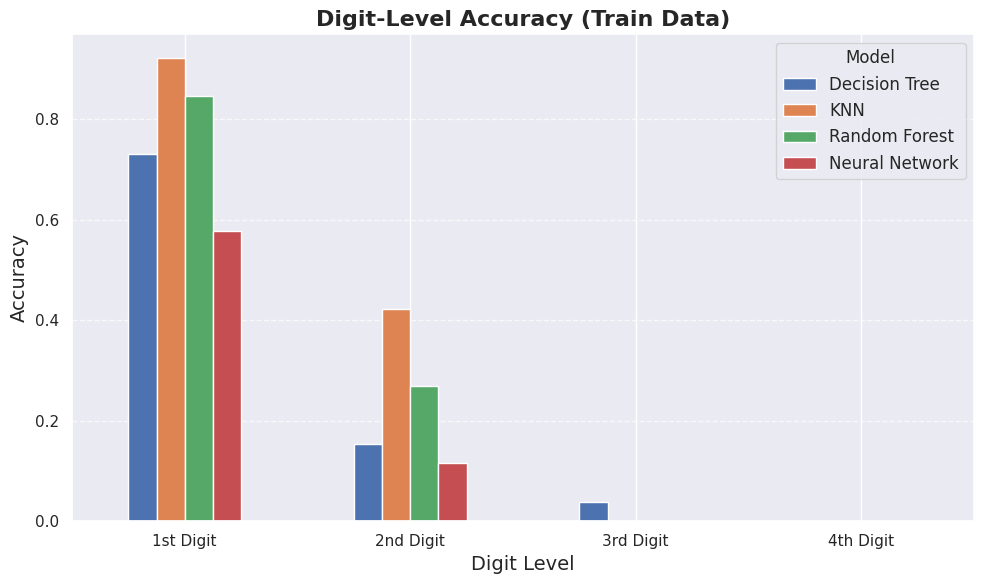

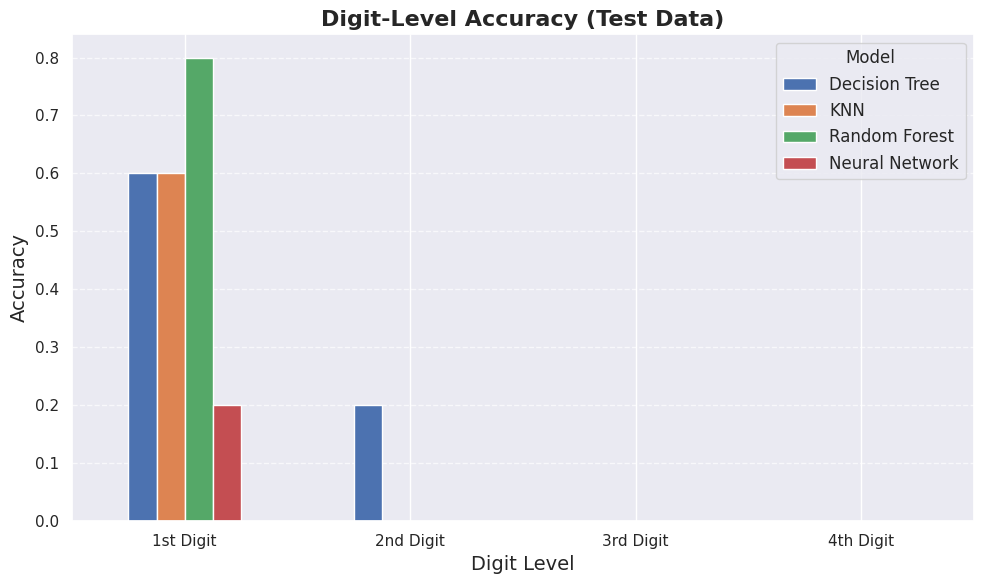

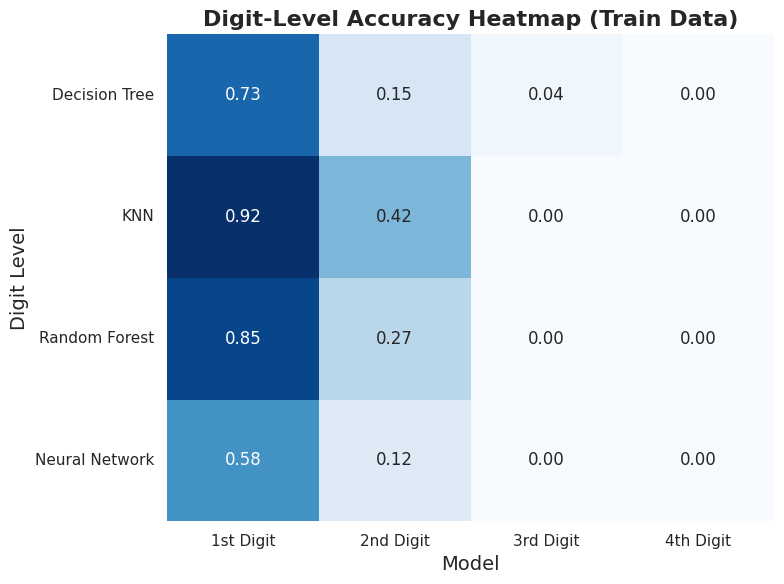

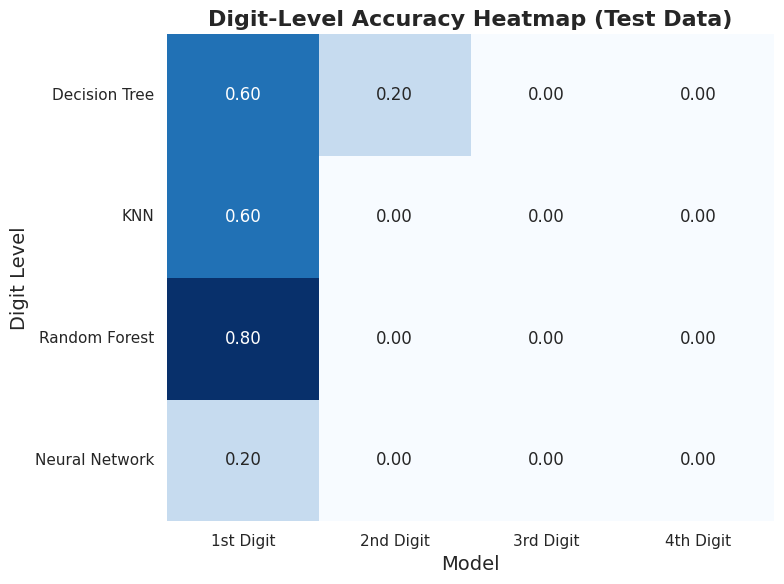

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, RegressorMixin

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
df = pd.read_csv('/content/drive/My Drive/Rezaie/Rezaie Data.csv')

X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# ---------------------------
# Apply Best Parameters and Fit Models
# ---------------------------

# 1. Decision Tree Regressor
best_dt = DecisionTreeRegressor(
    splitter='best',
    min_samples_split=9,
    min_samples_leaf=1,
    max_features=None,
    max_depth=21,
    criterion='poisson',
    random_state=42
)
best_dt.fit(X_train, y_train)
dt_predictions_train = np.round(best_dt.predict(X_train)).astype(int)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)

# 2. KNN Regressor
best_knn = KNeighborsRegressor(
    weights='uniform',
    p=1,
    n_neighbors=2,
    leaf_size=40,
    algorithm='kd_tree'
)
best_knn.fit(X_train, y_train)
knn_predictions_train = np.round(best_knn.predict(X_train)).astype(int)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# 3. Random Forest Regressor
best_rf = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features=None,
    max_depth=15,
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_predictions_train = np.round(best_rf.predict(X_train)).astype(int)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)

# 4. Custom Neural Network Regressor
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=4, hidden_units=256, activation='relu', learning_rate=0.01, dropout_rate=0.4, epochs=50, batch_size=64):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

best_nn = CustomKerasRegressor()
best_nn.fit(X_train, y_train)
nn_predictions_train = np.round(best_nn.predict(X_train)).astype(int)
nn_predictions_test = np.round(best_nn.predict(X_test)).astype(int)

# Combine Predictions into DataFrame
train_results = pd.DataFrame({
    'Actual': y_train.values,
    'Decision Tree': dt_predictions_train,
    'KNN': knn_predictions_train,
    'Random Forest': rf_predictions_train,
    'Neural Network': nn_predictions_train
})

test_results = pd.DataFrame({
    'Actual': y_test.values,
    'Decision Tree': dt_predictions_test,
    'KNN': knn_predictions_test,
    'Random Forest': rf_predictions_test,
    'Neural Network': nn_predictions_test
})

# ---------------------------
# Step 2: Digit-Level Analysis
# ---------------------------

def calculate_digit_accuracy(results):
    accuracies = {}
    for col in results.columns[1:]:
        digit_correct = []
        for i in range(1, 5):  # First to Fourth digit
            actual_digits = results['Actual'].astype(str).str.zfill(4).str[:i]
            predicted_digits = results[col].astype(str).str.zfill(4).str[:i]
            digit_correct.append((actual_digits == predicted_digits).mean())
        accuracies[col] = digit_correct
    return pd.DataFrame(accuracies, index=['1st Digit', '2nd Digit', '3rd Digit', '4th Digit'])

train_digit_accuracies = calculate_digit_accuracy(train_results)
test_digit_accuracies = calculate_digit_accuracy(test_results)

# ---------------------------
# Step 3: Visualizations
# ---------------------------

def plot_digit_accuracies(digit_accuracies, title):
    digit_accuracies.plot(kind='bar', figsize=(10, 6), rot=0)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Digit Level', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(title='Model', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot digit-level accuracies
plot_digit_accuracies(train_digit_accuracies, 'Digit-Level Accuracy (Train Data)')
plot_digit_accuracies(test_digit_accuracies, 'Digit-Level Accuracy (Test Data)')

# Heatmap of digit-level performance
def plot_heatmap(digit_accuracies, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(digit_accuracies, annot=True, cmap='Blues', fmt='.2f', cbar=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Digit Level', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_heatmap(train_digit_accuracies.T, 'Digit-Level Accuracy Heatmap (Train Data)')
plot_heatmap(test_digit_accuracies.T, 'Digit-Level Accuracy Heatmap (Test Data)')


In [ ]:
# # ---------------------------
# # Step 1: Data Preparation
# # ---------------------------
# # Select relevant features for X and encode the target variable y
# # X = df[['Storm  Year/ Name', 'Landfall Location', 'Location to Central/ Meghna Estuary', 'Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
# X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
# y = df['Inundation Map Number']

# # Manually split the dataset with 5 random test samples
# test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
# X_test = X.loc[test_indices]
# y_test = y[test_indices]
# X_train = X.drop(test_indices)
# y_train = y.drop(test_indices)

# # ---------------------------
# # Apply Best Parameters and Fit Models
# # ---------------------------

# # 1. Decision Tree Regressor
# best_dt = DecisionTreeRegressor(
#     splitter='random',
#     min_samples_split=8,
#     min_samples_leaf=4,
#     max_features=None,
#     max_depth=None,
#     criterion='squared_error',
#     random_state=42
# )
# best_dt.fit(X_train, y_train)
# dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)

# # 2. Random Forest Regressor
# best_rf = RandomForestRegressor(
#     n_estimators=50,
#     min_samples_split=3,
#     min_samples_leaf=2,
#     max_features=None,
#     max_depth=15,
#     bootstrap=True,
#     random_state=42
# )
# best_rf.fit(X_train, y_train)
# rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)

# # 3. MLP Regressor
# best_mlp = MLPRegressor(
#     solver='lbfgs',
#     learning_rate='invscaling',
#     hidden_layer_sizes=(99,),
#     alpha=19.306977288832496,
#     activation='logistic',
#     max_iter=5000,
#     random_state=42
# )
# best_mlp.fit(X_train, y_train)
# mlp_predictions_test = np.round(best_mlp.predict(X_test)).astype(int)

# # 4. KNN Regressor
# best_knn = KNeighborsRegressor(
#     weights='uniform',
#     p=1,
#     n_neighbors=2,
#     leaf_size=40,
#     algorithm='kd_tree'
# )
# best_knn.fit(X_train, y_train)
# knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# # Combine Predictions into DataFrame
# results_table = pd.DataFrame({
#     'Actual': y_test.values,
#     'Decision Tree': dt_predictions_test,
#     'Random Forest': rf_predictions_test,
#     'MLP': mlp_predictions_test,
#     'KNN': knn_predictions_test
# })
# print("Combined Results Table (Test Data):")
# print(results_table)

# # ---------------------------
# # Plot 1: Grouped Bar Plot
# # ---------------------------
# def plot_grouped_bar(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
#     models = ['Actual', 'Decision Tree', 'Random Forest', 'MLP', 'KNN']
#     predictions = [y_test, dt_preds, rf_preds, mlp_preds, knn_preds]

#     indices = np.arange(len(y_test))
#     width = 0.15  # Adjusted width for multiple bars

#     plt.figure(figsize=(14, 8))
#     for i, (model, pred) in enumerate(zip(models, predictions)):
#         plt.bar(indices + i * width, pred, width, label=model, edgecolor='black', linewidth=0.8)

#     plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
#     plt.ylabel('Values', fontsize=16, fontweight='bold')
#     plt.title('Actual vs Predictions (Grouped Bar)', fontsize=18, fontweight='bold')
#     plt.xticks(indices + (width * 2), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
#     plt.legend(fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()

# plot_grouped_bar(y_test.values, dt_predictions_test, rf_predictions_test, mlp_predictions_test, knn_predictions_test)

# # ---------------------------
# # Plot 2: Differences Between Observed and Predictions
# # ---------------------------
# def plot_difference_bar(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
#     models = ['Decision Tree', 'Random Forest', 'MLP', 'KNN']
#     differences = [
#         np.array(dt_preds) - np.array(y_test),
#         np.array(rf_preds) - np.array(y_test),
#         np.array(mlp_preds) - np.array(y_test),
#         np.array(knn_preds) - np.array(y_test),
#     ]

#     indices = np.arange(len(y_test))
#     width = 0.2  # Adjusted width for difference plot

#     plt.figure(figsize=(14, 8))
#     for i, (model, diff) in enumerate(zip(models, differences)):
#         plt.bar(indices + i * width, diff, width, label=model, edgecolor='black', linewidth=0.8)

#     plt.axhline(0, color='gray', linestyle='--')
#     plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
#     plt.ylabel('Difference (Predicted - Actual)', fontsize=16, fontweight='bold')
#     plt.title('Differences Between Observed and Predicted', fontsize=18, fontweight='bold')
#     plt.xticks(indices + (width * 1.5), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
#     plt.legend(fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()

# plot_difference_bar(y_test.values, dt_predictions_test, rf_predictions_test, mlp_predictions_test, knn_predictions_test)

# # ---------------------------
# # Plot 3: Line Plot for Predictions
# # ---------------------------
# def plot_line_predictions(y_test, dt_preds, rf_preds, mlp_preds, knn_preds):
#     plt.figure(figsize=(14, 8))
#     plt.plot(y_test, label='Actual', marker='o', linewidth=2)
#     plt.plot(dt_preds, label='Decision Tree', marker='o', linestyle='--')
#     plt.plot(rf_preds, label='Random Forest', marker='o', linestyle='--')
#     plt.plot(mlp_preds, label='MLP', marker='o', linestyle='--')
#     plt.plot(knn_preds, label='KNN', marker='o', linestyle='--')

#     plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
#     plt.ylabel('Values', fontsize=16, fontweight='bold')
#     plt.title('Actual vs Predictions (Line Plot)', fontsize=18, fontweight='bold')
#     plt.xticks(range(len(y_test)), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
#     plt.legend(fontsize=14)
#     plt.grid(axis='both', linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()

# plot_line_predictions(y_test.values, dt_predictions_test, rf_predictions_test, mlp_predictions_test, knn_predictions_test)

In [ ]:
# ---------------------------
# Generate Predictions for Train and Test Data
# ---------------------------
# Predictions for train data
dt_predictions_train = np.round(best_dt.predict(X_train)).astype(int)
rf_predictions_train = np.round(best_rf.predict(X_train)).astype(int)
mlp_predictions_train = np.round(best_mlp.predict(X_train)).astype(int)
knn_predictions_train = np.round(best_knn.predict(X_train)).astype(int)

# Predictions for test data (already calculated above)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)
mlp_predictions_test = np.round(best_mlp.predict(X_test)).astype(int)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# ---------------------------
# Combine Predictions into DataFrames
# ---------------------------
# Train Data Results Table
results_table_train = pd.DataFrame({
    'Actual': y_train.values,  # Ensure compatibility with numpy arrays
    'Decision Tree': dt_predictions_train,
    'Random Forest': rf_predictions_train,
    'Neural Network': mlp_predictions_train,
    'KNN': knn_predictions_train
})
results_table_train.reset_index(drop=True, inplace=True)

# Test Data Results Table
results_table_test = pd.DataFrame({
    'Actual': y_test.values,  # Ensure compatibility with numpy arrays
    'Decision Tree': dt_predictions_test,
    'Random Forest': rf_predictions_test,
    'Neural Network': mlp_predictions_test,
    'KNN': knn_predictions_test
})
results_table_test.reset_index(drop=True, inplace=True)

# ---------------------------
# Display and Save the Tables
# ---------------------------
# Print combined results for train data
print("Combined Results Table (Train Data):")
print(results_table_train)

# Save train data table to CSV
results_table_train.to_csv('combined_results_train_table.csv', index=False)

# Display train data table in a nicely formatted way
from IPython.display import display
display(results_table_train)

# Print combined results for test data
print("Combined Results Table (Test Data):")
print(results_table_test)

# Save test data table to CSV
results_table_test.to_csv('combined_results_test_table.csv', index=False)

# Display test data table in a nicely formatted way
display(results_table_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Combined Results Table (Train Data):
    Actual  Decision Tree  Random Forest  Neural Network   KNN
0     2353           1724           2139            2482  2353
1     1153           1803           1609            2045  1153
2     7487           6376           7568            7472  7487
3     5465           6358           5940            4526  5465
4     6446           6358           6287            4919  6446
5     3353           3353           3052            2881  3353
6     8148           8225           8111            8455  8148
7     2253           1724           2144            2484  2253
8     5265           6376           5895            4522  5265
9     7489           8494           7667            7775  7489
10    1352           1724           1602            2042  1352
11    7363           6358           6794            7296  7363
12    8248           8225           8111            8283  8248
13  

Actual  Decision Tree  Random Forest  Neural Network   KNN
0     2353           1724           2139            2482  2353
1     1153           1803           1609            2045  1153
2     7487           6376           7568            7472  7487
3     5465           6358           5940            4526  5465
4     6446           6358           6287            4919  6446
5     3353           3353           3052            2881  3353
6     8148           8225           8111            8455  8148
7     2253           1724           2144            2484  2253
8     5265           6376           5895            4522  5265
9     7489           8494           7667            7775  7489
10    1352           1724           1602            2042  1352
11    7363           6358           6794            7296  7363
12    8248           8225           8111            8283  8248
13    1232           1724           1591            2035  1232
14    4474           4390           4005            3681  4474
15    9499           8494           8208            9973  9499
16    7257           8225           7558            7452  7257
17    4345           4390           4141            3690  4345
18    6156           6358           6349            5310  6156
19    3134           3134           3613            3275  3134
20    1332           1724           1594            2037  1332
21    9248           8225           8234            8672  9248
22    1111           1724           1591            2022  1111
23    2433           1724           2129            2475  2433
24    2453           1803           2145            2482  2453
25    4351           4390           3684            3629  4351

Combined Results Table (Test Data):
   Actual  Decision Tree  Random Forest  Neural Network   KNN
0    2462           1803           1929            2482  2453
1    6346           6358           6353            5337  6156
2    1332           1724           1594            2037  1332
3    3334           3353           3124            2895  3353
4    2313           1724           2123            2463  2433


Actual  Decision Tree  Random Forest  Neural Network   KNN
0    2462           1803           1929            2482  2453
1    6346           6358           6353            5337  6156
2    1332           1724           1594            2037  1332
3    3334           3353           3124            2895  3353
4    2313           1724           2123            2463  2433

###NN regressor

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'learning_rate': 0.01, 'hidden_units': 256, 'hidden_layers': 4, 'epochs': 50, 'dropout_rate': 0.4, 'batch_size': 64, 'activation': 'relu'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Test Results:
   Actual  Predicted
0    2433       2562
1    8248       8385
2    3134       3380
3    4474       3782
4    8148       8569


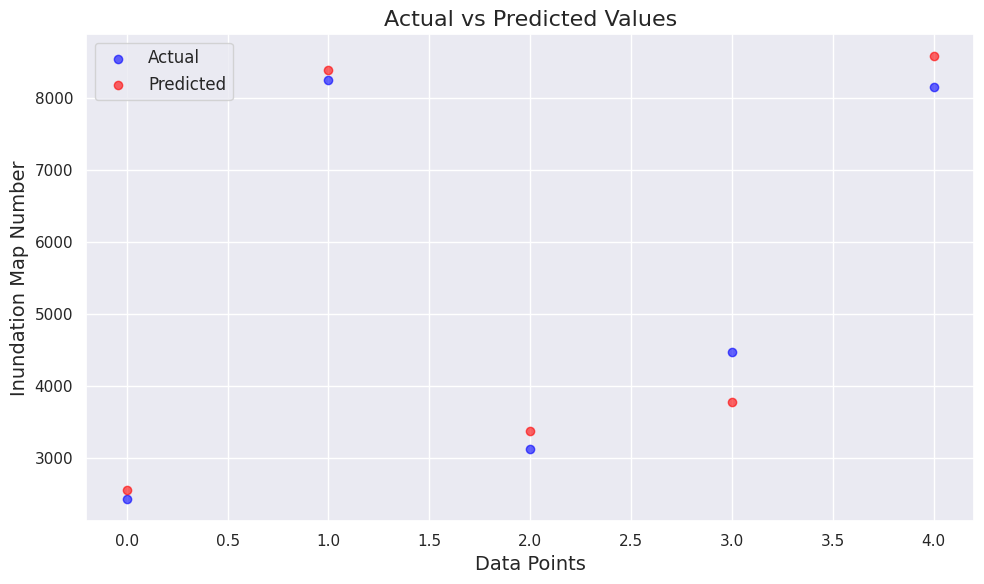

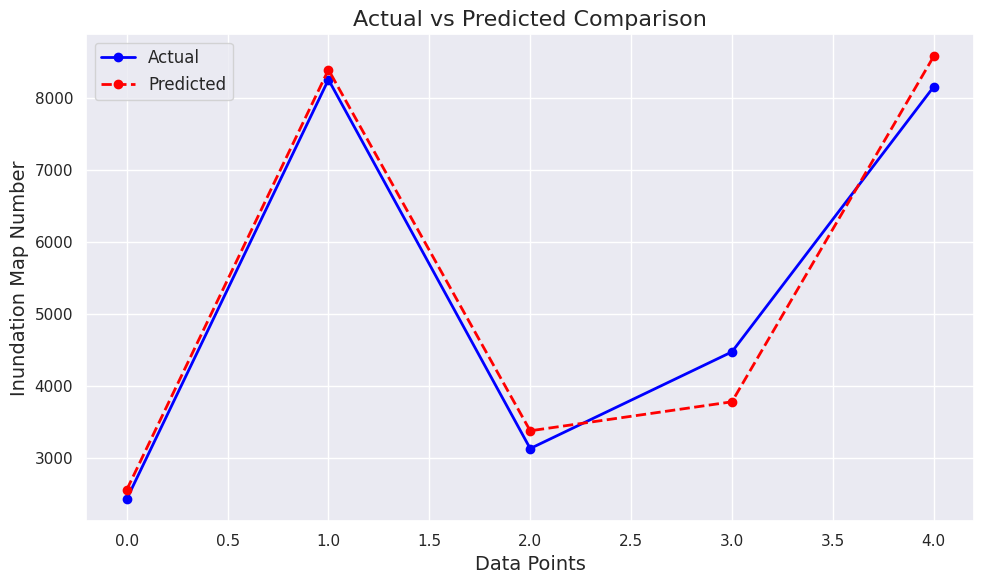

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import RandomizedSearchCV

# Set random seed for reproducibility
np.random.seed(42)

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
df = pd.read_csv('/content/drive/My Drive/Rezaie/Rezaie Data.csv')

X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# ---------------------------
# Step 2: Define Custom Wrapper for Keras Model
# ---------------------------
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=2, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))  # Output layer for regression
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

# Instantiate the regressor
regressor = CustomKerasRegressor()

# ---------------------------
# Step 3: Hyperparameter Tuning
# ---------------------------
param_distributions = {
    'hidden_layers': [2, 3, 4, 5],
    'hidden_units': [32, 64, 128, 256],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.4, 0.5],
    'batch_size': [8, 16, 32, 64, 128],
    'epochs': [50, 100, 200]
}

random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)

# Train Final Model with Best Parameters
best_params = random_search.best_params_
final_model = CustomKerasRegressor(**best_params)
final_model.fit(X_train, y_train)

# ---------------------------
# Step 4: Evaluate and Test the Model
# ---------------------------
# Predict on test data
y_test_pred = np.round(final_model.predict(X_test)).astype(int)

# Combine actual and predicted values into a DataFrame
results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred.flatten()
})
print("Test Results:")
print(results_table)

# Save results to CSV
results_table.to_csv('mlp_test_results.csv', index=False)

# ---------------------------
# Step 5: Plot Training History
# ---------------------------
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
    plt.scatter(range(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.6)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Inundation Map Number', fontsize=14)
    plt.title('Actual vs Predicted Values', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test.values, y_test_pred.flatten())

# ---------------------------
# Step 6: Plot Predictions Comparison
# ---------------------------
def plot_comparison(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, marker='o', label='Actual', color='blue', linewidth=2)
    plt.plot(range(len(y_test)), y_pred, marker='o', label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Inundation Map Number', fontsize=14)
    plt.title('Actual vs Predicted Comparison', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_comparison(y_test.values, y_test_pred.flatten())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Test Results:
   Actual  Predicted
0    2433       2413
1    8248       7802
2    3134       3173
3    4474       3559
4    8148       7976


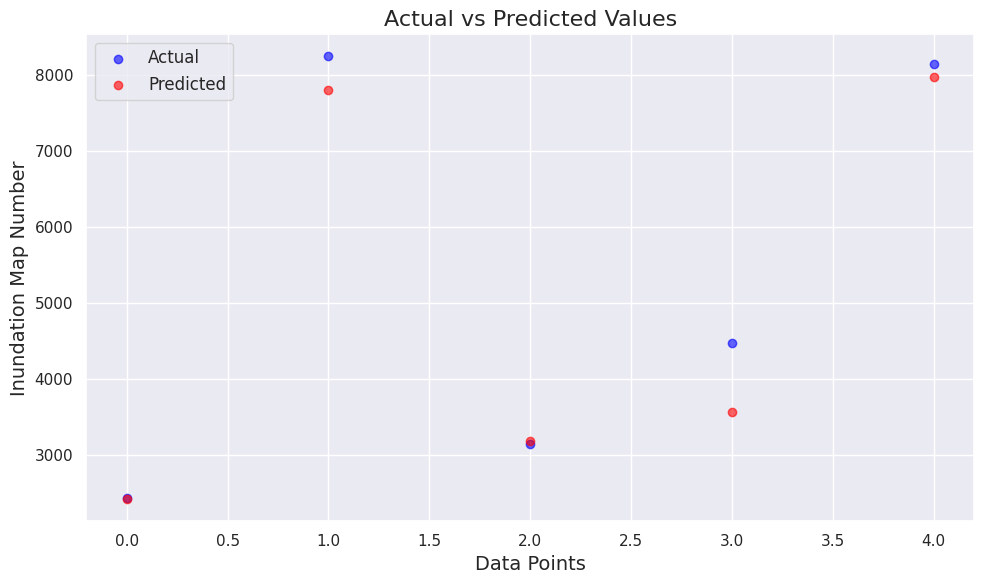

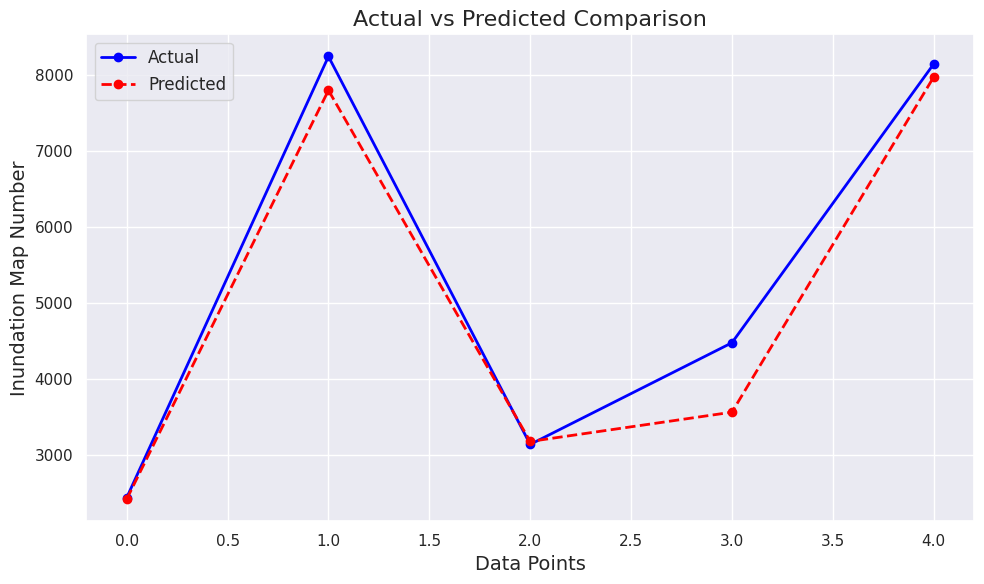

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
df = pd.read_csv('/content/drive/My Drive/Rezaie/Rezaie Data.csv')

X = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)']]
y = df['Inundation Map Number']

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)


# ---------------------------
# Define and Train the Neural Network Model
# ---------------------------
def build_keras_model(hidden_layers=3, hidden_units=128, activation='relu', learning_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_dim=X_train.shape[1]))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  # Regression output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Best Parameters from RandomizedSearchCV
best_params = {
    'hidden_layers': 3,
    'hidden_units': 128,
    'activation': 'relu',
    'learning_rate': 0.01,
    'dropout_rate': 0.2,
    'epochs': 50,
    'batch_size': 16
}

# Build and train the final model
final_model = build_keras_model(
    hidden_layers=best_params['hidden_layers'],
    hidden_units=best_params['hidden_units'],
    activation=best_params['activation'],
    learning_rate=best_params['learning_rate'],
    dropout_rate=best_params['dropout_rate']
)
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# ---------------------------
# Step 2: Evaluate and Test the Model
# ---------------------------
# Predict on test data
y_test_pred = np.round(final_model.predict(X_test)).astype(int)

# Combine actual and predicted values into a DataFrame
results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred.flatten()
})
print("Test Results:")
print(results_table)

# Save results to CSV
results_table.to_csv('mlp_test_results.csv', index=False)

# ---------------------------
# Step 3: Plot Predictions
# ---------------------------
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
    plt.scatter(range(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.6)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Inundation Map Number', fontsize=14)
    plt.title('Actual vs Predicted Values', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test.values, y_test_pred.flatten())

# ---------------------------
# Step 4: Plot Predictions Comparison
# ---------------------------
def plot_comparison(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, marker='o', label='Actual', color='blue', linewidth=2)
    plt.plot(range(len(y_test)), y_pred, marker='o', label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Data Points', fontsize=14)
    plt.ylabel('Inundation Map Number', fontsize=14)
    plt.title('Actual vs Predicted Comparison', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_comparison(y_test.values, y_test_pred.flatten())

#Explanations

The problem can be treated as classification or regression task. If it is treated as regression task then then outcoem shoudl be converted to integer.

Claasification:

Regressiom:

Train/tets strategies:
Training on a portion of daataset (80%) randoly selected datapoints. And then computing the performance on the test set. Tune the HP using the entire train seta and therefore increase the generalization capabilty in the test set.
Then in before delploying the models, train on the whole trainset with the tuned parameters to predict fdor new data.

So, I am getting perfect fit fro the classification for the models... Now can you give me strategies to explore every possibkle things. Focus on the dataset. try to concise and to the point. try to restrict dont elaborrtae so much.

Strategies to Explore Every Possibility
1. Treat as Regression Task
Convert Outputs to Integer:
After regression model predictions, apply np.round() to convert outputs to integers.
Models to Try:
Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, MLP Regressor.
Performance Metrics:
Use metrics like RMSE and R² but also compute classification-style metrics (e.g., Accuracy, F1-score) on rounded predictions to evaluate categorical alignment.
2. Treat as Classification Task
Models to Try:
Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, MLP Classifier, Logistic Regression (if applicable).
Performance Metrics:
Accuracy, F1-score, Precision, Recall.
Explore Multi-Class Scenarios:
Use one-vs-rest or one-vs-one strategies for multi-class if needed.
3. Train/Test Strategies
Random Splits:
Split 80/20 randomly for train/test and ensure stratification if classification.
K-Fold Cross-Validation:
Use 3–5 folds to ensure robust tuning and evaluation.
Leave-One-Out (LOO):
For a small dataset, explore LOO to maximize data utilization.
Train on Full Dataset After Tuning:
After finding the best hyperparameters, retrain models on the entire dataset before deployment.
4. Tuning Strategies
Grid Search: Exhaustive for smaller parameter spaces.
Random Search: For larger spaces to reduce time.
Bayesian Optimization: Use Optuna/Hyperopt for efficient search on small datasets.
Focus on Simpler Parameter Ranges:
For trees: Depth, min samples split, leaf sizes.
For neural nets: Hidden layers, learning rate, alpha.
5. Ensemble Strategies
Combine classification and regression outputs via:
Averaging (for regression outputs).
Majority voting (for classification outputs).
6. Evaluate Generalization
Use unseen data or simulate deployment by creating synthetic test cases.
Compare classification accuracy vs. regression integer-rounded accuracy.
Key Focus:
Test both regression and classification approaches.
Maximize data utilization through cross-validation.
Always train with tuned parameters on the entire dataset before deployment.
Let me know if you need a specific implementation!

Figure: subplots (vertical bar plots for the obs and pred grouped/paired to show side by side) for each model for the test set.  

In [ ]:
Methods:
1. Regression
2. Classification

Data Preparation:
X and y

Models:
1. DT
2. KNN
3. RF
4. NN

Model HP optimization:
1. Random search
2. Grid search

Model performance:
1. Test pred- A table of actual, DT, KNN, RF and NN.
2. Train pred- A table of actual, DT, KNN, RF and NN.
3. Grouped verticle bar plot for test set.
4. Digit-level performance for the innundation number. a) First/second/third/fourth digit-level performance, b) Stepwise digit-level performance
Show through vertical bar plots and heatmap.

In [ ]:
print(list(df))

['Lat', 'Lon', 'Wind Speed', 'P Drop', 'Map Number']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Combined Results Table (Test Data):
   Actual  Decision Tree   KNN  Random Forest  Neural Network
0    2462           2443  1153           1939            1774
1    6346           7488  6156           6508            6190
2    1332           1279  1153           1582            1472
3    3334           5025  3134           3359            3594
4    2313           2443  2433           2196            2083


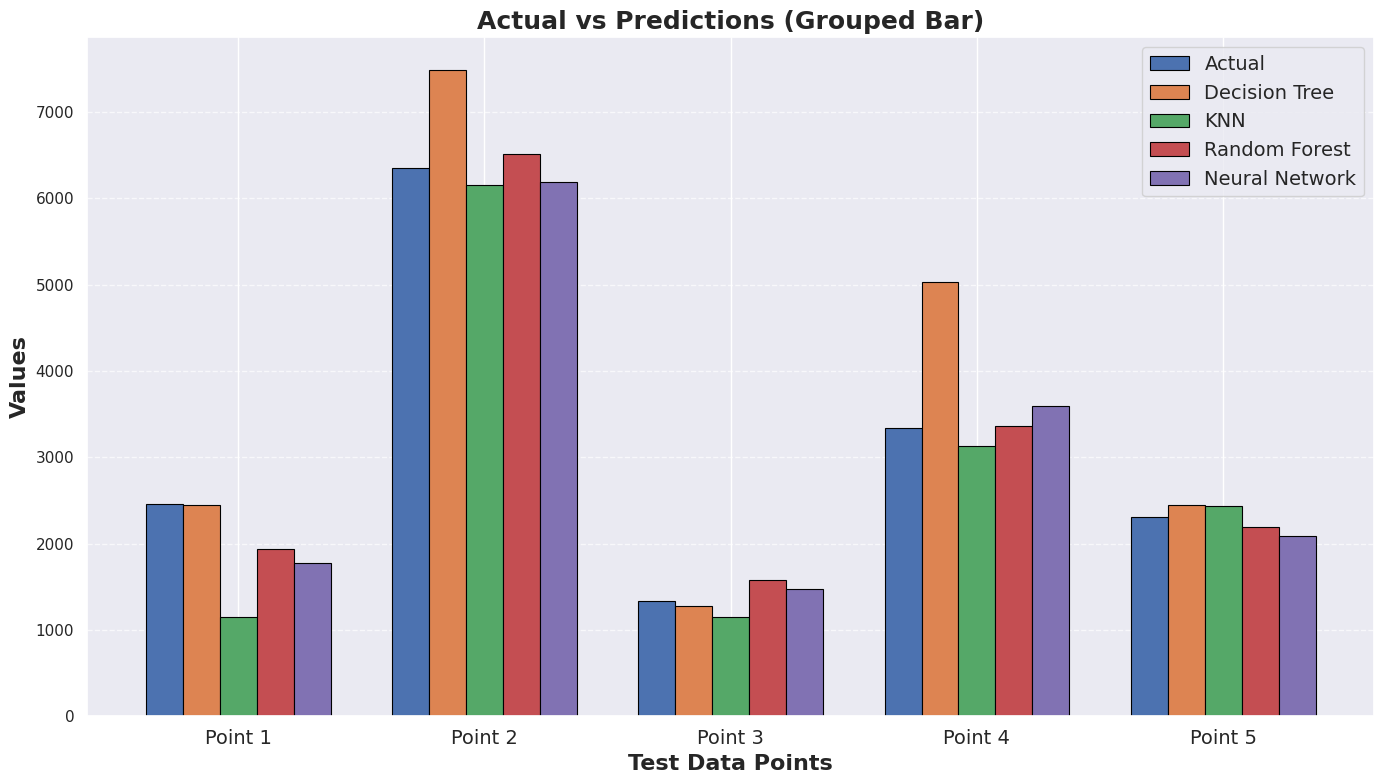

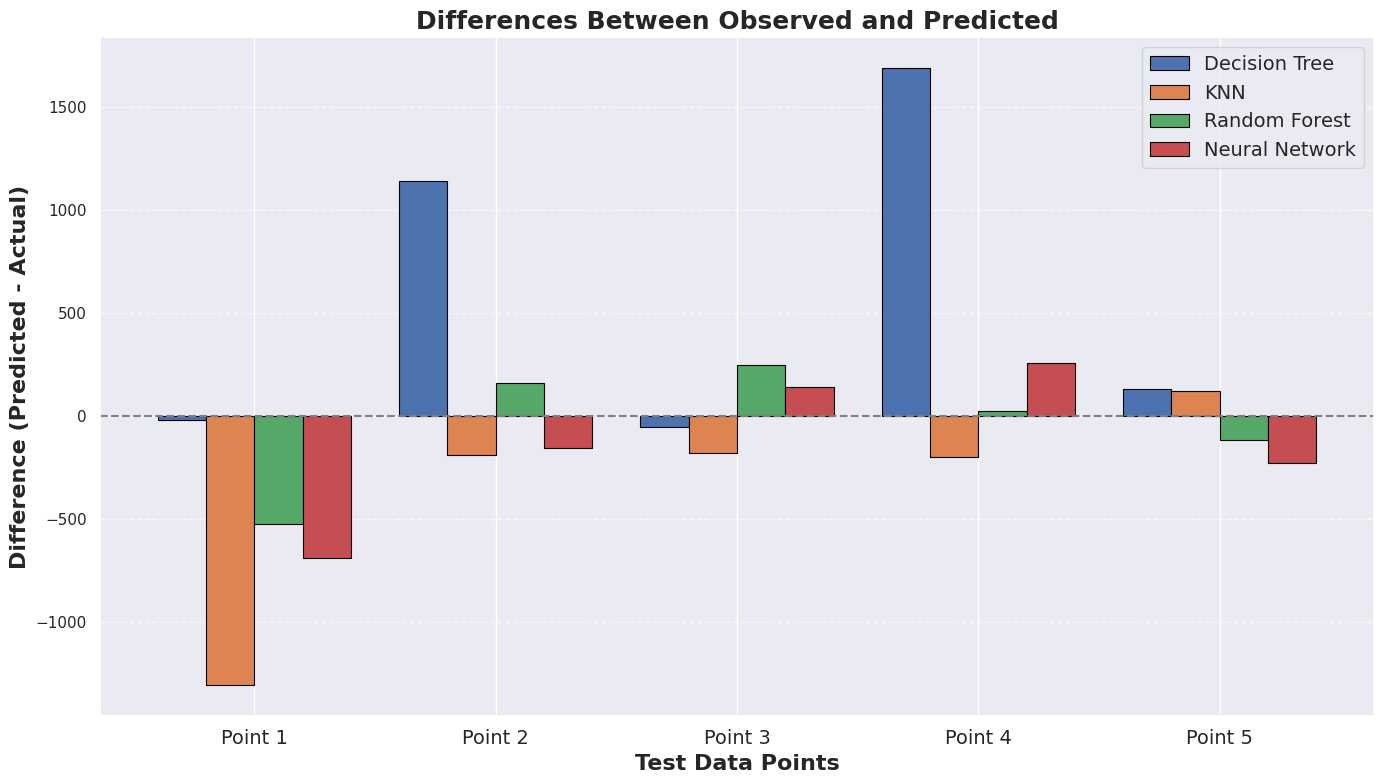

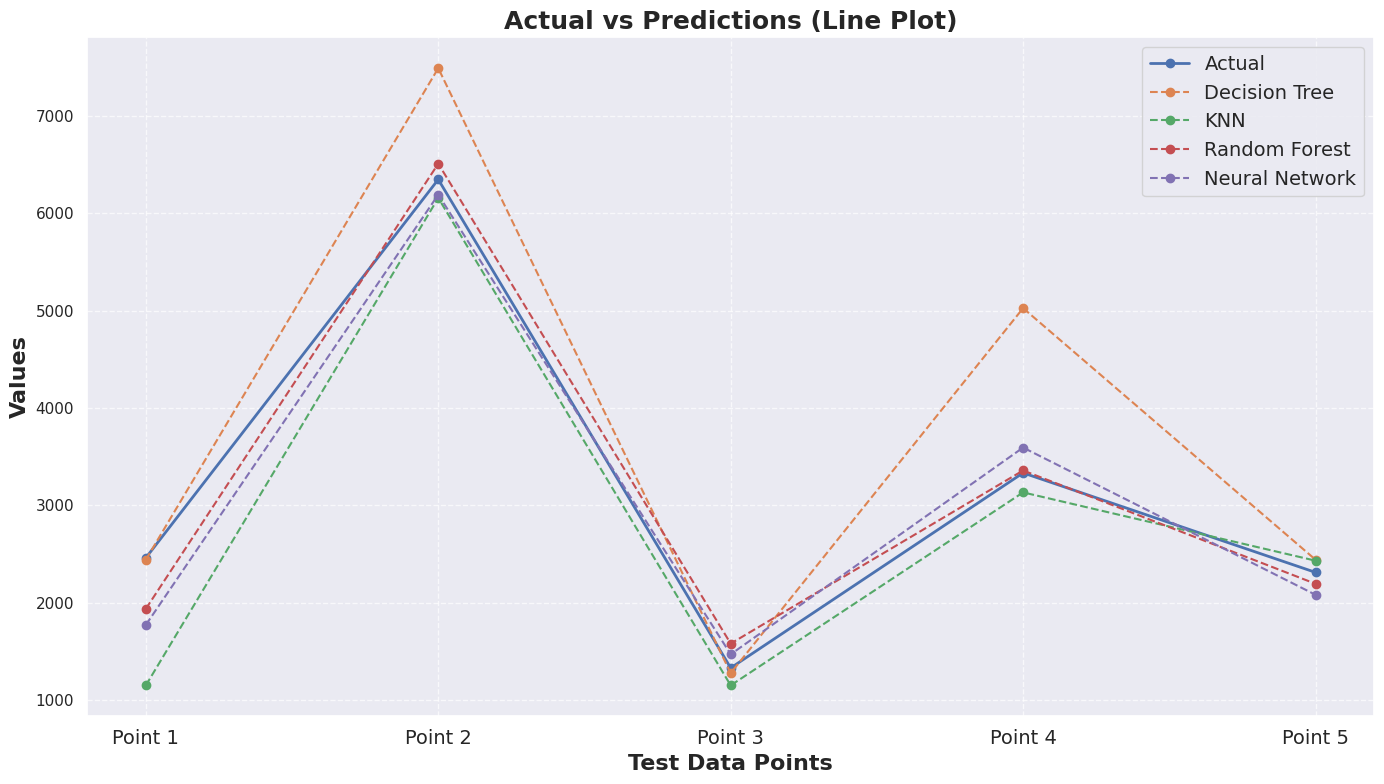

In [ ]:
# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Select relevant features for X and encode the target variable y
X = df[['Lat', 'Lon', 'Wind Speed', 'P Drop']]
y = df['Map Number']

# Manually split the dataset with 5 random test samples
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# ---------------------------
# Apply Best Parameters and Fit Models
# ---------------------------

# 1. Decision Tree Regressor
best_dt = DecisionTreeRegressor(
    splitter='random',
    min_samples_split=4,
    min_samples_leaf=2,
    max_features=None,
    max_depth=34,
    criterion='poisson',
    random_state=42
)
best_dt.fit(X_train, y_train)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)

# 2. KNN Regressor
best_knn = KNeighborsRegressor(
    weights='uniform',
    p=1,
    n_neighbors=1,
    leaf_size=50,
    algorithm='brute'
)
best_knn.fit(X_train, y_train)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# 3. Random Forest Regressor
best_rf = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=7,
    min_samples_leaf=3,
    max_features=None,
    max_depth=10,
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)

# 4. Custom Neural Network Regressor
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=5, hidden_units=256, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=200, batch_size=8):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

best_nn = CustomKerasRegressor()
best_nn.fit(X_train, y_train)
nn_predictions_test = np.round(best_nn.predict(X_test)).astype(int)

# Combine Predictions into DataFrame
results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Decision Tree': dt_predictions_test,
    'KNN': knn_predictions_test,
    'Random Forest': rf_predictions_test,
    'Neural Network': nn_predictions_test
})
print("Combined Results Table (Test Data):")
print(results_table)

# ---------------------------
# Plotting Results
# ---------------------------

# 1. Grouped Bar Plot
def plot_grouped_bar(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Actual', 'Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    predictions = [y_test, dt_preds, knn_preds, rf_preds, nn_preds]

    indices = np.arange(len(y_test))
    width = 0.15  # Adjusted width for multiple bars

    plt.figure(figsize=(14, 8))
    for i, (model, pred) in enumerate(zip(models, predictions)):
        plt.bar(indices + i * width, pred, width, label=model, edgecolor='black', linewidth=0.8)

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Grouped Bar)', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 2), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

# 2. Differences Between Observed and Predictions
def plot_difference_bar(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    differences = [
        np.array(dt_preds) - np.array(y_test),
        np.array(knn_preds) - np.array(y_test),
        np.array(rf_preds) - np.array(y_test),
        np.array(nn_preds) - np.array(y_test),
    ]

    indices = np.arange(len(y_test))
    width = 0.2  # Adjusted width for difference plot

    plt.figure(figsize=(14, 8))
    for i, (model, diff) in enumerate(zip(models, differences)):
        plt.bar(indices + i * width, diff, width, label=model, edgecolor='black', linewidth=0.8)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Difference (Predicted - Actual)', fontsize=16, fontweight='bold')
    plt.title('Differences Between Observed and Predicted', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 1.5), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_difference_bar(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

# 3. Line Plot for Predictions
def plot_line_predictions(y_test, dt_preds, knn_preds, rf_preds, nn_preds):
    plt.figure(figsize=(14, 8))
    plt.plot(y_test, label='Actual', marker='o', linewidth=2)
    plt.plot(dt_preds, label='Decision Tree', marker='o', linestyle='--')
    plt.plot(knn_preds, label='KNN', marker='o', linestyle='--')
    plt.plot(rf_preds, label='Random Forest', marker='o', linestyle='--')
    plt.plot(nn_preds, label='Neural Network', marker='o', linestyle='--')

    plt.xlabel('Test Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Line Plot)', fontsize=18, fontweight='bold')
    plt.xticks(range(len(y_test)), [f'Point {i+1}' for i in range(len(y_test))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_line_predictions(y_test.values, dt_predictions_test, knn_predictions_test, rf_predictions_test, nn_predictions_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Combined Results Table (Training Data):
    Actual  Decision Tree   KNN  Random Forest  Neural Network
0     2462           2415  2462           2213            1882
1     2353           2303  2353           2378            2426
2     1153           1292  1153           1339            1598
3     7487           7030  7487           7426            8060
4     5465           5365  5465           5929            5621
5     6346           7030  6346           6427            6482
6     6446           6301  6446           6333            6163
7     3353           4059  3353           3428            3266
8     8148           8824  8148           8107            8347
9     2253           2303  2253           2362            2339
10    5265           5365  5265           5909            5502
11    7489           8328  7489           7630            8222
12    1352           1292  1352           1339            1586
13    2313           2415  2313         

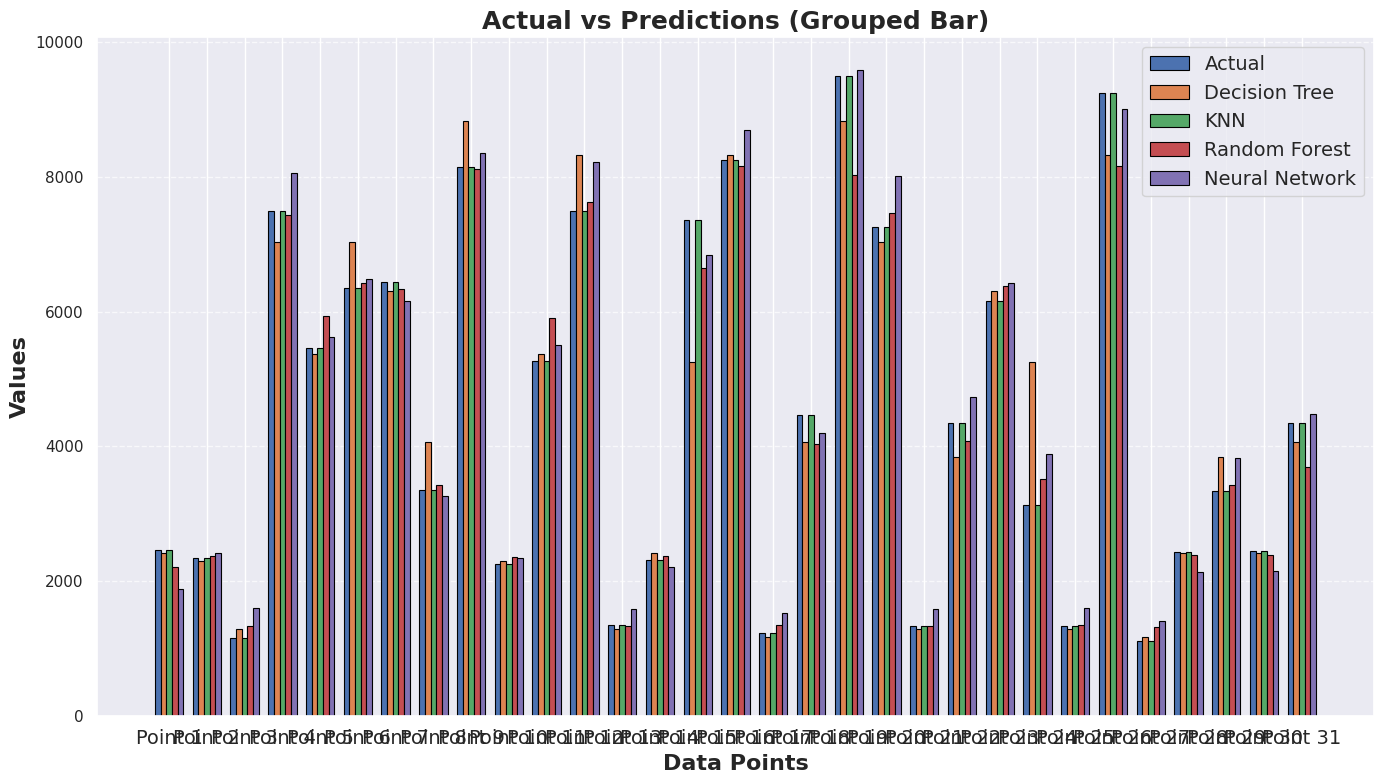

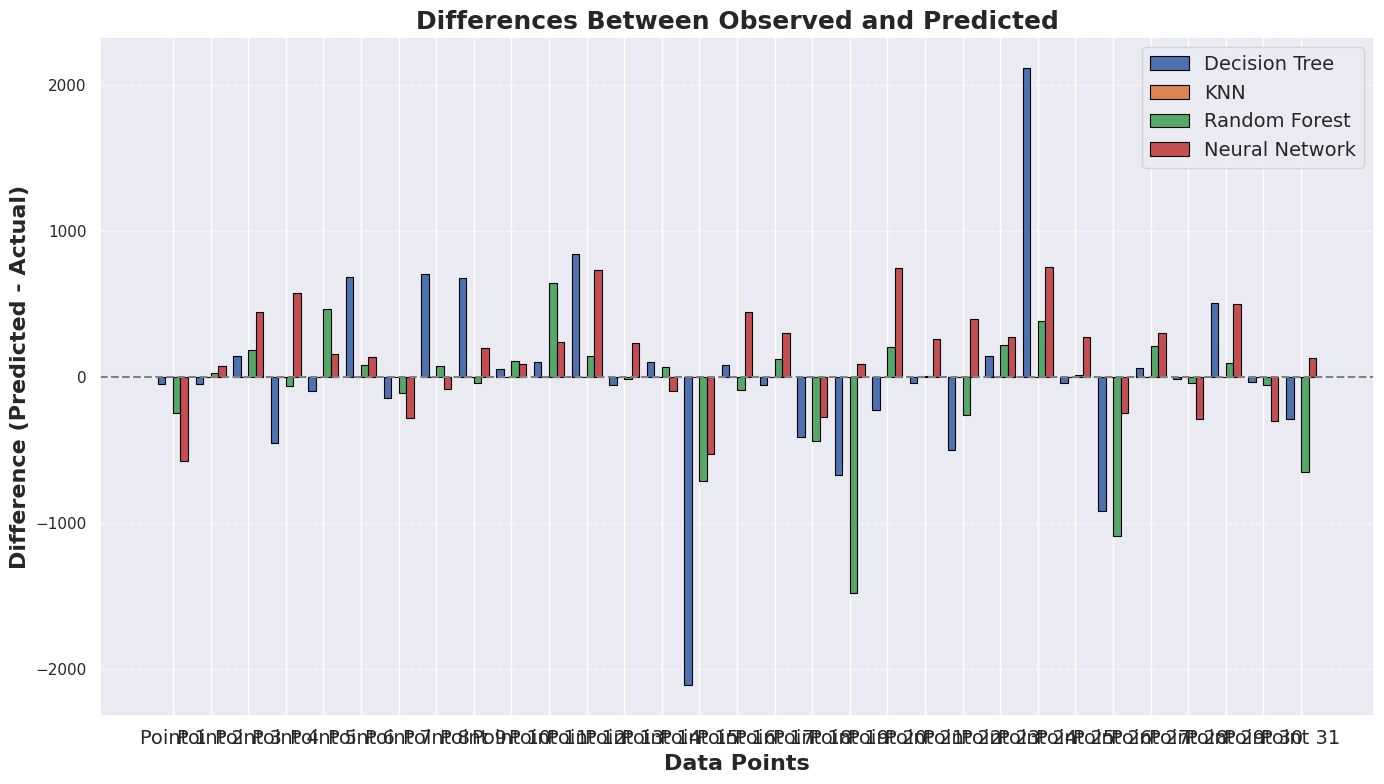

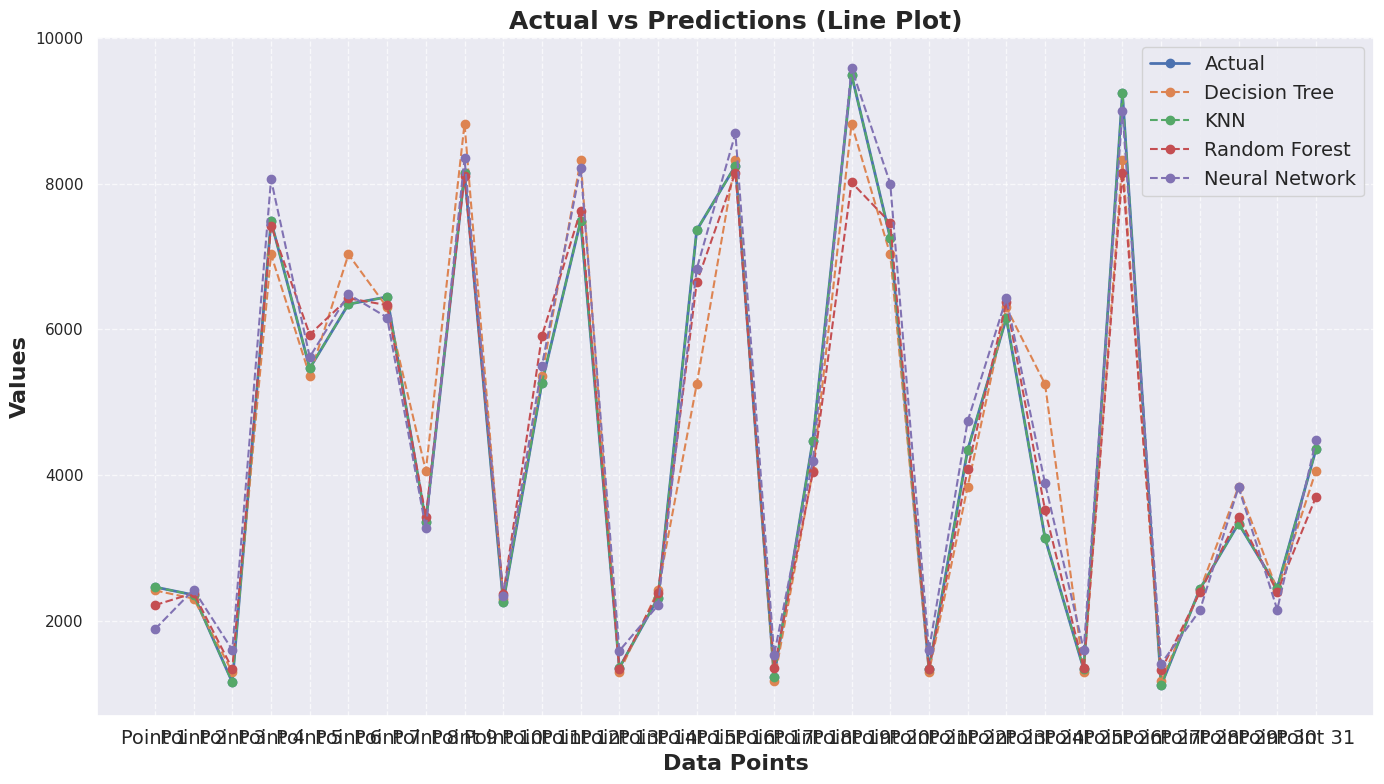

In [ ]:
# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Select relevant features for X and encode the target variable y
X = df[['Lat', 'Lon', 'Wind Speed', 'P Drop']]
y = df['Map Number']

# The entire dataset is used for training
X_train = X
y_train = y

# ---------------------------
# Apply Best Parameters and Fit Models
# ---------------------------

# 1. Decision Tree Regressor
best_dt = DecisionTreeRegressor(
    splitter='random',
    min_samples_split=4,
    min_samples_leaf=2,
    max_features=None,
    max_depth=34,
    criterion='poisson',
    random_state=42
)
best_dt.fit(X_train, y_train)
dt_predictions_train = np.round(best_dt.predict(X_train)).astype(int)

# 2. KNN Regressor
best_knn = KNeighborsRegressor(
    weights='uniform',
    p=1,
    n_neighbors=1,
    leaf_size=50,
    algorithm='brute'
)
best_knn.fit(X_train, y_train)
knn_predictions_train = np.round(best_knn.predict(X_train)).astype(int)

# 3. Random Forest Regressor
best_rf = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=7,
    min_samples_leaf=3,
    max_features=None,
    max_depth=10,
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_predictions_train = np.round(best_rf.predict(X_train)).astype(int)

# 4. Custom Neural Network Regressor
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=5, hidden_units=256, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=200, batch_size=8):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X_train.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

best_nn = CustomKerasRegressor()
best_nn.fit(X_train, y_train)
nn_predictions_train = np.round(best_nn.predict(X_train)).astype(int)

# Combine Predictions into DataFrame
results_table = pd.DataFrame({
    'Actual': y_train.values,
    'Decision Tree': dt_predictions_train,
    'KNN': knn_predictions_train,
    'Random Forest': rf_predictions_train,
    'Neural Network': nn_predictions_train
})
print("Combined Results Table (Training Data):")
print(results_table)

# ---------------------------
# Plotting Results
# ---------------------------

# 1. Grouped Bar Plot
def plot_grouped_bar(y_train, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Actual', 'Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    predictions = [y_train, dt_preds, knn_preds, rf_preds, nn_preds]

    indices = np.arange(len(y_train))
    width = 0.15  # Adjusted width for multiple bars

    plt.figure(figsize=(14, 8))
    for i, (model, pred) in enumerate(zip(models, predictions)):
        plt.bar(indices + i * width, pred, width, label=model, edgecolor='black', linewidth=0.8)

    plt.xlabel('Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Grouped Bar)', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 2), [f'Point {i+1}' for i in range(len(y_train))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(y_train.values, dt_predictions_train, knn_predictions_train, rf_predictions_train, nn_predictions_train)

# 2. Differences Between Observed and Predictions
def plot_difference_bar(y_train, dt_preds, knn_preds, rf_preds, nn_preds):
    models = ['Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
    differences = [
        np.array(dt_preds) - np.array(y_train),
        np.array(knn_preds) - np.array(y_train),
        np.array(rf_preds) - np.array(y_train),
        np.array(nn_preds) - np.array(y_train),
    ]

    indices = np.arange(len(y_train))
    width = 0.2  # Adjusted width for difference plot

    plt.figure(figsize=(14, 8))
    for i, (model, diff) in enumerate(zip(models, differences)):
        plt.bar(indices + i * width, diff, width, label=model, edgecolor='black', linewidth=0.8)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Difference (Predicted - Actual)', fontsize=16, fontweight='bold')
    plt.title('Differences Between Observed and Predicted', fontsize=18, fontweight='bold')
    plt.xticks(indices + (width * 1.5), [f'Point {i+1}' for i in range(len(y_train))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_difference_bar(y_train.values, dt_predictions_train, knn_predictions_train, rf_predictions_train, nn_predictions_train)

# 3. Line Plot for Predictions
def plot_line_predictions(y_train, dt_preds, knn_preds, rf_preds, nn_preds):
    plt.figure(figsize=(14, 8))
    plt.plot(y_train, label='Actual', marker='o', linewidth=2)
    plt.plot(dt_preds, label='Decision Tree', marker='o', linestyle='--')
    plt.plot(knn_preds, label='KNN', marker='o', linestyle='--')
    plt.plot(rf_preds, label='Random Forest', marker='o', linestyle='--')
    plt.plot(nn_preds, label='Neural Network', marker='o', linestyle='--')

    plt.xlabel('Data Points', fontsize=16, fontweight='bold')
    plt.ylabel('Values', fontsize=16, fontweight='bold')
    plt.title('Actual vs Predictions (Line Plot)', fontsize=18, fontweight='bold')
    plt.xticks(range(len(y_train)), [f'Point {i+1}' for i in range(len(y_train))], fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_line_predictions(y_train.values, dt_predictions_train, knn_predictions_train, rf_predictions_train, nn_predictions_train)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Assuming df is already loaded
X = df[['Lat', 'Lon', 'Wind Speed', 'P Drop']]
y = df['Map Number']

# Split the dataset into train and test sets
np.random.seed(42)
test_indices = np.random.choice(df.index, size=5, replace=False)  # Randomly select 5 indices
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# ---------------------------
# Decision Tree Regressor (DTR)
# ---------------------------
dt_param_dist = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, *range(3, 51)],
    'min_samples_split': range(2, 50),
    'min_samples_leaf': range(1, 20),
    'max_features': ['sqrt', 'log2', None],
}

dt = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_dt.fit(X_train, y_train)
best_dt = random_search_dt.best_estimator_
print("Best Parameters for Decision Tree Regressor:", random_search_dt.best_params_)
joblib.dump(best_dt, 'best_decision_tree_regressor.pkl')

# ---------------------------
# Random Forest Regressor (RFR)
# ---------------------------
rf_param_dist = {
    'n_estimators': range(50, 1001, 50),
    'max_depth': [None, *range(5, 51)],
    'min_samples_split': range(2, 30),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest Regressor:", random_search_rf.best_params_)
joblib.dump(best_rf, 'best_random_forest_regressor.pkl')

# ---------------------------
# KNN Regressor
# ---------------------------
knn_param_dist = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 101, 10),
    'p': [1, 2],
}

knn = KNeighborsRegressor()
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_
print("Best Parameters for KNN Regressor:", random_search_knn.best_params_)
joblib.dump(best_knn, 'best_knn_regressor.pkl')

# ---------------------------
# Generate Predictions for Train and Test Sets
# ---------------------------

# Decision Tree Predictions
dt_predictions_train = np.round(best_dt.predict(X_train)).astype(int)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)

# Random Forest Predictions
rf_predictions_train = np.round(best_rf.predict(X_train)).astype(int)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)

# KNN Predictions
knn_predictions_train = np.round(best_knn.predict(X_train)).astype(int)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# ---------------------------
# Create Results Tables
# ---------------------------

# Training Set Results
train_results_table = pd.DataFrame({
    'Actual': y_train.values,
    'Decision Tree': dt_predictions_train,
    'Random Forest': rf_predictions_train,
    'KNN': knn_predictions_train
})
print("Training Set Results:")
print(train_results_table)

# Save Training Results to CSV
train_results_table.to_csv('train_results_table.csv', index=False)

# Testing Set Results
test_results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Decision Tree': dt_predictions_test,
    'Random Forest': rf_predictions_test,
    'KNN': knn_predictions_test
})
print("\nTesting Set Results:")
print(test_results_table)

# Save Testing Results to CSV
test_results_table.to_csv('test_results_table.csv', index=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters for Decision Tree Regressor: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 13, 'criterion': 'squared_error'}
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters for Random Forest Regressor: {'n_estimators': 1000, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [ 0.78877694         nan  0.17021671  0.80950161         nan         nan
         nan         nan  0.35316823         nan         nan         nan
         nan         nan         nan  0.77502886         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan -0.02078907
  0.7780042   0.74009854         nan  0.78729747  0.78122764  0.58692656
         nan         nan         nan  0.79208609  0.78877694         nan
         nan         nan         nan         nan  0.6703167          nan
         nan  0.73017709         nan  0.78863938         nan         nan
         nan         nan  0.35316823  0.35316823  0.50836348  0.11324921
         nan  0.70348576  0.70348576         nan         nan  0.58692656
  0.5873744   0.79201024         nan         nan  0.1702

Best Parameters for KNN Regressor: {'weights': 'uniform', 'p': 2, 'n_neighbors': 4, 'leaf_size': 30, 'algorithm': 'kd_tree'}
Training Set Results:
    Actual  Decision Tree  Random Forest   KNN
0     2462           2367           2218  1575
1     2353           2367           2370  2343
2     1153           1252           1384  1292
3     7487           8057           7289  7584
4     5465           5936           6071  5380
5     6346           5936           6476  6103
6     6446           5936           6454  5833
7     3353           3846           3236  3830
8     2253           2367           2374  2343
9     5265           5936           6026  5380
10    7489           8057           7526  8431
11    1352           1252           1397  1292
12    2313           2367           2359  2088
13    7363           8057           6578  3830
14    1232           1252           1389  1545
15    9499           8057           7971  8431
16    7257           8057           7319  7584
17    1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib

# ---------------------------
# Step 1: Data Preparation
# ---------------------------
# Assuming df is already loaded
X = df[['Lat', 'Lon', 'Wind Speed', 'P Drop']]
y = df['Map Number']

# Using the entire dataset for training
X_train = X
y_train = y

# Placeholder for test set if applicable
X_test = X.copy()  # Replace with actual test data if available
y_test = y.copy()  # Replace with actual test labels if available

# ---------------------------
# Decision Tree Regressor (DTR)
# ---------------------------
dt_param_dist = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, *range(3, 51)],
    'min_samples_split': range(2, 50),
    'min_samples_leaf': range(1, 20),
    'max_features': ['sqrt', 'log2', None],
}

dt = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_dt.fit(X_train, y_train)
best_dt = random_search_dt.best_estimator_
print("Best Parameters for Decision Tree Regressor:", random_search_dt.best_params_)
joblib.dump(best_dt, 'best_decision_tree_regressor.pkl')

# ---------------------------
# Random Forest Regressor (RFR)
# ---------------------------
rf_param_dist = {
    'n_estimators': range(50, 1001, 50),
    'max_depth': [None, *range(5, 51)],
    'min_samples_split': range(2, 30),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest Regressor:", random_search_rf.best_params_)
joblib.dump(best_rf, 'best_random_forest_regressor.pkl')

# ---------------------------
# KNN Regressor
# ---------------------------
knn_param_dist = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 101, 10),
    'p': [1, 2],
}

knn = KNeighborsRegressor()
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_
print("Best Parameters for KNN Regressor:", random_search_knn.best_params_)
joblib.dump(best_knn, 'best_knn_regressor.pkl')

# ---------------------------
# Generate Predictions for Train and Test Sets
# ---------------------------

# Decision Tree Predictions
dt_predictions_train = np.round(best_dt.predict(X_train)).astype(int)
dt_predictions_test = np.round(best_dt.predict(X_test)).astype(int)

# Random Forest Predictions
rf_predictions_train = np.round(best_rf.predict(X_train)).astype(int)
rf_predictions_test = np.round(best_rf.predict(X_test)).astype(int)

# KNN Predictions
knn_predictions_train = np.round(best_knn.predict(X_train)).astype(int)
knn_predictions_test = np.round(best_knn.predict(X_test)).astype(int)

# ---------------------------
# Create Results Tables
# ---------------------------

# Training Set Results
train_results_table = pd.DataFrame({
    'Actual': y_train.values,
    'Decision Tree': dt_predictions_train,
    'Random Forest': rf_predictions_train,
    'KNN': knn_predictions_train
})
print("Training Set Results:")
print(train_results_table)

# Save Training Results to CSV
train_results_table.to_csv('train_results_table.csv', index=False)

# Testing Set Results
test_results_table = pd.DataFrame({
    'Actual': y_test.values,
    'Decision Tree': dt_predictions_test,
    'Random Forest': rf_predictions_test,
    'KNN': knn_predictions_test
})
print("\nTesting Set Results:")
print(test_results_table)

# Save Testing Results to CSV
test_results_table.to_csv('test_results_table.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

# Dataset 1: Cyclone data
cyclone_data = {
    "Storm Year/Name": [
        "07.05.1996", "27.10.1996", "04.08.1997", "15.05.1997", "23.09.1997", "19.11.1998",
        "17.05.1998", "25.10.2000", "26.11.2000", "11.05.2002", "10.11.2002", "16.05.2004",
        "07.10.2004", "15.12.2005", "01.10.2005", "25.04.2006", "03.05.2007", "13.05.2007",
        "Sidr (15/11/2007)", "27.04.2008", "16.06.2008", "25.10.2008", "Aila (26/05/2009)", "03.09.2009",
        "07.10.2010", "20.10.2010", "02.02.2011", "19.10.2011", "16.06.2011", "10.10.2012", "Mahasen (13-16/05/2013)"
    ],
    "Maximum Wind (kph)": [
        56, 56, 46, 167, 102, 120, 111, 65, 189, 56, 102, 167, 46, 56, 167, 185, 46, 83, 222, 167, 46, 83, 120,
        74, 46, 194, 46, 56, 65, 56, 83
    ],
    "Pressure Drop (Hpa)": [
        4, 6, 4, 42, 16, 24, 18, 8, 52, 6, 15, 90, 4, 5, 8, 52, 4, 10, 66, 40, 4, 14, 18, 10, 4, 52, 3, 5, 12, 5, 1
    ],
    "Maximum Inundation Depth (m)": [
        3.44, 2.27, 2.9, 4.24, 3.1, 2.35, 2.43, 2.27, 2.07, 2.55, 3.27, 4.43, 2.52, 0.46, 3.2, 2.15, 1.66, 3.87,
        4.87, 2.98, 1.89, 2.47, 2.66, 1.69, 1.83, 2.18, 0.61, 1.98, 1.61, 2.92, 2.85
    ],
    "Map Number": [
        2462, 2353, 1153, 7487, 5465, 6346, 6446, 3353, 8148, 2253, 5265, 7489, 1352, 2313, 7363, 8248, 1232, 4474,
        9499, 7257, 1332, 4345, 6156, 3134, 1332, 9248, 1111, 2433, 3334, 2453, 4351
    ]
}

cyclone_df = pd.DataFrame(cyclone_data)

# Dataset 2: Geographical data
geo_data = {
    "Lat": [21.5, 22, 21.8, 21.8, 22, 22, 21.9, 22.5, 11.5, 16, 21.5, 20.5, 24, 12.6, 21.4, 18, 16, 21.2, 21.5, 16, 22, 21.5, 22, 21.6, 22, 20, 6.5, 21.2, 21.8, 22.5, 22.6],
    "Lon": [92.5, 89.5, 88.9, 91.5, 91, 89, 91.4, 89, 80, 96.5, 88.5, 92, 90, 85.5, 87.9, 95, 94, 92.2, 89.8, 94.3, 89.5, 89.5, 88, 88.2, 88.5, 93.5, 82.5, 92.1, 89, 91.3, 91.1],
    "Wind Speed": [30, 30, 25, 90, 55, 65, 60, 35, 102, 30, 55, 90, 25, 30, 90, 100, 25, 45, 115, 90, 25, 45, 65, 40, 25, 105, 25, 30, 35, 30, 45],
    "P Drop": [400, 600, 400, 4200, 1600, 2400, 1800, 800, 5200, 600, 1500, 9000, 400, 500, 800, 5200, 400, 1000, 6600, 4000, 400, 1400, 1800, 1000, 400, 5200, 300, 500, 1200, 500, 100]
}

geo_df = pd.DataFrame(geo_data)

# Adjust indices for a seamless merge
cyclone_df = cyclone_df.reset_index(drop=True)
geo_df = geo_df.reset_index(drop=True)

# Merge both datasets column-wise
final_df = pd.concat([cyclone_df, geo_df], axis=1)

final_df

Storm Year/Name  Maximum Wind (kph)  Pressure Drop (Hpa)  \
0                07.05.1996                  56                    4   
1                27.10.1996                  56                    6   
2                04.08.1997                  46                    4   
3                15.05.1997                 167                   42   
4                23.09.1997                 102                   16   
5                19.11.1998                 120                   24   
6                17.05.1998                 111                   18   
7                25.10.2000                  65                    8   
8                26.11.2000                 189                   52   
9                11.05.2002                  56                    6   
10               10.11.2002                 102                   15   
11               16.05.2004                 167                   90   
12               07.10.2004                  46                    4   
13               15.12.2005                  56                    5   
14               01.10.2005                 167                    8   
15               25.04.2006                 185                   52   
16               03.05.2007                  46                    4   
17               13.05.2007                  83                   10   
18        Sidr (15/11/2007)                 222                   66   
19               27.04.2008                 167                   40   
20               16.06.2008                  46                    4   
21               25.10.2008                  83                   14   
22        Aila (26/05/2009)                 120                   18   
23               03.09.2009                  74                   10   
24               07.10.2010                  46                    4   
25               20.10.2010                 194                   52   
26               02.02.2011                  46                    3   
27               19.10.2011                  56                    5   
28               16.06.2011                  65                   12   
29               10.10.2012                  56                    5   
30  Mahasen (13-16/05/2013)                  83                    1   

    Maximum Inundation Depth (m)  Map Number   Lat   Lon  Wind Speed  P Drop  
0                           3.44        2462  21.5  92.5          30     400  
1                           2.27        2353  22.0  89.5          30     600  
2                           2.90        1153  21.8  88.9          25     400  
3                           4.24        7487  21.8  91.5          90    4200  
4                           3.10        5465  22.0  91.0          55    1600  
5                           2.35        6346  22.0  89.0          65    2400  
6                           2.43        6446  21.9  91.4          60    1800  
7                           2.27        3353  22.5  89.0          35     800  
8                           2.07        8148  11.5  80.0         102    5200  
9                           2.55        2253  16.0  96.5          30     600  
10                          3.27        5265  21.5  88.5          55    1500  
11                          4.43        7489  20.5  92.0          90    9000  
12                          2.52        1352  24.0  90.0          25     400  
13                          0.46        2313  12.6  85.5          30     500  
14                          3.20        7363  21.4  87.9          90     800  
15                          2.15        8248  18.0  95.0         100    5200  
16                          1.66        1232  16.0  94.0          25     400  
17                          3.87        4474  21.2  92.2          45    1000  
18                          4.87        9499  21.5  89.8         115    6600  
19                          2.98        7257  16.0  94.3          90    4000  
20                          1.89        1332  22

In [ ]:
import pandas as pd

# Define the thresholds for grouping
def assign_wind_speed_group(speed):
    if 22 <= speed <= 27:
        return 1
    elif 28 <= speed <= 33:
        return 2
    elif 34 <= speed <= 40:
        return 3
    elif 41 <= speed <= 47:
        return 4
    elif 48 <= speed <= 55:
        return 5
    elif 56 <= speed <= 65:
        return 6
    elif 66 <= speed <= 90:
        return 7
    elif 91 <= speed <= 119:
        return 8
    elif speed >= 120:
        return 9
    return None

def assign_pressure_drop_group(pressure):
    if 1 <= pressure <= 3:
        return 1
    elif 3 < pressure <= 4.5:
        return 2
    elif 4.5 < pressure <= 8.5:
        return 3
    elif 8.5 < pressure <= 12:
        return 4
    elif 13 <= pressure <= 16:
        return 5
    elif 16 < pressure <= 33:
        return 6
    elif 34 < pressure <= 50:
        return 7
    elif 51 < pressure <= 65.6:
        return 8
    elif pressure > 65.6:
        return 9
    return None

def assign_inundation_depth_group(depth):
    if depth < 0.5:
        return 1
    elif 0.6 <= depth <= 1:
        return 2
    elif 1.1 <= depth <= 1.5:
        return 3
    elif 1.6 <= depth <= 2:
        return 4
    elif 2.1 <= depth <= 2.5:
        return 5
    elif 2.6 <= depth <= 3:
        return 6
    elif 3.6 <= depth <= 4:
        return 7
    elif 4.1 <= depth <= 4.5:
        return 8
    elif 4.6 <= depth <= 5:
        return 9
    return None

# Apply grouping logic
final_df['Wind Speed Group'] = final_df['Maximum Wind (kph)'].apply(assign_wind_speed_group)
final_df['Pressure Drop Group'] = final_df['Pressure Drop (Hpa)'].apply(assign_pressure_drop_group)
final_df['Inundation Depth Group'] = final_df['Maximum Inundation Depth (m)'].apply(assign_inundation_depth_group)

final_df

Storm Year/Name  Maximum Wind (kph)  Pressure Drop (Hpa)  \
0                07.05.1996                  56                    4   
1                27.10.1996                  56                    6   
2                04.08.1997                  46                    4   
3                15.05.1997                 167                   42   
4                23.09.1997                 102                   16   
5                19.11.1998                 120                   24   
6                17.05.1998                 111                   18   
7                25.10.2000                  65                    8   
8                26.11.2000                 189                   52   
9                11.05.2002                  56                    6   
10               10.11.2002                 102                   15   
11               16.05.2004                 167                   90   
12               07.10.2004                  46                    4   
13               15.12.2005                  56                    5   
14               01.10.2005                 167                    8   
15               25.04.2006                 185                   52   
16               03.05.2007                  46                    4   
17               13.05.2007                  83                   10   
18        Sidr (15/11/2007)                 222                   66   
19               27.04.2008                 167                   40   
20               16.06.2008                  46                    4   
21               25.10.2008                  83                   14   
22        Aila (26/05/2009)                 120                   18   
23               03.09.2009                  74                   10   
24               07.10.2010                  46                    4   
25               20.10.2010                 194                   52   
26               02.02.2011                  46                    3   
27               19.10.2011                  56                    5   
28               16.06.2011                  65                   12   
29               10.10.2012                  56                    5   
30  Mahasen (13-16/05/2013)                  83                    1   

    Maximum Inundation Depth (m)  Map Number   Lat   Lon  Wind Speed  P Drop  \
0                           3.44        2462  21.5  92.5          30     400   
1                           2.27        2353  22.0  89.5          30     600   
2                           2.90        1153  21.8  88.9          25     400   
3                           4.24        7487  21.8  91.5          90    4200   
4                           3.10        5465  22.0  91.0          55    1600   
5                           2.35        6346  22.0  89.0          65    2400   
6                           2.43        6446  21.9  91.4          60    1800   
7                           2.27        3353  22.5  89.0          35     800   
8                           2.07        8148  11.5  80.0         102    5200   
9                           2.55        2253  16.0  96.5          30     600   
10                          3.27        5265  21.5  88.5          55    1500   
11                          4.43        7489  20.5  92.0          90    9000   
12                          2.52        1352  24.0  90.0          25     400   
13                          0.46        2313  12.6  85.5          30     500   
14                          3.20        7363  21.4  87.9          90     800   
15                          2.15        8248  18.0  95.0         100    5200   
16                          1.66        1232  16.0  94.0          25     400   
17                          3.87        4474  21.2  92.2          45    1000   
18                          4.87        9499  21.5  89.8         115    6600   
19                          2.98        7257  16.0  94.3          90    4000   
20                         

In [ ]:
# Impute missing values
# For numerical columns, fill NaN with the mean value of the respective column
final_df.fillna(final_df.mean(numeric_only=True), inplace=True)

# For categorical columns (if any), fill NaN with the most frequent value
for column in final_df.select_dtypes(include=['object']).columns:
    final_df[column].fillna(final_df[column].mode()[0], inplace=True)

# Check the DataFrame to ensure all NaN values are filled
print(final_df.isnull().sum())  # This should return 0 for all columns


Storm Year/Name                 0
Maximum Wind (kph)              0
Pressure Drop (Hpa)             0
Maximum Inundation Depth (m)    0
Map Number                      0
Lat                             0
Lon                             0
Wind Speed                      0
P Drop                          0
Wind Speed Group                0
Pressure Drop Group             0
Inundation Depth Group          0
dtype: int64


<ipython-input-50-dcd6cbacf011>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[column].fillna(final_df[column].mode()[0], inplace=True)


In [ ]:
final_df = final_df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)', 'Map Number', 'Lat', 'Lon', 'Wind Speed', 'P Drop', 'Wind Speed Group', 'Pressure Drop Group', 'Inundation Depth Group']]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Maximum Wind (kph)            31 non-null     int64  
 1   Pressure Drop (Hpa)           31 non-null     int64  
 2   Maximum Inundation Depth (m)  31 non-null     float64
 3   Map Number                    31 non-null     int64  
 4   Lat                           31 non-null     float64
 5   Lon                           31 non-null     float64
 6   Wind Speed                    31 non-null     int64  
 7   P Drop                        31 non-null     int64  
 8   Wind Speed Group              31 non-null     int64  
 9   Pressure Drop Group           31 non-null     int64  
 10  Inundation Depth Group        31 non-null     float64
dtypes: float64(4), int64(7)
memory usage: 2.8 KB


In [ ]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor

# # Use your DataFrame, final_df
# # Assuming final_df is already loaded
# X = final_df.drop(columns=["Map Number"])
# y = final_df["Map Number"]

# # Initialize models
# dt_model = DecisionTreeRegressor(random_state=42)
# knn_model = KNeighborsRegressor(n_neighbors=2)  # Default KNN parameters
# rf_model = RandomForestRegressor(random_state=42, n_estimators=5)

# # Train models
# dt_model.fit(X, y)
# knn_model.fit(X, y)
# rf_model.fit(X, y)

# # Predictions
# dt_predictions = dt_model.predict(X)
# knn_predictions = knn_model.predict(X)
# rf_predictions = rf_model.predict(X)

# # Combine results into a DataFrame
# results_df = pd.DataFrame({
#     "Actual": y,
#     "DT_Predicted": dt_predictions.round(),
#     "KNN_Predicted": knn_predictions.round(),
#     "RF_Predicted": rf_predictions.round()
# })

# # Display the table
# print("Actual vs Modeled Values:")
# results_df



import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Use your DataFrame, final_df
# Assuming final_df is already loaded
X = final_df.drop(columns=["Map Number"])
y = final_df["Map Number"]

# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=2)  # Default KNN parameters
rf_model = RandomForestRegressor(random_state=42, n_estimators=5)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Example architecture
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Train models
dt_model.fit(X, y)
knn_model.fit(X, y)
rf_model.fit(X, y)
mlp_model.fit(X, y)

# Predictions
dt_predictions = dt_model.predict(X)
knn_predictions = knn_model.predict(X)
rf_predictions = rf_model.predict(X)
mlp_predictions = mlp_model.predict(X)

# Combine results into a DataFrame
results_df = pd.DataFrame({
    "Actual": y,
    "DT_Predicted": dt_predictions.round(),
    "KNN_Predicted": knn_predictions.round(),
    "RF_Predicted": rf_predictions.round(),
    "MLP_Predicted": mlp_predictions.round()
})

# Display the table
print("Actual vs Modeled Values:")
print(results_df)

# Save results to CSV
results_df.to_csv('final_results_with_mlp.csv', index=False)

Actual vs Modeled Values:
    Actual  DT_Predicted  KNN_Predicted  RF_Predicted  MLP_Predicted
0     2462        2462.0         1897.0        1732.0         2642.0
1     2353        2353.0         2303.0        2631.0         2731.0
2     1153        1153.0         1242.0        1244.0         2257.0
3     7487        7487.0         7372.0        7441.0         7631.0
4     5465        5465.0         5365.0        5385.0         4866.0
5     6346        6346.0         6251.0        6528.0         5668.0
6     6446        6446.0         6301.0        6014.0         5285.0
7     3353        3353.0         5358.0        3349.0         3140.0
8     8148        8148.0         8198.0        7838.0         8427.0
9     2253        2253.0         2303.0        2371.0         2725.0
10    5265        5265.0         5365.0        5305.0         4817.0
11    7489        7489.0         8494.0        8243.0         7724.0
12    1352        1352.0         1342.0        1324.0         2265.0
13    23

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# ---------------------------
# Import Necessary Libraries
# ---------------------------
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib

# ---------------------------
# Data Preparation
# ---------------------------
# Assuming `df` is your DataFrame with the relevant data
X = final_df.drop(columns=["Map Number"])
y = final_df["Map Number"]

# Use the entire dataset for training
X_train = X
y_train = y

# ---------------------------
# Decision Tree Regressor (DTR)
# ---------------------------
dt_param_dist = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, *range(3, 51)],
    'min_samples_split': range(2, 50),
    'min_samples_leaf': range(1, 20),
    'max_features': ['sqrt', 'log2', None],
}

dt = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_dt.fit(X_train, y_train)
best_dt = random_search_dt.best_estimator_
print("Best Parameters for Decision Tree Regressor:", random_search_dt.best_params_)
joblib.dump(best_dt, 'best_decision_tree_regressor.pkl')

# ---------------------------
# Random Forest Regressor (RFR)
# ---------------------------
rf_param_dist = {
    'n_estimators': range(50, 1001, 50),
    'max_depth': [None, *range(5, 51)],
    'min_samples_split': range(2, 30),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest Regressor:", random_search_rf.best_params_)
joblib.dump(best_rf, 'best_random_forest_regressor.pkl')

# ---------------------------
# KNN Regressor
# ---------------------------
knn_param_dist = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 101, 10),
    'p': [1, 2],
}

knn = KNeighborsRegressor()
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=200, verbose=2, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_
print("Best Parameters for KNN Regressor:", random_search_knn.best_params_)
joblib.dump(best_knn, 'best_knn_regressor.pkl')

# ---------------------------
# Generate Predictions for Entire Dataset
# ---------------------------
dt_predictions = np.round(best_dt.predict(X_train)).astype(int)
rf_predictions = np.round(best_rf.predict(X_train)).astype(int)
knn_predictions = np.round(best_knn.predict(X_train)).astype(int)

# ---------------------------
# Create Results Table
# ---------------------------
results_table = pd.DataFrame({
    'Actual': y_train.values,
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
    'KNN': knn_predictions
})

print("Results Table:")
print(results_table)

# Save Results Table to CSV
results_table.to_csv('final_results_table.csv', index=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters for Decision Tree Regressor: {'splitter': 'random', 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'criterion': 'friedman_mse'}
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters for Random Forest Regressor: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 43, 'bootstrap': False}
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters for KNN Regressor: {'weights': 'uniform', 'p': 2, 'n_neighbors': 2, 'leaf_size': 100, 'algorithm': 'ball_tree'}
Results Table:
    Actual  Decision Tree  Random Forest   KNN
0     2462           2378           2459  1897
1     2353           2378           2357  2303
2     1153           1252           1289  1242
3     7487           7399           7449  7372
4     5465           5936           5490  5365
5     6346           5936 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [0.81393643        nan 0.42312092 0.8177522         nan 0.15711018
        nan        nan 0.53326442        nan        nan        nan
        nan 0.75474818        nan 0.77570151        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.20980166
 0.82722107 0.79373445        nan 0.79458351 0.77187602 0.68628981
        nan        nan 0.75931534 0.82238125 0.81393643        nan
        nan        nan        nan        nan 0.77074927        nan
        nan 0.78743046        nan 0.81607568        nan        nan
        nan        nan 0.53326442 0.53326442 0.63965262 0.35817786
        nan 0.78594763 0.78594763 0.1562927         nan 0.68628981
 0.68622925 0.80938023        nan        nan 0.42312092 0.78713806
 0.85242336 0.09254318 0.81675247 0.82722107        nan

In [ ]:
results_table

Actual  Decision Tree  Random Forest   KNN
0     2462           2378           2459  1897
1     2353           2378           2357  2303
2     1153           1252           1289  1242
3     7487           7399           7449  7372
4     5465           5936           5490  5365
5     6346           5936           6326  6251
6     6446           5936           6256  6301
7     3353           3832           3319  5358
8     8148           8786           8210  8198
9     2253           2378           2312  2303
10    5265           5936           5515  5365
11    7489           7399           7809  8494
12    1352           1252           1353  1342
13    2313           2378           2368  2373
14    7363           7399           6863  5358
15    8248           8786           8221  8748
16    1232           1252           1273  1282
17    4474           3832           4538  3804
18    9499           8786           9162  9374
19    7257           7399           7336  7372
20    1332           1252           1314  1332
21    4345           3832           4348  4805
22    6156           5936           6308  6301
23    3134           3832           3299  3804
24    1332           1252           1287  1332
25    9248           8786           9176  8748
26    1111           1252           1214  1172
27    2433           2378           2391  2443
28    3334           3832           3276  3234
29    2453           2378           2510  2443
30    4351           3832           4158  2731

In [ ]:
final_df

Maximum Wind (kph)  Pressure Drop (Hpa)  Maximum Inundation Depth (m)  \
0                   56                    4                          3.44   
1                   56                    6                          2.27   
2                   46                    4                          2.90   
3                  167                   42                          4.24   
4                  102                   16                          3.10   
5                  120                   24                          2.35   
6                  111                   18                          2.43   
7                   65                    8                          2.27   
8                  189                   52                          2.07   
9                   56                    6                          2.55   
10                 102                   15                          3.27   
11                 167                   90                          4.43   
12                  46                    4                          2.52   
13                  56                    5                          0.46   
14                 167                    8                          3.20   
15                 185                   52                          2.15   
16                  46                    4                          1.66   
17                  83                   10                          3.87   
18                 222                   66                          4.87   
19                 167                   40                          2.98   
20                  46                    4                          1.89   
21                  83                   14                          2.47   
22                 120                   18                          2.66   
23                  74                   10                          1.69   
24                  46                    4                          1.83   
25                 194                   52                          2.18   
26                  46                    3                          0.61   
27                  56                    5                          1.98   
28                  65                   12                          1.61   
29                  56                    5                          2.92   
30                  83                    1                          2.85   

    Map Number   Lat   Lon  Wind Speed  P Drop  Wind Speed Group  \
0         2462  21.5  92.5          30     400                 6   
1         2353  22.0  89.5          30     600                 6   
2         1153  21.8  88.9          25     400                 4   
3         7487  21.8  91.5          90    4200                 9   
4         5465  22.0  91.0          55    1600                 8   
5         6346  22.0  89.0          65    2400                 9   
6         6446  21.9  91.4          60    1800                 8   
7         3353  22.5  89.0          35     800                 6   
8         8148  11.5  80.0         102    5200                 9   
9         2253  16.0  96.5          30     600                 6   
10        5265  21.5  88.5          55    1500                 8   
11        7489  20.5  92.0          90    9000                 9   
12        1352  24.0  90.0          25     400                 4   
13        2313  12.6  85.5          30     500                 6   
14        7363  21.4  87.9          90     800                 9   
15        8248  18.0  95.0         100    5200                 9   
16        1232  16.0  94.0          25     400                 4   
17        4474  21.2  92.2          45    1000                 7   
18        9499  21.5  89.8         115    6600                 9   
19        7257  16.0  94.3          90    4000                 9   
20        1332  22.0  89.5          25     400                 4   
21        4345  21.5  89.5          45    1

#New

In [ ]:
import pandas as pd

# Data for the DataFrame
data = {
    "Storm Year/Name": [
        "07.05.1996", "27.10.1996", "04.08.1997", "15.05.1997", "23.09.1997", "19.11.1998",
        "17.05.1998", "25.10.2000", "26.11.2000", "11.05.2002", "10.11.2002", "16.05.2004",
        "07.10.2004", "15.12.2005", "01.10.2005", "25.04.2006", "03.05.2007", "13.05.2007",
        "Sidr (15/11/2007)", "27.04.2008", "16.06.2008", "25.10.2008", "Aila (26/05/2009)",
        "03.09.2009", "07.10.2010", "20.10.2010", "02.02.2011", "19.10.2011", "16.06.2011",
        "10.10.2012", "Mahasen (13-16/05/2013)"
    ],
    "Landfall": [
        "Cox's bazar", "West Bengal Bangladesh border", "West Bengal coast near Sagar Island",
        "Shitakundo/near Chittagong", "Crossing Hatia", "West of Chittagong",
        "Between Chittagong And Sitakundu", "Mongla", "Tamilnadu", "East of Yangon, Myanmar",
        "West Bengal south of Kolkata", "Myanmar north of Cox's Bazar", "Northern parts of Bangladesh",
        "South west and central part of BOB", "Bangladesh, near Sundarbans", "Arakan Coast of Myanmar",
        "Myanmar Arakan coast", "Close to south of Cox's Bazar", "Barguna", "Southwest of Myanmar",
        "Bangladesh coast", "Bangladesh 50 km west of Khepupara", "West Bengal coast", "West Bengal",
        "West Bengal and Bangladesh coast", "Kyaukphyu, Arakan, Myanmar", "Sri-Lankan Coast",
        "South of Cox's bazar", "West Bengal BD coast", "Hatia", "Coast between Chittagong and Feni"
    ],
    "Location to Central/Meghna Estuary": [
        "East of Meghna", "West of Meghna", "West of Bangladesh", "East of Meghna", "East of Meghna",
        "West of Meghna", "East of Meghna", "West of Meghna", "West of Bangladesh", "East of Bangladesh",
        "East of Bangladesh", "East of Meghna", "West of Meghna", "West of Meghna", "West of Meghna",
        "East of Bangladesh", "East of Bangladesh", "East of Meghna", "West of Meghna", "East of Bangladesh",
        "West of Meghna", "West of Meghna", "West of Bangladesh", "West of Bangladesh", "West of Meghna",
        "East of Bangladesh", "West of Bangladesh", "East of Meghna", "West of Meghna", "East of Meghna",
        "West of Meghna"
    ],
    "Maximum Wind (kph)": [
        56, 56, 46, 167, 102, 120, 111, 65, 189, 56, 102, 167, 46, 56, 167, 185, 46, 83, 222, 167, 46, 83, 120,
        74, 46, 194, 46, 56, 65, 56, 83
    ],
    "Pressure Drop (Hpa)": [
        4, 6, 4, 42, 16, 24, 18, 8, 52, 6, 15, 90, 4, 5, 8, 52, 4, 10, 66, 40, 4, 14, 18, 10, 4, 52, 3, 5, 12, 5, 1
    ],
    "Maximum Inundation Depth (m)": [
        3.44, 2.27, 2.9, 4.24, 3.1, 2.35, 2.43, 2.27, 2.07, 2.55, 3.27, 4.43, 2.52, 0.46, 3.2, 2.15, 1.66, 3.87,
        4.87, 2.98, 1.89, 2.47, 2.66, 1.69, 1.83, 2.18, 0.61, 1.98, 1.61, 2.92, 2.85
    ],
    "Inundation Map Number": [
        2462, 2353, 1153, 7487, 5465, 6346, 6446, 3353, 8148, 2253, 5265, 7489, 1352, 2313, 7363, 8248, 1232, 4474,
        9499, 7257, 1332, 4345, 6156, 3134, 1332, 9248, 1111, 2433, 3334, 2453, 4351
    ],
    "Lat": [
        21.5, 22.0, 21.8, 21.8, 22.0, 22.0, 21.9, 22.5, 11.5, 16.0, 21.5, 20.5, 24.0, 12.6, 21.4, 18.0, 16.0, 21.2,
        21.5, 16.0, 22.0, 21.5, 22.0, 21.6, 22.0, 20.0, 6.5, 21.2, 21.8, 22.5, 22.6
    ],
    "Lon": [
        92.5, 89.5, 88.9, 91.5, 91.0, 89.0, 91.4, 89.0, 80.0, 96.5, 88.5, 92.0, 90.0, 85.5, 87.9, 95.0, 94.0, 92.2,
        89.8, 94.3, 89.5, 89.5, 88.0, 88.2, 88.5, 93.5, 82.5, 92.1, 89.0, 91.3, 91.1
    ],
    "Wind Speed": [
        30, 30, 25, 90, 55, 65, 60, 35, 102, 30, 55, 90, 25, 30, 90, 100, 25, 45, 115, 90, 25, 45, 65, 40, 25, 105,
        25, 30, 35, 30, 45
    ],
    "P Drop": [
        400, 600, 400, 4200, 1600, 2400, 1800, 800, 5200, 600, 1500, 9000, 400, 500, 800, 5200, 400, 1000, 6600,
        4000, 400, 1400, 1800, 1000, 400, 5200, 300, 500, 1200, 500, 100
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

Storm Year/Name                             Landfall  \
0      07.05.1996                          Cox's bazar   
1      27.10.1996        West Bengal Bangladesh border   
2      04.08.1997  West Bengal coast near Sagar Island   
3      15.05.1997           Shitakundo/near Chittagong   
4      23.09.1997                       Crossing Hatia   

  Location to Central/Meghna Estuary  Maximum Wind (kph)  Pressure Drop (Hpa)  \
0                     East of Meghna                  56                    4   
1                     West of Meghna                  56                    6   
2                 West of Bangladesh                  46                    4   
3                     East of Meghna                 167                   42   
4                     East of Meghna                 102                   16   

   Maximum Inundation Depth (m)  Inundation Map Number   Lat   Lon  \
0                          3.44                   2462  21.5  92.5   
1                          2.27                   2353  22.0  89.5   
2                          2.90                   1153  21.8  88.9   
3                          4.24                   7487  21.8  91.5   
4                          3.10                   5465  22.0  91.0   

   Wind Speed  P Drop  
0          30     400  
1          30     600  
2          25     400  
3          90    4200  
4          55    1600

In [ ]:
print(list(df))

['Storm Year/Name', 'Landfall', 'Location to Central/Meghna Estuary', 'Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)', 'Inundation Map Number', 'Lat', 'Lon', 'Wind Speed', 'P Drop']


In [ ]:
df = df[['Maximum Wind (kph)', 'Pressure Drop (Hpa)', 'Maximum Inundation Depth (m)', 'Inundation Map Number', 'Lat', 'Lon', 'Wind Speed', 'P Drop']]

In [ ]:
df

Maximum Wind (kph)  Pressure Drop (Hpa)  Maximum Inundation Depth (m)  \
0                   56                    4                          3.44   
1                   56                    6                          2.27   
2                   46                    4                          2.90   
3                  167                   42                          4.24   
4                  102                   16                          3.10   
5                  120                   24                          2.35   
6                  111                   18                          2.43   
7                   65                    8                          2.27   
8                  189                   52                          2.07   
9                   56                    6                          2.55   
10                 102                   15                          3.27   
11                 167                   90                          4.43   
12                  46                    4                          2.52   
13                  56                    5                          0.46   
14                 167                    8                          3.20   
15                 185                   52                          2.15   
16                  46                    4                          1.66   
17                  83                   10                          3.87   
18                 222                   66                          4.87   
19                 167                   40                          2.98   
20                  46                    4                          1.89   
21                  83                   14                          2.47   
22                 120                   18                          2.66   
23                  74                   10                          1.69   
24                  46                    4                          1.83   
25                 194                   52                          2.18   
26                  46                    3                          0.61   
27                  56                    5                          1.98   
28                  65                   12                          1.61   
29                  56                    5                          2.92   
30                  83                    1                          2.85   

    Inundation Map Number   Lat   Lon  Wind Speed  P Drop  
0                    2462  21.5  92.5          30     400  
1                    2353  22.0  89.5          30     600  
2                    1153  21.8  88.9          25     400  
3                    7487  21.8  91.5          90    4200  
4                    5465  22.0  91.0          55    1600  
5                    6346  22.0  89.0          65    2400  
6                    6446  21.9  91.4          60    1800  
7                    3353  22.5  89.0          35     800  
8                    8148  11.5  80.0         102    5200  
9                    2253  16.0  96.5          30     600  
10                   5265  21.5  88.5          55    1500  
11                   7489  20.5  92.0          90    9000  
12                   1352  24.0  90.0          25     400  
13                   2313  12.6  85.5          30     500  
14                   7363  21.4  87.9          90     800  
15                   8248  18.0  95.0         100    5200  
16                   1232  16.0  94.0          25     400  
17                   4474  21.2  92.2          45    1000  
18                   9499  21.5  89.8         115    6600  
19                   7257  16.0  94.3          90    4000  
20                   1332  22.0  89.5          25     400  
21                   4345  21.5  89.5          45    1400  
22                   6156  22.0  88.0          65    1800  
23                   3134  21.6  88.2          40    1000  
24                   1332  22.0  88.5  

In [ ]:
# Add group columns based on thresholds
def assign_wind_speed_group(speed):
    if 22 <= speed <= 27:
        return 1
    elif 28 <= speed <= 33:
        return 2
    elif 34 <= speed <= 40:
        return 3
    elif 41 <= speed <= 47:
        return 4
    elif 48 <= speed <= 55:
        return 5
    elif 56 <= speed <= 65:
        return 6
    elif 66 <= speed <= 90:
        return 7
    elif 91 <= speed <= 119:
        return 8
    elif speed >= 120:
        return 9
    return None

def assign_inundation_group(depth):
    if depth < 0.5:
        return 1
    elif 0.6 <= depth <= 1.0:
        return 2
    elif 1.1 <= depth <= 1.5:
        return 3
    elif 1.6 <= depth <= 2.0:
        return 4
    elif 2.1 <= depth <= 2.5:
        return 5
    elif 2.6 <= depth <= 3.0:
        return 6
    elif 3.6 <= depth <= 4.0:
        return 7
    elif 4.1 <= depth <= 4.5:
        return 8
    elif 4.6 <= depth <= 5.0:
        return 9
    return None

def assign_pressure_drop_group(pressure):
    if 1 <= pressure <= 3:
        return 1
    elif 3 <= pressure <= 4.5:
        return 2
    elif 4.5 <= pressure <= 8.5:
        return 3
    elif 8.5 <= pressure <= 12:
        return 4
    elif 13 <= pressure <= 16:
        return 5
    elif 16 <= pressure <= 33:
        return 6
    elif 34 <= pressure <= 50:
        return 7
    elif 51 <= pressure <= 65.6:
        return 8
    elif pressure > 65.6:
        return 9
    return None

df['Wind Speed Group'] = df['Maximum Wind (kph)'].apply(assign_wind_speed_group)
df['Inundation Depth Group'] = df['Maximum Inundation Depth (m)'].apply(assign_inundation_group)
df['Pressure Drop Group'] = df['Pressure Drop (Hpa)'].apply(assign_pressure_drop_group)


<ipython-input-7-57fb429a3386>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind Speed Group'] = df['Maximum Wind (kph)'].apply(assign_wind_speed_group)
<ipython-input-7-57fb429a3386>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inundation Depth Group'] = df['Maximum Inundation Depth (m)'].apply(assign_inundation_group)


In [ ]:
df

Maximum Wind (kph)  Pressure Drop (Hpa)  Maximum Inundation Depth (m)  \
0                   56                    4                          3.44   
1                   56                    6                          2.27   
2                   46                    4                          2.90   
3                  167                   42                          4.24   
4                  102                   16                          3.10   
5                  120                   24                          2.35   
6                  111                   18                          2.43   
7                   65                    8                          2.27   
8                  189                   52                          2.07   
9                   56                    6                          2.55   
10                 102                   15                          3.27   
11                 167                   90                          4.43   
12                  46                    4                          2.52   
13                  56                    5                          0.46   
14                 167                    8                          3.20   
15                 185                   52                          2.15   
16                  46                    4                          1.66   
17                  83                   10                          3.87   
18                 222                   66                          4.87   
19                 167                   40                          2.98   
20                  46                    4                          1.89   
21                  83                   14                          2.47   
22                 120                   18                          2.66   
23                  74                   10                          1.69   
24                  46                    4                          1.83   
25                 194                   52                          2.18   
26                  46                    3                          0.61   
27                  56                    5                          1.98   
28                  65                   12                          1.61   
29                  56                    5                          2.92   
30                  83                    1                          2.85   

    Inundation Map Number   Lat   Lon  Wind Speed  P Drop  Wind Speed Group  \
0                    2462  21.5  92.5          30     400                 6   
1                    2353  22.0  89.5          30     600                 6   
2                    1153  21.8  88.9          25     400                 4   
3                    7487  21.8  91.5          90    4200                 9   
4                    5465  22.0  91.0          55    1600                 8   
5                    6346  22.0  89.0          65    2400                 9   
6                    6446  21.9  91.4          60    1800                 8   
7                    3353  22.5  89.0          35     800                 6   
8                    8148  11.5  80.0         102    5200                 9   
9                    2253  16.0  96.5          30     600                 6   
10                   5265  21.5  88.5          55    1500                 8   
11                   7489  20.5  92.0          90    9000                 9   
12                   1352  24.0  90.0          25     400                 4   
13                   2313  12.6  85.5          30     500                 6   
14                   7363  21.4  87.9          90     800                 9   
15                   8248  18.0  95.0         100    5200                 9   
16                   1232  16.0  94.0          25     400                 4   
17                   4474  21.2  92.2          45    1000                 7   
18                   9499  21.5  89.8 

In [ ]:
df = df.interpolate(method='nearest', limit_direction='both', axis=0)
df

df.loc[0, 'Inundation Depth Group'] = 6

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming df is already loaded and cleaned, with NaN values imputed
# Drop the target column from features and set the target column
X = df.drop(columns=['Inundation Map Number'])
y = df['Inundation Map Number']

# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)  # Default KNN parameters
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train models
dt_model.fit(X, y)
knn_model.fit(X, y)
rf_model.fit(X, y)

# Predictions
dt_predictions = dt_model.predict(X)
knn_predictions = knn_model.predict(X)
rf_predictions = rf_model.predict(X)

# Combine results into a DataFrame
results_df = pd.DataFrame({
    'Actual': y,
    'DT_Predicted': dt_predictions.round(),
    'KNN_Predicted': knn_predictions.round(),
    'RF_Predicted': rf_predictions.round()
})

# Display the table
print("Actual vs Modeled Values:")
results_df

Actual vs Modeled Values:


Actual  DT_Predicted  KNN_Predicted  RF_Predicted
0     2462        2462.0         1526.0        2264.0
1     2353        2353.0         2361.0        2369.0
2     1153        1153.0         1280.0        1224.0
3     7487        7487.0         8078.0        7467.0
4     5465        5465.0         5535.0        5490.0
5     6346        6346.0         5936.0        6246.0
6     6446        6446.0         5535.0        6137.0
7     3353        3353.0         3691.0        3284.0
8     8148        8148.0         8078.0        8261.0
9     2253        2253.0         2361.0        2312.0
10    5265        5265.0         5535.0        5391.0
11    7489        7489.0         8526.0        7762.0
12    1352        1352.0         1280.0        1349.0
13    2313        2313.0         2361.0        2368.0
14    7363        7363.0         4135.0        6605.0
15    8248        8248.0         8078.0        8231.0
16    1232        1232.0         1280.0        1292.0
17    4474        4474.0         4332.0        4336.0
18    9499        9499.0         8526.0        9070.0
19    7257        7257.0         8078.0        7405.0
20    1332        1332.0         1280.0        1335.0
21    4345        4345.0         4577.0        4326.0
22    6156        6156.0         5535.0        6159.0
23    3134        3134.0         4332.0        3333.0
24    1332        1332.0         1280.0        1322.0
25    9248        9248.0         8078.0        8773.0
26    1111        1111.0         1232.0        1184.0
27    2433        2433.0         2403.0        2428.0
28    3334        3334.0         4110.0        3288.0
29    2453        2453.0         2403.0        2436.0
30    4351        4351.0         2086.0        4044.0

In [ ]:
df.isna().sum()

Maximum Wind (kph)              0
Pressure Drop (Hpa)             0
Maximum Inundation Depth (m)    0
Inundation Map Number           0
Lat                             0
Lon                             0
Wind Speed                      0
P Drop                          0
Wind Speed Group                0
Inundation Depth Group          1
Pressure Drop Group             0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame with the necessary data
X = df.drop(columns=["Inundation Map Number"])
y = df["Inundation Map Number"]

# ---------------------------
# Parameter Tuning for KNN
# ---------------------------
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, n_jobs=-1, verbose=1)
knn_grid_search.fit(X, y)

best_knn = knn_grid_search.best_estimator_
print("Best Parameters for KNN:", knn_grid_search.best_params_)

# ---------------------------
# Parameter Tuning for Random Forest
# ---------------------------
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X, y)

best_rf = rf_grid_search.best_estimator_
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

# ---------------------------
# Train Tuned Models and Predict
# ---------------------------
knn_predictions = best_knn.predict(X)
rf_predictions = best_rf.predict(X)

# Combine Actual and Modeled Values
results_df = pd.DataFrame({
    "Actual": y,
    "KNN_Predicted": knn_predictions.round(),
    "RF_Predicted": rf_predictions.round()
})

# Display the table
print("Actual vs Modeled Values:")
print(results_df)

# Save to CSV
results_df.to_csv('actual_vs_modeled_results_tuned.csv', index=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Actual vs Modeled Values:
    Actual  KNN_Predicted  RF_Predicted
0     2462         2462.0        2264.0
1     2353         2353.0        2369.0
2     1153         1153.0        1224.0
3     7487         7487.0        7467.0
4     5465         5465.0        5490.0
5     6346         6346.0        6246.0
6     6446         6446.0        6137.0
7     3353         3353.0        3284.0
8     8148         8148.0        8261.0
9     2253         2253.0        2312.0
10    5265         5265.0        5391.0
11    7489         7489.0        7762.0
12    1352         1352.0        1349.0
13    2313         2313.0        2368.0
14    7363         7363.0        6605.0
15    8248 

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming `df` is your DataFrame and `Inundation Map Number` is the target
X = df.drop(columns=["Inundation Map Number"])
y = df["Inundation Map Number"]

# ---------------------------
# Custom Keras Regressor
# ---------------------------
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layers=2, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
        self.hidden_layers = hidden_layers
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X.shape[1]))
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_units, activation=self.activation))
            if self.dropout_rate > 0:
                model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

# ---------------------------
# Hyperparameter Tuning
# ---------------------------
param_distributions = {
    'hidden_layers': [2, 3, 4],
    'hidden_units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.0, 0.2],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

regressor = CustomKerasRegressor()
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X, y)

# Get the best model and parameters
best_params = random_search.best_params_
print("Best Parameters for Custom Keras Regressor:", best_params)

# Train final model with best parameters
final_model = CustomKerasRegressor(**best_params)
final_model.fit(X, y)

# ---------------------------
# Predictions and Results
# ---------------------------
predictions = final_model.predict(X)

# Combine actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    "Actual": y,
    "Predicted": np.round(predictions).astype(int)
})

# Display the table
print("Actual vs Predicted Values:")
print(results_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters for Custom Keras Regressor: {'learning_rate': 0.01, 'hidden_units': 128, 'hidden_layers': 2, 'epochs': 50, 'dropout_rate': 0.0, 'batch_size': 32, 'activation': 'relu'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Actual vs Predicted Values:
    Actual  Predicted
0     2462       3018
1     2353       3053
2     1153       2715
3     7487       7092
4     5465       4614
5     6346       5276
6     6446       4879
7     3353       3346
8     8148       7665
9     2253       3078
10    5265       4548
11    7489       8697
12    1352       2765
13    2313       2813
14    7363       5748
15    8248       7827
16    1232       2686
17    4474       3936
18    9499       9157
19    7257       6968
20    1332       2697
21    4345       4023
22    6156       5083
23    3134       3628
24    1332       2684
25    9248       8049
26    1111       2371
27    2433       3025
28    3334       3475
29    2453       3056
30    4351       3528


In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming `df` is your DataFrame and `Inundation Map Number` is the target
X = df.drop(columns=["Inundation Map Number"])
y = df["Inundation Map Number"]

# ---------------------------
# Custom Keras Regressor with One Layer
# ---------------------------
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_units=64, activation='relu', learning_rate=0.001, dropout_rate=0.0, epochs=50, batch_size=32):
        self.hidden_units = hidden_units
        self.activation = activation
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units, activation=self.activation, input_dim=X.shape[1]))
        if self.dropout_rate > 0:
            model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='linear'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

# ---------------------------
# Hyperparameter Tuning
# ---------------------------
param_distributions = {
    'hidden_units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.0, 0.2],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

regressor = CustomKerasRegressor()
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X, y)

# Get the best model and parameters
best_params = random_search.best_params_
print("Best Parameters for Custom Keras Regressor:", best_params)

# Train final model with best parameters
final_model = CustomKerasRegressor(**best_params)
final_model.fit(X, y)

# ---------------------------
# Predictions and Results
# ---------------------------
predictions = final_model.predict(X)

# Combine actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    "Actual": y,
    "Predicted": np.round(predictions).astype(int)
})

# Display the table
print("Actual vs Predicted Values:")
print(results_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters for Custom Keras Regressor: {'learning_rate': 0.01, 'hidden_units': 64, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 32, 'activation': 'relu'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual vs Predicted Values:
    Actual  Predicted
0     2462       2569
1     2353       2679
2     1153       2361
3     7487       7169
4     5465       4209
5     6346       5041
6     6446       4473
7     3353       2965
8     8148       7973
9     2253       2699
10    5265       4103
11    7489      10763
12    1352       2410
13    2313       2410
14    7363       4476
15    8248       8150
16    1232       2329
17    4474       3463
18    9499       9749
19    7257       6961
20    1332       2342
21    4345       3711
22    6156       4594
23    3134       3237
24    1332       2330
25    9248       8291
26    1111       1991
27    2433       2614
28    3334       3250
29    2453       2645
30    4351       2739


In [ ]:
# Assuming `df` is your DataFrame and `Inundation Map Number` is the target
X = df.drop(columns=["Inundation Map Number"])
y = df["Inundation Map Number"]

# ---------------------------
# Custom Keras Regressor (Simple Architecture)
# ---------------------------
class SimpleKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.1, epochs=10, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(128, activation='relu', input_dim=X.shape[1]))  # One layer with 16 units
        model.add(Dense(1, activation='linear'))  # Output layer
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

# ---------------------------
# Run Model
# ---------------------------
# Initialize the model with fixed parameters
simple_model = SimpleKerasRegressor(learning_rate=0.001, epochs=50, batch_size=32)

# Train the model
simple_model.fit(X, y)

# Make predictions
predictions = simple_model.predict(X)

# ---------------------------
# Results
# ---------------------------
# Combine actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    "Actual": y,
    "Predicted": np.round(predictions).astype(int)
})

# Display the table
print("Actual vs Predicted Values:")
print(results_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual vs Predicted Values:
    Actual  Predicted
0     2462        293
1     2353        392
2     1153        286
3     7487       2303
4     5465        930
5     6346       1349
6     6446       1035
7     3353        498
8     8148       2818
9     2253        392
10    5265        877
11    7489       4800
12    1352        289
13    2313        331
14    7363        533
15    8248       2827
16    1232        284
17    4474        611
18    9499       3569
19    7257       2196
20    1332        285
21    4345        817
22    6156       1038
23    3134        604
24    1332        285
25    9248       2830
26    1111        222
27    2433        341
28    3334        705
29    2453        343
30    4351        163
